<p style="font-family: Arial; font-size:3.50em;color:DarkRed; font-style:bold">
<br>
FIFA Data Analysis
</p><br>

# Lucas Newman

# Analysis Setup

In [11]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
#Import all the libraries needed
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.formula.api as smf
from statsmodels.formula.api import *
from statsmodels.formula.api import ols
from scipy.stats import t
from scipy.interpolate import *
from matplotlib.pyplot import *
from scipy.stats import *
import statsmodels.api as sm
from sympy import symbols, diff
import math
import sklearn
import os
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.cluster import KMeans
from matplotlib.ticker import PercentFormatter
from numpy import linspace
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from statsmodels.multivariate.pca import PCA
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV 
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import recall_score
from statsmodels.graphics.api import abline_plot
%matplotlib inline

In [12]:
complete_df= pd.read_csv("full_fifa18_data.csv", encoding= "utf-8",  index_col=0)
complete_df.head()

Name  Value (M) Position  Overall  Potential  \
ID                                                                  
20801   Cristiano Ronaldo       95.5       ST       94         94   
158023           L. Messi      105.0       RW       93         93   
190871             Neymar      123.0       LW       92         94   
176580          L. Suárez       97.0       ST       92         92   
167495           M. Neuer       61.0       GK       92         92   

                           full_name                 club  special  age  \
ID                                                                        
20801   C. Ronaldo dos Santos Aveiro       Real Madrid CF     2228   32   
158023                  Lionel Messi         FC Barcelona     2158   30   
190871    Neymar da Silva Santos Jr.  Paris Saint-Germain     2100   25   
176580                   Luis Suárez         FC Barcelona     2291   30   
167495                  Manuel Neuer     FC Bayern Munich     1493   31   

                          league         ...         prefers_lcb  prefers_gk  \
ID                                       ...                                   
20801   Spanish Primera División         ...               False           0   
158023  Spanish Primera División         ...               False           0   
190871            French Ligue 1         ...               False           0   
176580  Spanish Primera División         ...               False           0   
167495         German Bundesliga         ...               False           1   

        foot_Left foot_Right  att_rate_High  att_rate_Low  att_rate_Medium  \
ID                                                                           
20801           0          1              1             0                0   
158023          1          0              0             0                1   
190871          0          1              1             0                0   
176580          0          1              1             0                0   
167495          0          1              0             0                1   

        defend_rate_High  defend_rate_Low  defend_rate_Medium  
ID                                                             
20801                  0                1                   0  
158023                 0                0                   1  
190871                 0                0                   1  
176580                 0                0                   1  
167495                 0                0                   1  

[5 rows x 186 columns]

In [3]:
#DF for centerbacks
CB=pd.read_csv("center_backs.csv", encoding= "utf-8",  index_col=0)

#df for full backs
FB=pd.read_csv("full_backs.csv", encoding= "utf-8",  index_col=0)

#df for goal keepers
GK=pd.read_csv("goal_keepers.csv", encoding= "utf-8",  index_col=0)

#df for center mids
CM=pd.read_csv("center_mids.csv", encoding= "utf-8",  index_col=0)
#df for wingers
W=pd.read_csv("wingers.csv", encoding= "utf-8",  index_col=0)
# DF for forwards
F=pd.read_csv("forwards.csv", encoding= "utf-8",  index_col=0)
CB.head()

ID          Name  Overall  Potential  Value (M)                 club  \
0  155862  Sergio Ramos       90         90       52.0       Real Madrid CF   
1  138956  G. Chiellini       89         89       38.0             Juventus   
2  164240  Thiago Silva       88         88       34.0  Paris Saint-Germain   
3  178603    M. Hummels       88         88       48.0     FC Bayern Munich   
4  183907    J. Boateng       88         88       48.0     FC Bayern Munich   

   age  height_cm  weight_kg  weak_foot         ...          gk_reflexes  \
0   31        183         75          3         ...                   11   
1   32        187         85          2         ...                    3   
2   32        183         79          3         ...                   10   
3   28        191         92          3         ...                    6   
4   28        192         90          4         ...                    5   

   foot_Left  foot_Right  international_reputation  att_rate_High  \
0          0           1                         4              1   
1          1           0                         4              0   
2          0           1                         4              1   
3          0           1                         4              1   
4          0           1                         4              0   

   att_rate_Low  att_rate_Medium  defend_rate_High  defend_rate_Low  \
0             0                0                 0                0   
1             1                0                 1                0   
2             0                0                 1                0   
3             0                0                 0                0   
4             0                1                 0                0   

   defend_rate_Medium  
0                   1  
1                   0  
2                   0  
3                   1  
4                   1  

[5 rows x 53 columns]

In [6]:
complete_df.columns

Index(['Name', 'Value (M)', 'Position', 'Overall', 'Potential', 'full_name',
       'club', 'special', 'age', 'league',
       ...
       'prefers_lcb', 'prefers_gk', 'foot_Left', 'foot_Right', 'att_rate_High',
       'att_rate_Low', 'att_rate_Medium', 'defend_rate_High',
       'defend_rate_Low', 'defend_rate_Medium'],
      dtype='object', length=186)

In [13]:
lnVal=pd.DataFrame(((complete_df["eur_value"]/100000)+1).apply(np.log))
lnVal.columns = ['ln_value']
complete = pd.concat([lnVal, complete_df], axis=1)
complete.head()
#We now have a column with ln(eur_value/100,000)+1 so we can then calculate elasticity
#Note we had to add 1 because there were some values = 0 and ln(0) is undefined. This way when those values
#that were equal to zero will now be 1 and ln(1)=0

ln_value               Name  Value (M) Position  Overall  Potential  \
ID                                                                            
20801   6.862758  Cristiano Ronaldo       95.5       ST       94         94   
158023  6.957497           L. Messi      105.0       RW       93         93   
190871  7.115582             Neymar      123.0       LW       92         94   
176580  6.878326          L. Suárez       97.0       ST       92         92   
167495  6.415097           M. Neuer       61.0       GK       92         92   

                           full_name                 club  special  age  \
ID                                                                        
20801   C. Ronaldo dos Santos Aveiro       Real Madrid CF     2228   32   
158023                  Lionel Messi         FC Barcelona     2158   30   
190871    Neymar da Silva Santos Jr.  Paris Saint-Germain     2100   25   
176580                   Luis Suárez         FC Barcelona     2291   30   
167495                  Manuel Neuer     FC Bayern Munich     1493   31   

               ...         prefers_lcb prefers_gk  foot_Left  foot_Right  \
ID             ...                                                         
20801          ...               False          0          0           1   
158023         ...               False          0          1           0   
190871         ...               False          0          0           1   
176580         ...               False          0          0           1   
167495         ...               False          1          0           1   

       att_rate_High  att_rate_Low  att_rate_Medium  defend_rate_High  \
ID                                                                      
20801              1             0                0                 0   
158023             0             0                1                 0   
190871             1             0                0                 0   
176580             1             0                0                 0   
167495             0             0                1                 0   

        defend_rate_Low  defend_rate_Medium  
ID                                           
20801                 1                   0  
158023                0                   1  
190871                0                   1  
176580                0                   1  
167495                0                   1  

[5 rows x 187 columns]

In [228]:
clubs = complete['club'].unique().tolist()
len(clubs)
club_df=complete.copy()
club_df = complete.assign(id=(complete['club']).astype('category').cat.codes)
club_ids = club_df['id'].unique().tolist()
len(club_ids)
club_df=club_df.reset_index()
club_df.head()
#Note "'ID' is player ID and 'id' is team ID"
club_df.to_csv("EncodedDF_withLnVal")
writer = pd.ExcelWriter('output.xlsx')
club_df.to_excel(writer,'EncodedDF_withLnVal')

648

648

ID  ln_value               Name  Value (M) Position  Overall  \
0   20801  6.862758  Cristiano Ronaldo       95.5       ST       94   
1  158023  6.957497           L. Messi      105.0       RW       93   
2  190871  7.115582             Neymar      123.0       LW       92   
3  176580  6.878326          L. Suárez       97.0       ST       92   
4  167495  6.415097           M. Neuer       61.0       GK       92   

   Potential                     full_name                 club  special ...   \
0         94  C. Ronaldo dos Santos Aveiro       Real Madrid CF     2228 ...    
1         93                  Lionel Messi         FC Barcelona     2158 ...    
2         94    Neymar da Silva Santos Jr.  Paris Saint-Germain     2100 ...    
3         92                   Luis Suárez         FC Barcelona     2291 ...    
4         92                  Manuel Neuer     FC Bayern Munich     1493 ...    

   prefers_gk foot_Left foot_Right  att_rate_High  att_rate_Low  \
0           0         0          1              1             0   
1           0         1          0              0             0   
2           0         0          1              1             0   
3           0         0          1              1             0   
4           1         0          1              0             0   

  att_rate_Medium  defend_rate_High  defend_rate_Low  defend_rate_Medium   id  
0               0                 0                1                   0  467  
1               1                 0                0                   1  220  
2               0                 0                0                   1  433  
3               0                 0                0                   1  220  
4               1                 0                0                   1  223  

[5 rows x 189 columns]

In [366]:
data = complete.assign(id=(complete['league']).astype('category').cat.codes)
data=data.reset_index()
writer = pd.ExcelWriter('output.xlsx')
data.to_excel(writer,'EncodedDF_withLnVal')
writer.save()

In [6]:
#complete.isnull().any(axis=0)
#complete.isnull().sum(axis=0)

In [14]:
card_attr=['pac', 'sho', 'pas','dri', 'defend', 'phy' , 'gk_handling',
             'international_reputation', 'skill_moves',
       'weak_foot', 'att_rate_High','att_rate_Low', 'att_rate_High',
            'defend_rate_High','defend_rate_Low']
descriptive=['club','age', 'league', 'height_cm', 'weight_kg']

overall_target = ['Overall']
potential_target=['Potential']
value_target=['Value (M)']
ln_value=['ln_value']
eur_value=['eur_value']
card_attr=['pac', 'sho', 'pas','dri', 'defend', 'phy' , 'reactions',
             'international_reputation', 'skill_moves',
       'weak_foot', 'att_rate_High','att_rate_Low', 'att_rate_High',
            'defend_rate_High','defend_rate_Low']
attribute_profile=['age', 'height_cm', 'weight_kg', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'composure', 'marking', 'standing_tackle',
       'sliding_tackle', 'gk_diving', 'gk_handling', 'gk_kicking',
       'gk_positioning', 'gk_reflexes']
targets=['Overall','Potential', 'Value (M)', 'ln_value', 'eur_value']
gk=['age','height_cm', 'weight_kg','gk_diving', 'gk_handling', 'gk_kicking',
       'gk_positioning', 'gk_reflexes' ]

all_attr=['pac', 'sho', 'pas','dri', 'defend', 'phy' ,
             'international_reputation', 'skill_moves', 'weak_foot','age', 'height_cm', 'weight_kg', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'composure', 'marking', 'standing_tackle',
       'sliding_tackle', 'gk_diving', 'gk_handling', 'gk_kicking',
       'gk_positioning', 'gk_reflexes', 'att_rate_Low', 'att_rate_High',
            'defend_rate_High','defend_rate_Low', 'age']
model_1=['Value (M)', 'age', 'height_cm', 'weight_kg', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'composure', 'marking', 'standing_tackle',
       'sliding_tackle', 'gk_diving', 'gk_handling', 'gk_kicking',
       'gk_positioning', 'gk_reflexes']

# Basic Stats

In [15]:
explanatory=complete[descriptive]
player_card=complete[card_attr]
numeric_metrics=complete[attribute_profile]
targets=complete[targets]
explanatory.describe().transpose()
numeric_metrics.describe().transpose()
player_card.describe().transpose()
targets.describe().transpose()


count        mean       std    min    25%    50%    75%    max
age        17739.0   25.160494  4.593598   16.0   22.0   25.0   28.0   47.0
height_cm  17739.0  181.277299  6.690376  155.0  177.0  181.0  186.0  205.0
weight_kg  17739.0   75.428660  6.996046   49.0   70.0   75.0   80.0  110.0

count        mean        std    min    25%    50%  \
age                 17739.0   25.160494   4.593598   16.0   22.0   25.0   
height_cm           17739.0  181.277299   6.690376  155.0  177.0  181.0   
weight_kg           17739.0   75.428660   6.996046   49.0   70.0   75.0   
crossing            17739.0   49.911156  18.453203    5.0   38.0   54.0   
finishing           17739.0   45.401601  19.484576    2.0   30.0   48.0   
heading_accuracy    17739.0   52.430746  17.413967    4.0   45.0   56.0   
short_passing       17739.0   58.435650  14.864880   10.0   53.0   62.0   
volleys             17739.0   43.317493  17.749621    4.0   30.0   44.0   
dribbling           17739.0   55.189300  18.978161    2.0   48.0   61.0   
curve               17739.0   47.432437  18.480019    6.0   34.0   49.0   
free_kick_accuracy  17739.0   43.264558  17.602919    4.0   31.0   42.0   
long_passing        17739.0   52.578274  15.488822    7.0   42.0   56.0   
ball_control        17739.0   58.245955  16.757686    8.0   53.0   63.0   
acceleration        17739.0   64.704155  14.900734   11.0   56.5   67.0   
sprint_speed        17739.0   64.942556  14.624438   11.0   57.0   68.0   
agility             17739.0   63.437849  14.782087   14.0   55.0   65.0   
reactions           17739.0   62.011387   9.115870   28.0   56.0   62.0   
balance             17739.0   63.842719  14.102522   11.0   56.0   66.0   
shot_power          17739.0   55.785614  17.384971    3.0   46.0   60.0   
jumping             17739.0   64.938441  11.882673   13.0   58.0   66.0   
stamina             17739.0   63.387339  15.897549   12.0   57.0   67.0   
strength            17739.0   65.384069  12.599453   12.0   58.0   66.0   
long_shots          17739.0   47.354811  19.286402    3.0   33.0   52.0   
aggression          17739.0   55.937539  17.448138   11.0   44.0   59.0   
interceptions       17739.0   46.678223  20.683786    4.0   26.0   52.0   
positioning         17739.0   49.763346  19.448665    2.0   38.0   55.0   
vision              17739.0   53.132533  14.371729   10.0   43.0   55.0   
penalties           17739.0   49.026439  15.813347    5.0   39.0   50.0   
composure           17739.0   58.012120  12.883032    5.0   51.0   60.0   
marking             17739.0   44.200406  21.590332    4.0   22.0   48.0   
standing_tackle     17739.0   47.543661  21.835268    4.0   26.0   54.0   
sliding_tackle      17739.0   45.645358  21.489983    4.0   24.0   52.0   
gk_diving           17739.0   16.735611  17.803344    1.0    8.0   11.0   
gk_handling         17739.0   16.517391  17.026730    1.0    8.0   11.0   
gk_kicking          17739.0   16.388748  16.623162    1.0    8.0   11.0   
gk_positioning      17739.0   16.503749  17.141628    1.0    8.0   11.0   
gk_reflexes         17739.0   16.866791  18.099374    1.0    8.0   11.0   

                      75%    max  
age                  28.0   47.0  
height_cm           186.0  205.0  
weight_kg            80.0  110.0  
crossing             64.0   90.0  
finishing            62.0   95.0  
heading_accuracy     65.0   94.0  
short_passing        68.0   92.0  
volleys              57.0   91.0  
dribbling            68.0   97.0  
curve                62.0   92.0  
free_kick_accuracy   57.0   93.0  
long_passing         64.0   93.0  
ball_control         69.0   95.0  
acceleration         75.0   96.0  
sprint_speed         75.0   96.0  
agility              74.0   96.0  
reactions            68.0   96.0  
balance              74.0   96.0  
shot_power           69.0   94.0  
jumping              73.0   95.0  
stamina              74.0   95.0  
strength             74.0   98.0  
long_shots           63.0   92.0  
aggression           69.0   96.0  
interceptions        64.0   92.0  
positioning          64.0   95.0  
vision               64.0   94.0  
penalties            61.0   92.0  
composure            67.0   96.0  
marking              63.0   92.0  
standing_tackle      66.0   92.0  
sliding_tackle       64.0   91.0  
gk_diving       

count       mean        std   min   25%   50%  \
pac                       17739.0  67.800440  10.971605  21.0  61.0  68.0   
sho                       17739.0  53.595637  13.819056  14.0  44.0  56.0   
pas                       17739.0  57.650375  10.437276  24.0  51.0  59.0   
dri                       17739.0  62.696488  10.366483  24.0  57.0  64.0   
defend                    17739.0  49.495744  17.111116  12.0  34.0  52.0   
phy                       17739.0  64.874965   9.619584  27.0  59.0  66.0   
reactions                 17739.0  62.011387   9.115870  28.0  56.0  62.0   
international_reputation  17739.0   1.123682   0.404942   1.0   1.0   1.0   
skill_moves               17739.0   2.319578   0.748182   1.0   2.0   2.0   
weak_foot                 17739.0   2.949884   0.662293   1.0   3.0   3.0   
att_rate_High             17739.0   0.260048   0.438673   0.0   0.0   0.0   
att_rate_Low              17739.0   0.050172   0.218306   0.0   0.0   0.0   
att_rate_High             17739.0   0.260048   0.438673   0.0   0.0   0.0   
defend_rate_High          17739.0   0.160043   0.366656   0.0   0.0   0.0   
defend_rate_Low           17739.0   0.087660   0.282808   0.0   0.0   0.0   

                           75%   max  
pac                       75.0  96.0  
sho                       64.0  93.0  
pas                       65.0  95.0  
dri                       70.0  96.0  
defend                    64.0  90.0  
phy                       72.0  92.0  
reactions                 68.0  96.0  
international_reputation   1.0   5.0  
skill_moves                3.0   5.0  
weak_foot                  3.0   5.0  
att_rate_High              1.0   1.0  
att_rate_Low               0.0   1.0  
att_rate_High              1.0   1.0  
defend_rate_High           0.0   1.0  
defend_rate_Low            0.0   1.0

count          mean           std   min            25%  \
Overall    17739.0  6.631687e+01  6.940958e+00  46.0      62.000000   
Potential  17739.0  7.121923e+01  6.103628e+00  46.0      67.000000   
Value (M)  17739.0  2.405757e+00  5.382428e+00   0.0       0.325000   
ln_value   17739.0  2.309136e+00  1.236539e+00   0.0       1.446919   
eur_value  17739.0  2.414659e+06  5.394812e+06   0.0  325000.000000   

                     50%           75%           max  
Overall        66.000000  7.100000e+01  9.400000e+01  
Potential      71.000000  7.500000e+01  9.400000e+01  
Value (M)       0.700000  2.100000e+00  1.230000e+02  
ln_value        2.079442  3.091042e+00  7.115582e+00  
eur_value  700000.000000  2.100000e+06  1.230000e+08

<p style="font-family: Arial; font-size:2.750em;color:DarkRed; font-style:bold">
<br>
FIFA Data Analysis: Visualizations
</p><br>

Text(0.5, 0, 'Player Overall Rating')

Text(0, 0.5, 'Transfer Market Value in Millions of Euros')

Text(0.5, 1.0, 'Overall vs Value')

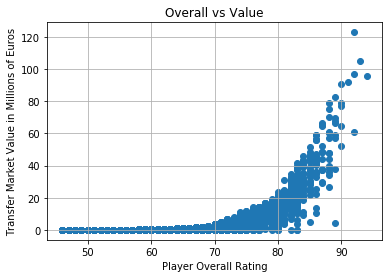

In [6]:
fig,ax=plt.subplots()

Overall=complete['Overall']
Value=complete['Value (M)']
ax.scatter(Overall,Value)
plt.xlabel('Player Overall Rating')
plt.ylabel('Transfer Market Value in Millions of Euros')
plt.title('Overall vs Value')

plt.grid(True)

(array([0.01093635, 0.05704944, 0.12926321, 0.25007047, 0.23056542,
        0.20841085, 0.0844467 , 0.02407126, 0.00456621, 0.0006201 ]),
 array([46. , 50.8, 55.6, 60.4, 65.2, 70. , 74.8, 79.6, 84.4, 89.2, 94. ]),
 <a list of 10 Patch objects>)

Text(0.5, 0, 'Player Overall Ratings')

Text(0, 0.5, ' Cumulative Percent of Players ')

Text(0.5, 1.0, 'Probability Distribution of Overall Rating')

Text(0.5, 0, 'Player Potential Rating')

Text(0, 0.5, 'Player Overall Rating')

Text(0.5, 1.0, 'Potential vs Overall')

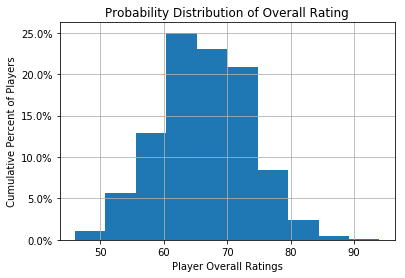

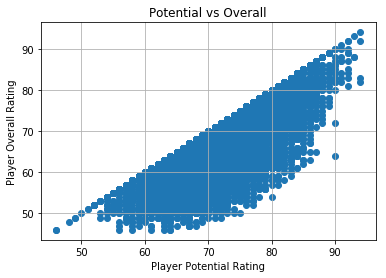

In [577]:
from matplotlib.ticker import PercentFormatter
data = np.array(complete[overall_target])


plt.hist(data, weights=np.ones(len(data)) / len(data))

plt.xlabel("Player Overall Ratings")
plt.ylabel(" Cumulative Percent of Players ")
plt.title("Probability Distribution of Overall Rating")
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.grid(True)



fig,ax=plt.subplots()

Overall=complete['Overall']
Potential=complete['Potential']
ax.scatter(Potential,Overall)
plt.xlabel('Player Potential Rating')
plt.ylabel('Player Overall Rating')
plt.title('Potential vs Overall')

plt.grid(True)

Text(0.5, 0, 'Player Age')

Text(0, 0.5, 'Player Overall Rating')

Text(0.5, 1.0, ' vs Overall')

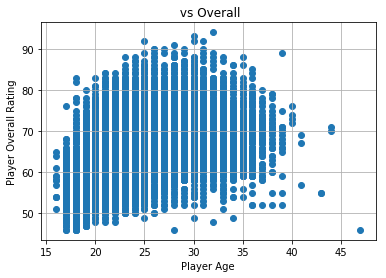

In [578]:
fig,ax=plt.subplots()

Age=complete['age']
Overall=complete['Overall']
ax.scatter(Age,Overall)
plt.xlabel('Player Age')
plt.ylabel('Player Overall Rating')
plt.title(' vs Overall')

plt.grid(True)

Text(0.5, 0, 'Player Reactions')

Text(0, 0.5, 'Player Age')

Text(0.5, 1.0, 'Reactions vs Age')

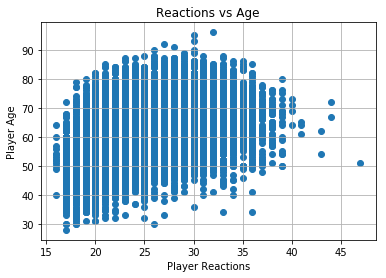

In [262]:
#Reactions with Age
fig,ax=plt.subplots()
x=complete['age']
y=complete['reactions']
ax.scatter(x,y)
plt.xlabel('Player Reactions')
plt.ylabel('Player Age')
plt.title('Reactions vs Age')

plt.grid(True)

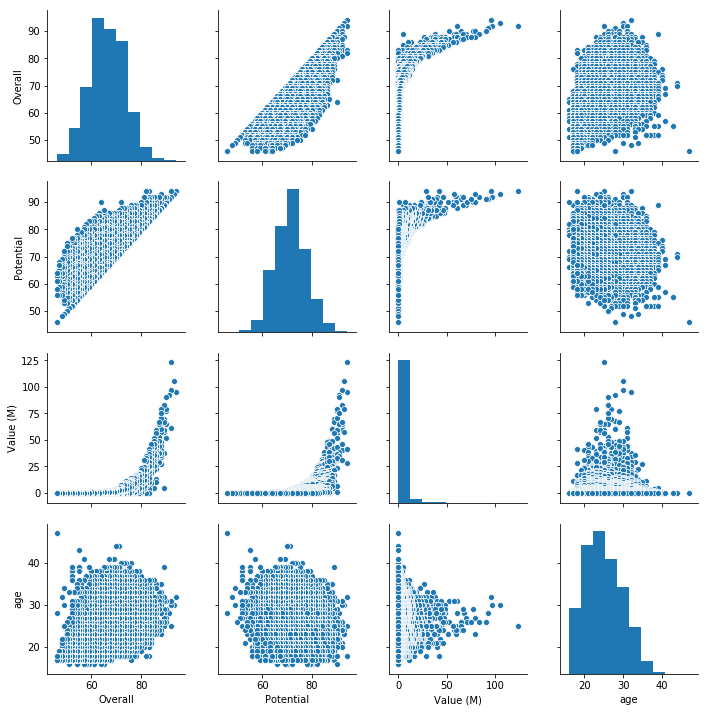

In [579]:
sns.pairplot(complete[['Overall', 'Potential', 'Value (M)', 'age']])

/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


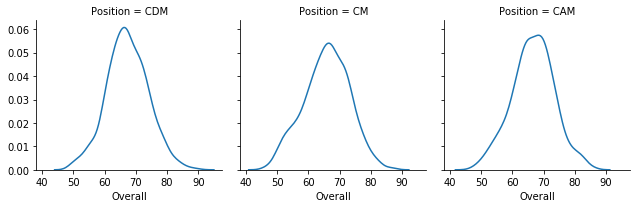

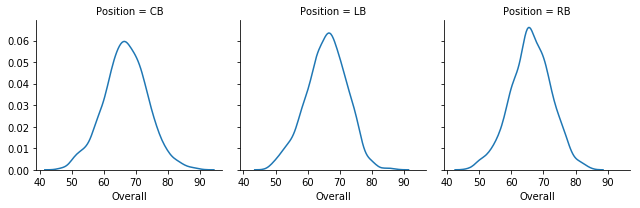

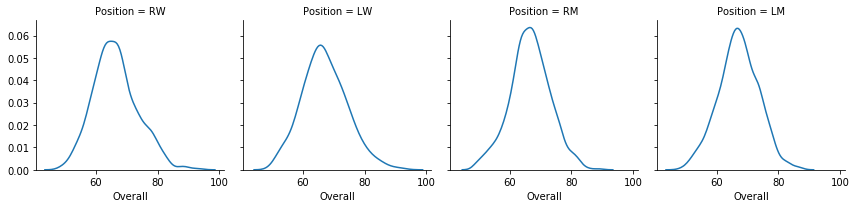

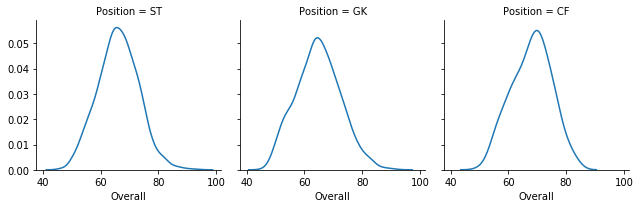

In [580]:
#Distribution of Overall by Position
# center mids
cm = complete[complete['Position'].isin(['CM', 'CDM', 'CAM'])]
cm = sns.FacetGrid(cm, col="Position")
cm.map(sns.kdeplot, "Overall")

#defenders
defend=complete[complete['Position'].isin(['CB', 'RB', 'LB'])]
defend = sns.FacetGrid(defend, col="Position")
defend.map(sns.kdeplot, "Overall")

#wingers
wing=complete[complete['Position'].isin(['LM', 'RM', 'LW', 'RW'])]
wing=sns.FacetGrid(wing, col="Position")
wing.map(sns.kdeplot, "Overall")

#goalies and forwards
gk_and_forwards=complete[complete['Position'].isin(['GK', 'CF', 'ST'])]
gk_and_forwards = sns.FacetGrid(gk_and_forwards, col="Position")
gk_and_forwards.map(sns.kdeplot, "Overall")

Text(0, 0.5, 'Rating')

Text(0.5, 1.0, 'Average Rating by Age')

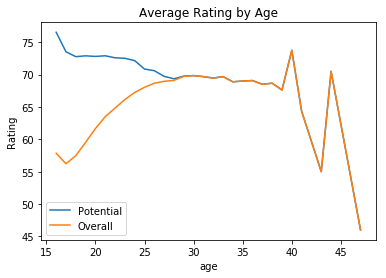

In [581]:
age_pot = complete.groupby(['age'])['Potential'].mean()
age_ovr = complete.groupby(['age'])['Overall'].mean()

df_pot_ovr_age = pd.concat([age_pot, age_ovr], axis=1)

ax = df_pot_ovr_age.plot()
ax.set_ylabel('Rating')
ax.set_title('Average Rating by Age')

Text(0, 0.5, 'Reactions')

Text(0.5, 1.0, 'Average Reactions by Age')

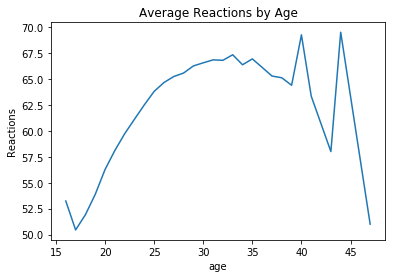

In [264]:
age_rea = complete.groupby(['age'])['reactions'].mean()



ax = age_rea.plot()
ax.set_ylabel('Reactions')
ax.set_title('Average Reactions by Age')

/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


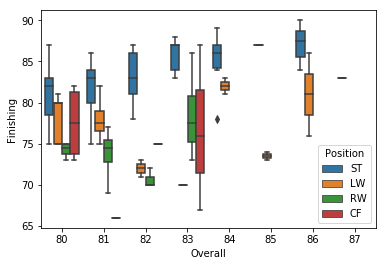

In [582]:
#Finishing by Forwards
#where the range of overall is between 80 and 88
fin = (complete
         .loc[complete['Position'].isin(['ST', 'CF', 'RW', 'LW'])]
         .loc[:, ['Value', 'Overall', 'finishing', 'Position']]
    )
fin = fin[fin["Overall"] >= 80]
fin = fin[fin["Overall"] < 88]
fin['Finishing'] = fin['finishing'].astype(float)

sns.boxplot(x="Overall", y="Finishing", hue='Position', data=fin)

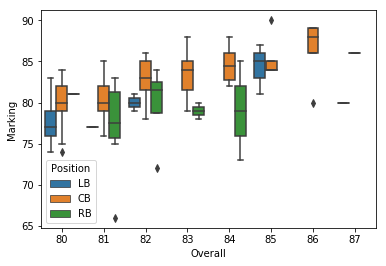

In [583]:
#Marking by Defenders
#where the range of overall is between 80 and 88
fin = (complete
         .loc[complete['Position'].isin(['RB', 'LB', 'CB'])]
         .loc[:, ['Value', 'Overall', 'marking', 'Position']]
    )
fin = fin[fin["Overall"] >= 80]
fin = fin[fin["Overall"] < 88]
fin['Marking'] = fin['marking'].astype(float)

sns.boxplot(x="Overall", y="Marking", hue='Position', data=fin)

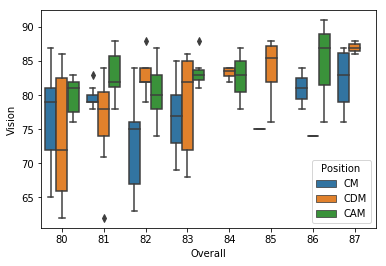

In [584]:
#Vision by Center Mids
#where the range of overall is between 80 and 88
fin = (complete
         .loc[complete['Position'].isin(['CM', 'CDM', 'CAM'])]
         .loc[:, ['Value', 'Overall', 'vision', 'Position']]
    )
fin = fin[fin["Overall"] >= 80]
fin = fin[fin["Overall"] < 88]
fin['Vision'] = fin['vision'].astype(float)

sns.boxplot(x="Overall", y="Vision", hue='Position', data=fin)

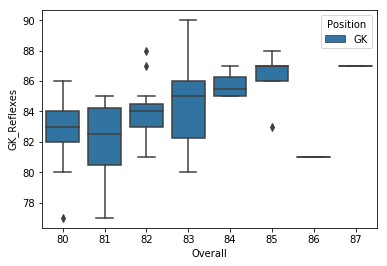

In [585]:
#GK Reflexes 
#where the range of overall is between 80 and 88
fin = (complete
         .loc[complete['Position'].isin(['GK'])]
         .loc[:, ['Value', 'Overall', 'gk_reflexes', 'Position']]
    )
fin = fin[fin["Overall"] >= 80]
fin = fin[fin["Overall"] < 88]
fin['GK_Reflexes'] = fin['gk_reflexes'].astype(float)

sns.boxplot(x="Overall", y="GK_Reflexes", hue='Position', data=fin)

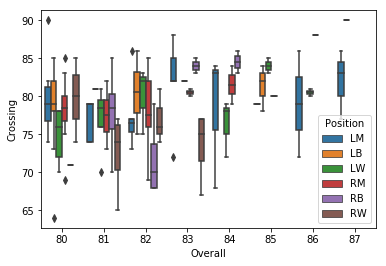

In [586]:
#Crossing by Wide Players
#where the range of overall is between 80 and 88
fin = (complete
         .loc[complete['Position'].isin(['LB', 'RB', 'LW', 'RW', 'LM', 'RM'])]
         .loc[:, ['Value', 'Overall', 'crossing', 'Position']]
    )
fin = fin[fin["Overall"] >= 80]
fin = fin[fin["Overall"] < 88]
fin['Crossing'] = fin['crossing'].astype(float)

sns.boxplot(x="Overall", y="Crossing", hue='Position', data=fin)

<Figure size 432x288 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

Text(0.5, 1.0, 'Age vs Mean Overall/Potential Rating & Value')

Text(0.5, 0, 'Player Age')

Text(0, 0.5, 'Player Overall')

<Figure size 432x288 with 0 Axes>

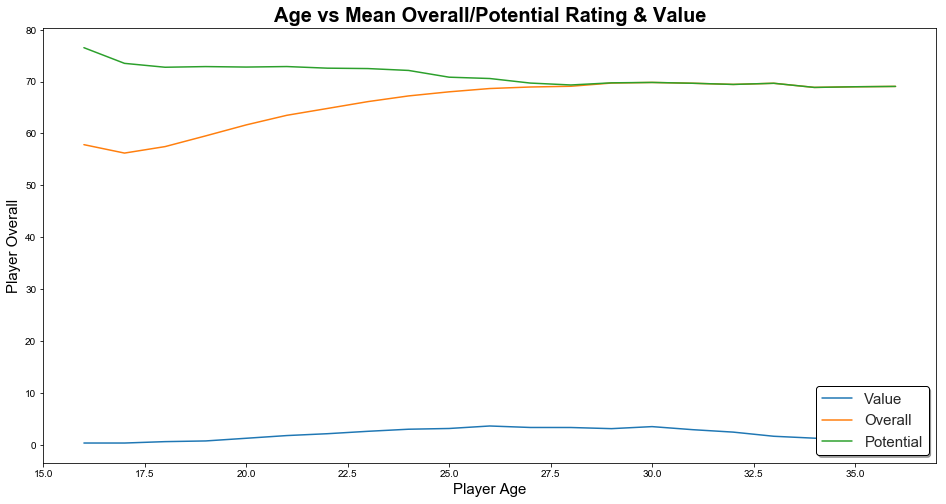

In [587]:
# Selecting players with age smaller then 36
complete36 = complete.loc[complete['age'] <= 36]
# Selecting unique ages from DF
age = complete36.sort_values("age")['age'].unique()
# Selecting average Overall from DF
ovr = complete36.groupby("age")["Overall"].mean().values
# Selecting average potential from DF
potential = complete36.groupby("age")["Potential"].mean().values
# Selecting average value from DF
value=complete36.groupby("age")["Value (M)"].mean().values


plt.figure()
plt.figure(figsize=(16,8))
plt.title('Age vs Mean Overall/Potential Rating & Value', fontsize=20, fontweight='bold')
plt.xlabel('Player Age', fontsize=15)
plt.ylabel('Player Overall', fontsize=15)
sns.set_style("whitegrid")
plt.plot(age, value, label="Value")
plt.plot(age, ovr, label="Overall")
plt.plot(age, potential, label="Potential")
plt.legend(loc=4, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

<Figure size 576x576 with 0 Axes>

Text(0.5, 1.05, 'Pearson correlation of Potential, Value , Age and Overall Rating')

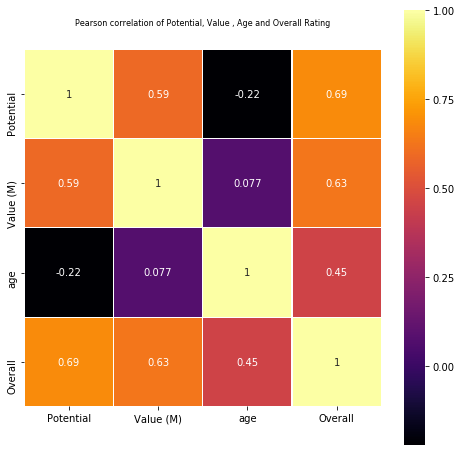

In [17]:
corr_variables = complete[["Potential", "Value (M)","age", "Overall"]]
colormap = plt.cm.inferno
plt.figure(figsize=(8,8))
plt.title('Pearson correlation of Potential, Value , Age and Overall Rating', 
          y=1.05, size=8)
sns.heatmap(corr_variables.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

<Figure size 1152x864 with 0 Axes>

Text(0.5, 1.05, 'Pearson correlation of Value, Potential , Age and Player Card Attributes')

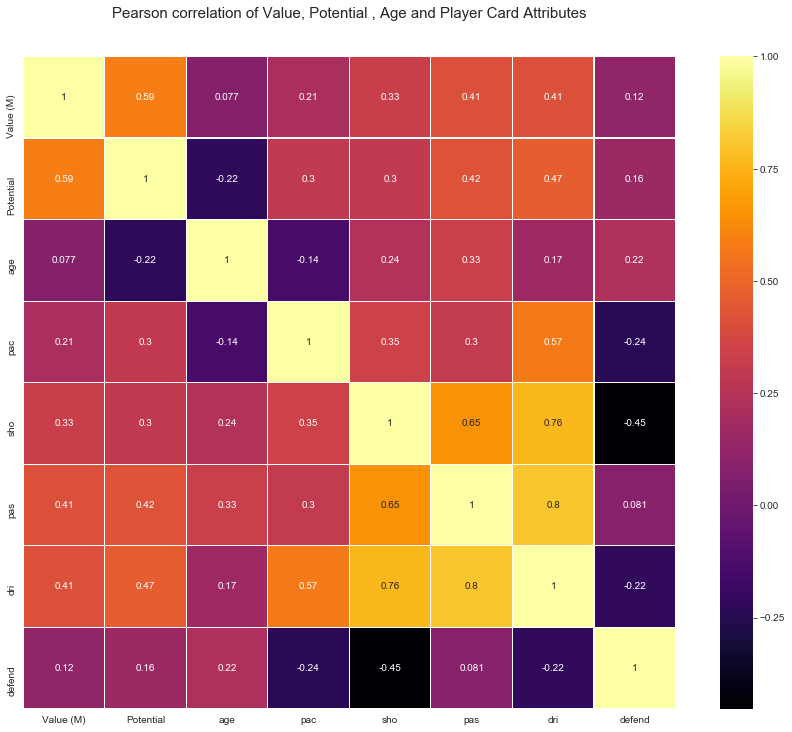

In [589]:
corr_variables = complete[["Value (M)", "Potential", "age","pac", "sho", "pas", "dri", "defend"]]
colormap = plt.cm.inferno
plt.figure(figsize=(16,12))
plt.title('Pearson correlation of Value, Potential , Age and Player Card Attributes', 
          y=1.05, size=15)
sns.heatmap(corr_variables.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

<Figure size 1152x1152 with 0 Axes>

Text(0.5, 1.05, 'Pearson correlation of Potential , with Athleticism and Mentality')

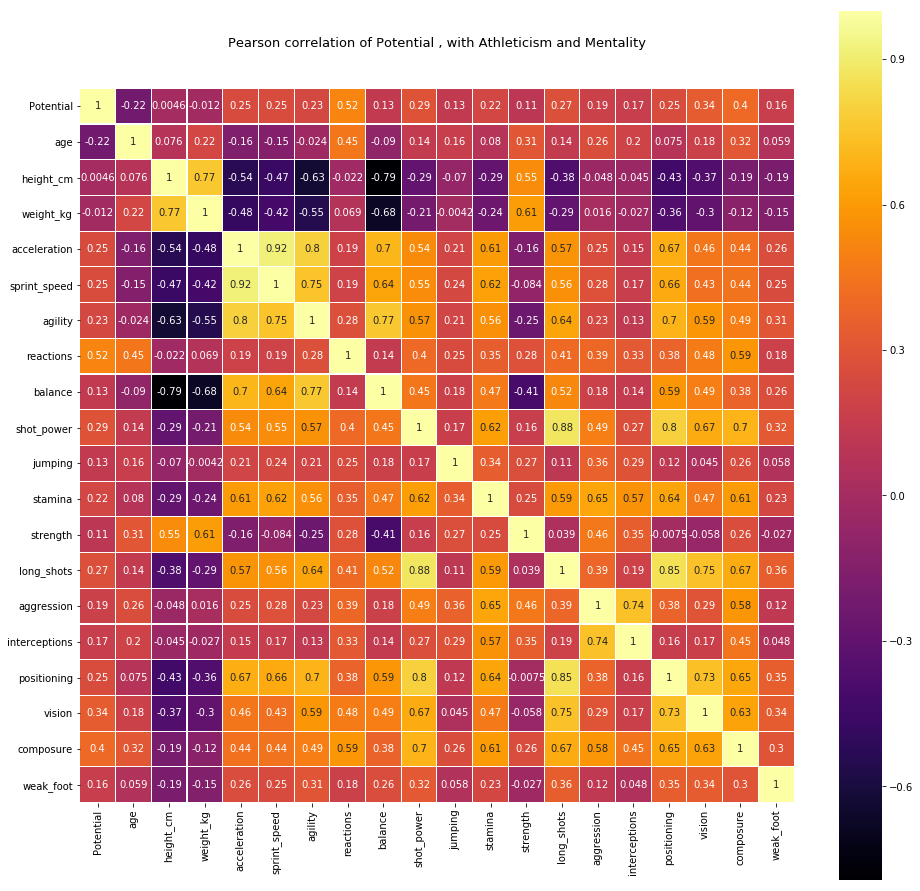

In [260]:
features=['Potential','age', 'height_cm', 'weight_kg', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision',  'composure', 'weak_foot']
corr_variables=complete[features]
colormap = plt.cm.inferno
plt.figure(figsize=(16,16))
plt.title('Pearson correlation of Potential , with Athleticism and Mentality', 
          y=1.05, size=13)
sns.heatmap(corr_variables.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

# Kernel Density Visualizations

Text(0.5,0,'Overall Rating')

Text(0.5,1,'Kernel Density of Overall ')

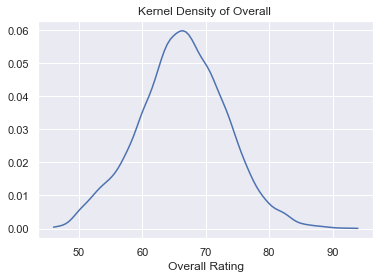

Text(0.5,0,'Value')

Text(0.5,1,'Kernel Density of Value ')

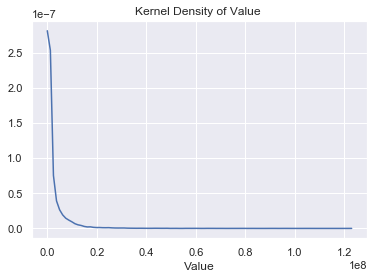

In [50]:
#Overall KDE
from numpy import linspace
#Kernel Density Estimator
x= complete.Overall
kde = gaussian_kde(x)
dist_space = linspace(min(x), max(x), 100)
plt.xlabel('Overall Rating')
plt.plot(dist_space, kde(dist_space))
plt.title("Kernel Density of Overall ")
plt.show()

#Value KDE
x= complete.eur_value
kde = gaussian_kde(x)
dist_space = linspace(min(x), max(x), 100)
plt.xlabel('Value')
plt.plot(dist_space, kde(dist_space))
plt.title("Kernel Density of Value ")
plt.show()

# Cluster Map of Features

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

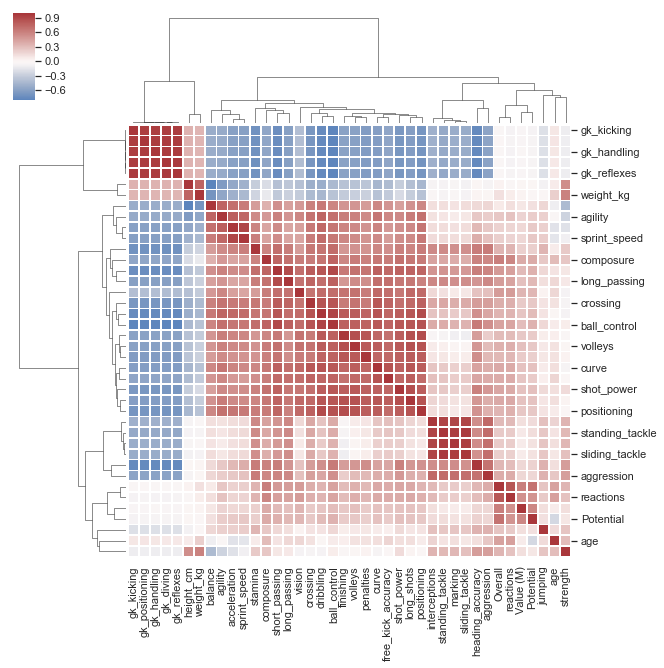

In [52]:
#Heatmap: show the correlation between similar features.
# Select a subset of the df
used_variables = ['Overall', 'Potential',
       'Value (M)', 'age', 'height_cm', 'weight_kg', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'composure', 'marking', 'standing_tackle',
       'sliding_tackle', 'gk_diving', 'gk_handling', 'gk_kicking',
       'gk_positioning', 'gk_reflexes']
used_columns = (complete.columns.get_level_values(None).isin(used_variables))
df = complete.loc[:, used_columns]

# Draw the full plot
plt.figure(figsize=(16,16))
sns.clustermap(df.corr(), center=0, cmap="vlag", linewidths=.75)

# Model Basis

In [10]:
#An example
x = complete[overall_target]
x=sm.add_constant(x)
y=complete[ln_value]

<p style="font-family: Arial; font-size:2.70em;color:DarkRed; font-style:bold">
<br>
FIFA Data Analysis: Dimensionality Reduction
</p><br>

# Unsupervised Dimensionality Reduction

Eigenvectors 
[[ 2.02843901e-02  9.07376824e-02 -3.40142262e-01 ...  2.42955802e-02
  -1.16424396e-02 -4.04252606e-03]
 [-1.08675532e-01  1.87911306e-01 -2.51570216e-01 ... -3.54745880e-03
   2.23471915e-02 -1.00085395e-02]
 [-9.25594563e-02  1.80874719e-01 -3.08824513e-01 ... -4.21718616e-03
  -1.04913863e-02  6.34894219e-04]
 ...
 [-1.93941797e-01 -7.20250238e-02 -1.72165656e-01 ... -1.29811679e-02
  -8.06386989e-02 -8.79592893e-01]
 [-1.94269416e-01 -6.98741900e-02 -1.75710490e-01 ... -5.79467503e-03
   2.15473095e-02  2.89958666e-01]
 [-1.94987564e-01 -7.14351566e-02 -1.72916920e-01 ... -1.48850521e-02
   1.23052410e-02  1.80696323e-01]]

Eigenvalues 
[19.17893005  5.34862594  3.09351964  2.07877653  1.34781746  0.82207439
  0.56756527  0.45652984  0.36115814  0.34090087  0.28259051  0.25185916
  0.24481632  0.23815146  0.22931382  0.21347939  0.20367806  0.19309225
  0.18120016  0.15351432  0.13732522  0.13266879  0.12788955  0.10892294
  0.09439369  0.08856606  0.07864995  0.0752

/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


(17739, 37)

/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.


PCA(copy=True, iterated_power='auto', n_components=37, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

array([0.51832024, 0.14454931, 0.08360393, 0.05617998, 0.03642545,
       0.02221697, 0.01533874, 0.01233795, 0.00976048, 0.00921302,
       0.00763715, 0.00680662, 0.00661628, 0.00643616, 0.00619732,
       0.00576939, 0.0055045 , 0.00521842, 0.00489703, 0.0041488 ,
       0.00371128, 0.00358544, 0.00345628, 0.0029437 , 0.00255104,
       0.00239354, 0.00212555, 0.00203272, 0.00192523, 0.00173078,
       0.00116919, 0.00105116, 0.0010418 , 0.00086691, 0.00084055,
       0.00073266, 0.00066445])

(37,)

0
0  0.518320
1  0.144549
2  0.083604
3  0.056180
4  0.036425



The cumulative variance explained is: [ 51.8  66.3  74.7  80.3  83.9  86.1  87.6  88.8  89.8  90.7  91.5  92.2
  92.9  93.5  94.1  94.7  95.3  95.8  96.3  96.7  97.1  97.5  97.8  98.1
  98.4  98.6  98.8  99.   99.2  99.4  99.5  99.6  99.7  99.8  99.9 100.
 100.1]


Text(0.5, 0, 'Variables')

Text(0, 0.5, 'Cumulative Variance Explained')

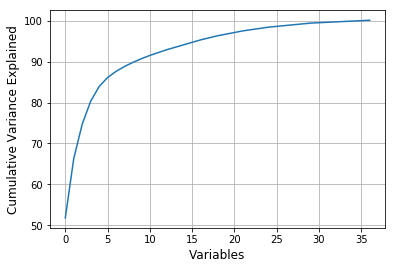

In [10]:
#Our Model
X = complete[attribute_profile]
y_overall=complete[overall_target]

#Exploring PCA
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_std=sc.fit_transform(X)
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)
eigen_val=pd.DataFrame(eig_vals)
eigen_vec=pd.DataFrame(eig_vecs)



X.shape
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
dta = scale(X)
pca = PCA(n_components=37)
pca.fit(dta)
#The amount of variance that each PC explains
var= pca.explained_variance_ratio_
var
var.shape
vardf=pd.DataFrame(var)
vardf.head()
#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
print("\n\nThe cumulative variance explained is:" ,var1)

plt.plot(var1)
plt.xlabel('Variables', fontsize=12)
plt.ylabel('Cumulative Variance Explained', fontsize=12)
plt.grid(True)

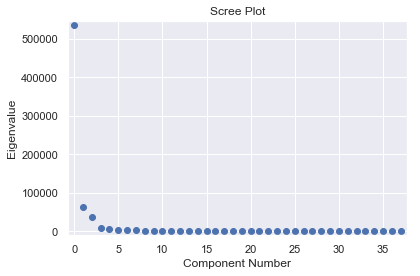

In [40]:
#Scree Plot
dta=pd.concat([y_overall, X], axis=1)
#scree plot
from statsmodels.multivariate.pca import PCA
%matplotlib inline
import seaborn as sns; sns.set()
#Plotting a scree plot
pca_model = PCA(dta.T, standardize=True, demean=True)
fig = pca_model.plot_scree(log_scale=False)

# Fitting PCA to Multivariate Regression Model

In [11]:
#Our Model
X = complete[attribute_profile]
y_overall=complete[overall_target]
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_overall, test_size = 0.3, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 10)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print("The explained variance by including 10 principal components is: \n" ,explained_variance)

The explained variance by including 10 principal components is: 
 [0.51969526 0.14394681 0.08392943 0.05607359 0.03597639 0.02209356
 0.01532181 0.01234427 0.00975645 0.00919713]


/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  if sys.path[0] == '':


# Commentary on PCA

The results of PCA indicate that roughly between 80%-90% of the variance in the model can be explained by 5-10 principal components. Thus when, we reduce our models we should seek to use between 5-10 variables.

<p style="font-family: Arial; font-size:3.50em;color:DarkRed; font-style:bold">
<br>
Econometrics and <br/> 
    <br>
    Regression Based Analysis
    
</p><br>

<p style="font-family: Arial; font-size:2.50em;color:Black; font-style:bold">
<br>
FIFA Data Analysis: Regression on Overall Rating <br>
    <br/>with Player Attributes
</p><br>

# OLS with Robust Standard Errors for Overall

In [12]:
#define a basic model for overall and the full attribute profile
X = complete[attribute_profile]
X=sm.add_constant(X)
y_overall=complete[overall_target]

#Assuming a heteroskedastic model compute the regression results
OLS_model = sm.OLS(y_overall,X)
OLS_results=OLS_model.fit(cov_type='HC0')
print(OLS_results.summary())

                            OLS Regression Results                            
Dep. Variable:                Overall   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     2560.
Date:                Mon, 26 Nov 2018   Prob (F-statistic):               0.00
Time:                        12:02:20   Log-Likelihood:                -42966.
No. Observations:               17739   AIC:                         8.601e+04
Df Residuals:                   17701   BIC:                         8.630e+04
Df Model:                          37                                         
Covariance Type:                  HC0                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  7.6296      1

# Robust Linear Regression with Huber Regression

In [14]:
rlm_model = sm.RLM(y_overall, X, M=sm.robust.norms.HuberT())
rlm_results = rlm_model.fit()
print(rlm_results.summary2())

                   Results: Robust linear model
Model:                  RLM                 Df Residuals:    17701 
Dependent Variable:     Overall             Norm:            HuberT
Date:                   2018-11-26 12:02    Scale Est.:      mad   
No. Observations:       17739               Cov. Type:       H1    
Df Model:               37                  Scale:           2.6092
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
const               7.5849   1.1347   6.6846 0.0000  5.3610  9.8088
age                 0.0453   0.0059   7.6195 0.0000  0.0336  0.0569
height_cm          -0.0026   0.0062  -0.4229 0.6724 -0.0149  0.0096
weight_kg           0.0263   0.0053   4.9975 0.0000  0.0160  0.0366
crossing            0.0165   0.0028   5.9115 0.0000  0.0110  0.0219
finishing           0.0269   0.0034   7.9567 0.0000  0.0202  0.0335


# Ridge Regression for Overall

In [18]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
X = complete[attribute_profile]
y=complete[overall_target]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [19]:
#fitting several ridge regressions with various sizes of alpha
lr = LinearRegression()
lr.fit(X_train, y_train)
rr_small= Ridge(alpha=0.001)
rr_small.fit(X_train, y_train)
ridge = Ridge(alpha=1)
ridge.fit(X_train, y_train)
rr10 = Ridge(alpha=10) #  comparison with alpha value
rr10.fit(X_train, y_train)
train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)
Ridge_train_score = ridge.score(X_train,y_train)
Ridge_test_score = ridge.score(X_test, y_test)
Ridge_train_score10 = rr10.score(X_train,y_train)
Ridge_test_score10 = rr10.score(X_test, y_test)
small_ridge_train_score10 = rr_small.score(X_train,y_train)
small_ridge_test_score10 = rr_small.score(X_test, y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [20]:
#evaluating the three ridge regressions
ysmall_prediction=rr_small.predict(X_test)
yregular_prediction = ridge.predict(X_test)
ylarge_prediction=ridge.predict(X_test)
from sklearn.metrics import r2_score
r2_small=r2_score(y_test, ysmall_prediction) 
r2_regular=r2_score(y_test, yregular_prediction)
r2_large=r2_score(y_test, ylarge_prediction)
print("The R-Squared of the small alpha model is :" ,r2_small)
print("\nThe R-Squared of the default alpha model is :" ,r2_regular)
print("\nThe R-Squared of the large alpha model is :" ,r2_large)

The R-Squared of the small alpha model is : 0.8458129406853198

The R-Squared of the default alpha model is : 0.8458129475728042

The R-Squared of the large alpha model is : 0.8458129475728042


In [21]:
ridge_coef=ridge.coef_
cols=np.array(X.columns)
cols=cols.reshape(37,1)
ridge_coef=ridge_coef.reshape(37,1)
coefs=np.concatenate((cols, ridge_coef), axis=1)
coefs=pd.DataFrame(coefs)
intercept=ridge.intercept_
print(coefs)
print(intercept)

                     0            1
0                  age    0.0532238
1            height_cm  -0.00259222
2            weight_kg    0.0293429
3             crossing    0.0152084
4            finishing      0.03025
5     heading_accuracy    0.0988012
6        short_passing    0.0796618
7              volleys -0.000641859
8            dribbling    0.0179201
9                curve    0.0117628
10  free_kick_accuracy   0.00783538
11        long_passing    -0.015236
12        ball_control     0.147954
13        acceleration    0.0382757
14        sprint_speed    0.0337835
15             agility   -0.0052426
16           reactions     0.290524
17             balance   -0.0116321
18          shot_power     0.018424
19             jumping   0.00579402
20             stamina   0.00959372
21            strength    0.0266312
22          long_shots   -0.0201862
23          aggression  0.000915797
24       interceptions    0.0101841
25         positioning   -0.0592326
26              vision   -0.

In [22]:
#From this lets conclude we use the default alpha=1
y_prediction = ridge.predict(X_test)
predictedy=np.concatenate([y_prediction,X_test],axis=1)
predicted=pd.DataFrame(predictedy)
predicted.columns=['Overall','age', 'height_cm', 'weight_kg', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'composure', 'marking', 'standing_tackle',
       'sliding_tackle', 'gk_diving', 'gk_handling', 'gk_kicking',
       'gk_positioning', 'gk_reflexes']
predicted.head()
predicted.describe().transpose()
y_test.describe()

Overall   age  height_cm  weight_kg  crossing  finishing  \
0  69.951987  24.0      178.0       72.0      71.0       70.0   
1  74.982379  44.0      172.0       75.0      19.0       14.0   
2  59.377173  20.0      170.0       69.0      50.0       55.0   
3  65.665635  33.0      176.0       66.0      58.0       41.0   
4  68.769378  32.0      190.0       86.0      27.0       27.0   

   heading_accuracy  short_passing  volleys  dribbling     ...       \
0              41.0           71.0     68.0       79.0     ...        
1              24.0           26.0     13.0       12.0     ...        
2              37.0           59.0     59.0       68.0     ...        
3              41.0           65.0     49.0       62.0     ...        
4              74.0           57.0     16.0       54.0     ...        

   penalties  composure  marking  standing_tackle  sliding_tackle  gk_diving  \
0       68.0       74.0     32.0             33.0            31.0        8.0   
1       23.0       50.0     11.0             12.0            11.0       70.0   
2       49.0       59.0     25.0             34.0            29.0        6.0   
3       59.0       63.0     54.0             64.0            56.0       14.0   
4       19.0       64.0     66.0             74.0            70.0        7.0   

   gk_handling  gk_kicking  gk_positioning  gk_reflexes  
0         13.0         6.0            15.0         14.0  
1         64.0        65.0            73.0         74.0  
2          7.0         9.0             7.0         12.0  
3         13.0        10.0            11.0          6.0  
4          6.0        16.0            12.0          8.0  

[5 rows x 38 columns]

count        mean        std         min         25%  \
Overall             5322.0   66.230602   6.366873   46.998752   61.901089   
age                 5322.0   25.163284   4.618486   16.000000   21.000000   
height_cm           5322.0  181.111800   6.727779  155.000000  176.000000   
weight_kg           5322.0   75.217399   6.962021   50.000000   70.000000   
crossing            5322.0   50.202931  18.299061    7.000000   39.000000   
finishing           5322.0   45.848177  19.376425    3.000000   30.000000   
heading_accuracy    5322.0   52.262683  17.233250    4.000000   45.000000   
short_passing       5322.0   58.591507  14.783471   11.000000   53.000000   
volleys             5322.0   43.664788  17.599365    4.000000   31.000000   
dribbling           5322.0   55.498309  18.776395    4.000000   49.000000   
curve               5322.0   47.791808  18.417669    7.000000   35.000000   
free_kick_accuracy  5322.0   43.444946  17.504704    6.000000   31.000000   
long_passing        5322.0   52.736189  15.418972   11.000000   43.000000   
ball_control        5322.0   58.456783  16.579268    8.000000   54.000000   
acceleration        5322.0   64.951710  14.766914   12.000000   57.000000   
sprint_speed        5322.0   65.148440  14.490707   11.000000   57.000000   
agility             5322.0   63.697858  14.776581   16.000000   56.000000   
reactions           5322.0   61.891958   9.027645   30.000000   56.000000   
balance             5322.0   64.190906  14.031283   11.000000   56.000000   
shot_power          5322.0   56.012026  17.428217    6.000000   46.000000   
jumping             5322.0   64.984216  11.978248   15.000000   58.000000   
stamina             5322.0   63.384442  15.785214   13.000000   57.000000   
strength            5322.0   65.094701  12.680779   21.000000   58.000000   
long_shots          5322.0   47.711762  19.191621    3.000000   33.000000   
aggression          5322.0   55.777903  17.353405   11.000000   43.000000   
interceptions       5322.0   46.480646  20.662857    4.000000   25.000000   
positioning         5322.0   50.137166  19.241948    2.000000   39.000000   
vision              5322.0   53.272642  14.310025   11.000000   44.000000   
penalties           5322.0   49.237880  15.660805    8.000000   40.000000   
composure           5322.0   58.075911  12.697330   11.000000   51.000000   
marking             5322.0   43.923713  21.505081    4.000000   22.000000   
standing_tackle     5322.0   47.354566  21.827061    4.000000   27.000000   
sliding_tackle      5322.0   45.481210  21.455901    5.000000   24.000000   
gk_diving           5322.0   16.539459  17.597551    1.000000    8.000000   
gk_handling         5322.0   16.374671  16.873346    1.000000    8.000000   
gk_kicking          5322.0   16.185457  16.456819    1.000000    8.000000   
gk_positioning      5322.0   16.310973  16.975337    1.000000    8.000000   
gk_reflexes         5322.0   16.618189  17.885592    1.000000    8.000000   

                           50%         75%         max  
Overall              66.434191   70.550292   86.807663  
age                  25.000000   28.000000   44.000000  
height_cm           181.000000  186.000000  203.000000  
weight_kg            75.000000   80.000000  107.000000  
crossing             55.000000   64.000000   90.000000  
finishing            50.000000   62.000000   91.000000  
heading_accuracy     55.000000   64.000000   93.000000  
short_passing        62.000000   68.000000   91.000000  
volleys              45.000000   57.000000   88.000000  
dribbling            61.000000   68.000000   93.000000  
curve                49.000000   62.000000   92.000000  
free_kick_accuracy   42.000000   57.000000   90.000000  
long_passing         56.000000   64.000000   93.000000  
ball_control         63.000000   69.000000   92.000000  
acceleration         68.000000   75.000000   96.000000  
sprint_speed         68.000000   75.000000   95.000000  
agility              66.000000   74.000000   95.

Overall
count  5322.000000
mean     66.259677
std       6.900821
min      46.000000
25%      62.000000
50%      66.000000
75%      71.000000
max      91.000000

In [23]:
from math import sqrt
from sklearn.metrics import mean_squared_error
RMSE_test=sqrt(mean_squared_error(y_true=y_test,y_pred=y_prediction))
print("Root Mean Square Error of test set is:" ,RMSE_test)

y_train_prediction = ridge.predict(X_train)
RMSE_train=sqrt(mean_squared_error(y_true=y_train,y_pred=y_train_prediction))
print("The RMSE of the training data is:" ,RMSE_train)

Root Mean Square Error of test set is: 2.7094674196860966
The RMSE of the training data is: 2.7360819852825267


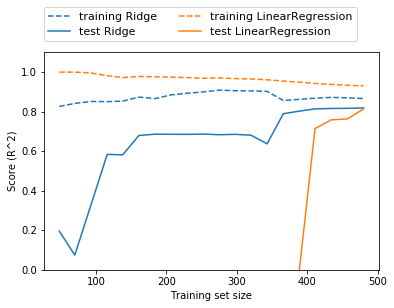

In [22]:
#It seems like there is no difference 
#To showcase the advantages of ridge regression
#Why use ridge?
import mglearn
mglearn.plots.plot_ridge_n_samples()

In [24]:
#K-folds cross validation
from sklearn import metrics
from sklearn.model_selection import cross_val_score
scores=cross_val_score(ridge,X,y,cv=5)
scores

array([-0.42136809, -3.19847964, -5.93214499, -4.62180961, -0.53326892])

# Lasso on Overall For all Positions

In [25]:
from sklearn.linear_model import Lasso

#default alpha=1
lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso.coef_ != 0))

# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("\n\nTraining set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso001.coef_ != 0))

#decrease alpha further
lasso00001 = Lasso(alpha=0.0001, max_iter=1000000).fit(X_train, y_train)
print("\n\nTraining set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso00001.coef_ != 0))

Training set score: 0.84
Test set score: 0.84
Number of features used: 26


Training set score: 0.85
Test set score: 0.85
Number of features used: 37


Training set score: 0.85
Test set score: 0.85
Number of features used: 37


In [26]:
y_prediction = lasso.predict(X_test)
RMSE_test=sqrt(mean_squared_error(y_true=y_test,y_pred=y_prediction))
print("Root Mean Square Error of test set is:" ,RMSE_test)
r2=r2_score(y_test, y_prediction) 
print("The R-Squared of the Model is :" ,r2)

#This r-square is lower because when conducting lasso regression for alpha =1 
#we actually reduce the number of features we have from 37 to 25

Root Mean Square Error of test set is: 2.738414237577749
The R-Squared of the Model is : 0.8425008087308197


In [27]:
#What would happen if we increased alpha above 1?
#Lets try for alpha =5 and alpha=10

lasso5 = Lasso(alpha=5, max_iter=1000000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso5.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso5.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso5.coef_ != 0))

lasso10 = Lasso(alpha=10, max_iter=1000000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso10.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso10.coef_ != 0))

Training set score: 0.80
Test set score: 0.80
Number of features used: 15
Training set score: 0.72
Test set score: 0.72
Number of features used: 5


Notice how we go from 37 features used with alpha=1 to 15 and then 5 when alpha is 5 and 10 respectively. Moreover, our test set score did drop as the L1 regularization ommited some variables (by reducing them to zero). From the results above it seems like an appropriate model for us would be somewhere between alpha =5 and alpha=10

In [28]:
#Let us try alpha=8
lasso8 = Lasso(alpha=8, max_iter=1000000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso8.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso8.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso8.coef_ != 0))
#This model is a good trade off between a relatively good prediction score while being able to omit some variables
#so lets use alpha=8

Training set score: 0.75
Test set score: 0.75
Number of features used: 10


In [29]:
y_prediction = lasso8.predict(X_test)
lasso_coef=lasso8.coef_
cols=np.array(X.columns)
cols=cols.reshape(37,1)
lasso_coef=lasso_coef.reshape(37,1)
coefs=np.concatenate((cols, lasso_coef), axis=1)
coefs=pd.DataFrame(coefs)
intercept=lasso8.intercept_
print(intercept)
print(coefs)

[29.00742928]
                     0           1
0                  age           0
1            height_cm           0
2            weight_kg           0
3             crossing           0
4            finishing           0
5     heading_accuracy           0
6        short_passing   0.0164898
7              volleys           0
8            dribbling           0
9                curve           0
10  free_kick_accuracy           0
11        long_passing   0.0142212
12        ball_control   0.0183834
13        acceleration           0
14        sprint_speed           0
15             agility           0
16           reactions    0.410776
17             balance          -0
18          shot_power  0.00196838
19             jumping           0
20             stamina           0
21            strength    0.028935
22          long_shots           0
23          aggression           0
24       interceptions           0
25         positioning           0
26              vision           0
27    

# Comparing Lasso and Ridge

(-0.1, 0.45)

Text(0.5, 0, 'Coefficient index')

Text(0, 0.5, 'Coefficient magnitude')

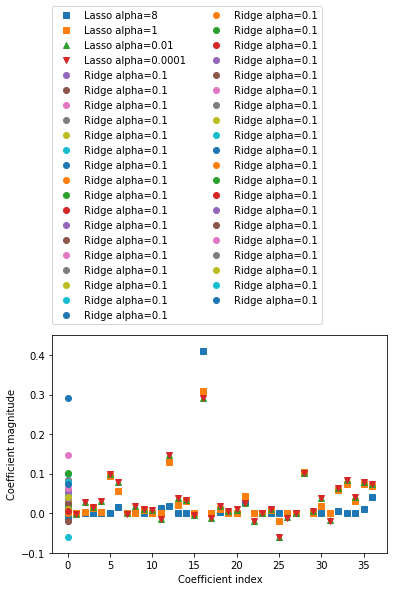

In [30]:
plt.plot(lasso8.coef_, 's', label="Lasso alpha=8")
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")


plt.plot(ridge.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-0.1, 0.45)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

 <p style="font-family: Arial; font-size:2.750em;color:DarkRed; font-style:bold">
<br>
Regression, Ensemble Gradient Boosting 
    <br>
    <br> and Enhanced Feature Engineering
    <br>
    <br> Modeling Value by Position 
</p><br>

# Positional Analysis Approach

This approach to finding a value model for this position is based on the assumption that the main determinant to market value is a players overall rating.
<br/>
The approach to find a model that describes value for this position with a reduced number of features is the following:
<br/>
To gain basic insights we conduct simple OLS with robust SE on Overall for this position group with all attributes in the "attribute_profile" list. Then to reduce the amount of variables that matter we fit a lasso regression model on overall. When doing lasso regression, we use cross-validation to find the correct alpha to use. After this we choose all the features with a non-zero coefficient, and regardless if their coefficient is non-zero, we include non-soccer attributes such as Age, weight, and height.
<br/> 
Since multicollinearity is likely, we conduct ridge regression on the non-zero coefficients from the lasso model. We use cross validation to also choose the correct alpha for our ridge regression. 
<br/> We then evaluate the reduced model performance, and compare it to the model performance of all the attributes on Value.

<br/>
Lastly we conduct gradient boosting regression to rank feature importance for a position with respect to value.

<p style="font-family: Arial; font-size:2.750em;color:DarkRed; font-style:bold">
<br>
Position Analysis: Goal Keepers
</p><br>

In [14]:
data=GK
lnVal=pd.DataFrame((data["Value (M)"]+1).apply(np.log))
lnVal.columns = ['ln_value']
gk_dta = pd.concat([lnVal, data], axis=1)
gk_dta.head()

ln_value      ID         Name  Overall  Potential  Value (M)  \
0  4.127134  167495     M. Neuer       92         92       61.0   
1  4.182050  193080       De Gea       90         92       64.5   
2  1.704748    1179    G. Buffon       89         89        4.5   
3  4.094345  192119  T. Courtois       89         92       59.0   
4  4.060443  200389     J. Oblak       88         93       57.0   

                club  age  height_cm  weight_kg         ...          \
0   FC Bayern Munich   31        193         92         ...           
1  Manchester United   26        193         76         ...           
2           Juventus   39        191         94         ...           
3            Chelsea   25        199         94         ...           
4    Atlético Madrid   24        189         82         ...           

   gk_reflexes  foot_Left  foot_Right  international_reputation  \
0           89          0           1                         5   
1           90          0           1                         4   
2           84          0           1                         4   
3           88          1           0                         4   
4           84          0           1                         3   

   att_rate_High  att_rate_Low  att_rate_Medium  defend_rate_High  \
0              0             0                1                 0   
1              0             0                1                 0   
2              0             0                1                 0   
3              0             0                1                 0   
4              0             0                1                 0   

   defend_rate_Low  defend_rate_Medium  
0                0                   1  
1                0                   1  
2                0                   1  
3                0                   1  
4                0                   1  

[5 rows x 54 columns]

In [359]:
#Model definition
data=gk_dta
x=data[attribute_profile]
X=sm.add_constant(x)
y1=data[overall_target]
y2=data[value_target]
y3=data[ln_value]

#OLS for Overall
OLS_model = sm.OLS(y1,X)
OLS_results=OLS_model.fit(cov_type='HC0')
print(OLS_results.summary())
OLS_model2 = sm.OLS(y2,X)
OLS_results2=OLS_model2.fit(cov_type='HC0')
print("\n\nThe adjusted R-squared for the original gk value model is:" ,OLS_results2.rsquared_adj)
print("\nThe model AIC is: " ,OLS_results2.aic)

                            OLS Regression Results                            
Dep. Variable:                Overall   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 1.354e+04
Date:                Mon, 26 Nov 2018   Prob (F-statistic):               0.00
Time:                        16:47:28   Log-Likelihood:                -1440.2
No. Observations:                1997   AIC:                             2956.
Df Residuals:                    1959   BIC:                             3169.
Df Model:                          37                                         
Covariance Type:                  HC0                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0620      0

In [360]:
#Lasso Regression
X_train,X_test,y_train,y_test=train_test_split(x,y1,test_size=0.3,random_state=0)
lr = LinearRegression()
lr.fit(X_train, y_train)

#Lasso Fit (Overall)
lasso = Lasso(alpha=1.0, max_iter=1000000).fit(X_train, y_train)

from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
X_std = scaler.fit_transform(x)
regr_cv = LassoCV(alphas=np.arange(1,9999.999))
# Fit the linear regression
model_cv = regr_cv.fit(X_std, y1)
print("The alpha we should use for lasso regression is:" ,model_cv.alpha_)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warni

The alpha we should use for lasso regression is: 1.0


In [361]:
#Lasso Coefficients 
y_prediction = lasso.predict(X_test)
lasso_coef=lasso.coef_
cols=np.array(x.columns)
cols=cols.reshape(37,1)
lasso_coef=lasso_coef.reshape(37,1)
coefs=np.concatenate((cols, lasso_coef), axis=1)
coefs=pd.DataFrame(coefs)
intercept=lasso.intercept_
print(intercept)
print(coefs)

[2.07617322]
                     0           1
0                  age           0
1            height_cm           0
2            weight_kg           0
3             crossing          -0
4            finishing           0
5     heading_accuracy          -0
6        short_passing           0
7              volleys           0
8            dribbling           0
9                curve           0
10  free_kick_accuracy           0
11        long_passing           0
12        ball_control           0
13        acceleration           0
14        sprint_speed           0
15             agility           0
16           reactions    0.111601
17             balance          -0
18          shot_power           0
19             jumping           0
20             stamina           0
21            strength           0
22          long_shots           0
23          aggression           0
24       interceptions           0
25         positioning           0
26              vision  0.00040904
27     

# Pearson Correlation of Used GK Features 

<Figure size 720x720 with 0 Axes>

Text(0.5, 1.05, 'Pearson correlation of used Features with Targets')

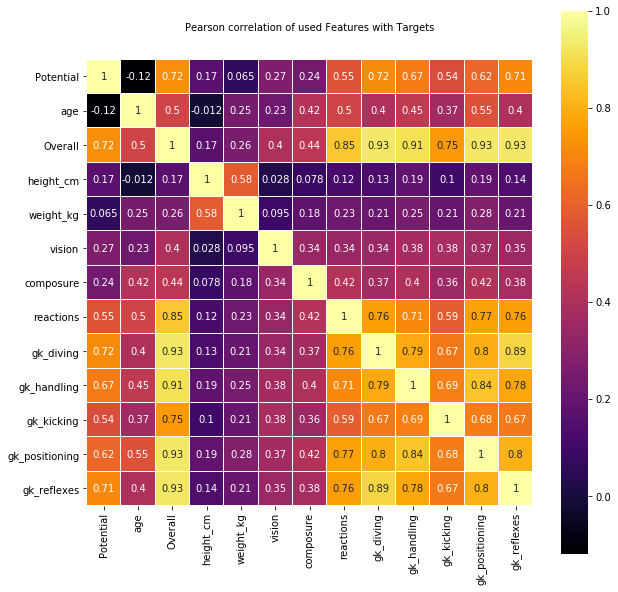

In [15]:
#Heatmap: show the correlation between similar features.
# Select a subset of the df
used_variables = ['Potential','age','Overall','height_cm', 'weight_kg', 'vision', 'composure', 'reactions' ,'gk_diving', 
               'gk_handling', 'gk_kicking','gk_positioning', 'gk_reflexes']
corr_variables = gk_dta[used_variables]
colormap = plt.cm.inferno
plt.figure(figsize=(10,10))
plt.title('Pearson correlation of used Features with Targets', 
          y=1.05, size=10)
sns.heatmap(corr_variables.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

# Reduced Model Using Non-Zero Lasso Coefficients

In [363]:
#Reduced Model
features=lasso.coef_
np.nonzero(features)
gk_features_used=['age','height_cm', 'weight_kg','vision', 'composure', 'reactions' ,'gk_diving', 
               'gk_handling', 'gk_kicking','gk_positioning', 'gk_reflexes']

data=gk_dta
x=data[gk_features_used]
X=sm.add_constant(x)
y1=data[overall_target]
y2=data[value_target]
x.shape

(array([16, 26, 28, 32, 33, 34, 35, 36]),)

(1997, 11)

In [364]:
#Finding the best alpha for ridge regression for value
x=data[gk_features_used]
y2=data[value_target]
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
scaler = StandardScaler()
X_std = scaler.fit_transform(x)
regr_cv = RidgeCV(alphas=np.arange(0.001,9999.999))
# Fit the linear regression
model_cv = regr_cv.fit(X_std, y2)
model_cv.alpha_
print("The alpha we should use for ridge regression is:" ,model_cv.alpha_)

/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


43.00099999999999

The alpha we should use for ridge regression is: 43.00099999999999


In [366]:
#Finding the best alpha for ridge regression for  elasticity of value
x=data[gk_features_used]
y3=data[ln_value]
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
scaler = StandardScaler()
X_std = scaler.fit_transform(x)
regr_cv = RidgeCV(alphas=np.arange(0.001,9999.999))
# Fit the linear regression
model_cv = regr_cv.fit(X_std, y3)
model_cv.alpha_
print("The alpha we should use for ridge regression is:" ,model_cv.alpha_)

/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


17.000999999999998

The alpha we should use for ridge regression is: 17.000999999999998


# Fitting Ridge Regression to the Reduced Model

In [368]:
#Ridge regression for value
X_train,X_test,y_train,y_test=train_test_split(x,y2,test_size=0.3,random_state=0)
lr = LinearRegression()
lr.fit(X_train, y_train)
#Ridge fit
ridge = Ridge(alpha=43.001)
ridge.fit(X_train, y_train)
y_prediction = ridge.predict(X_test)
ridge_coef=ridge.coef_
cols=np.array(x.columns)
cols=cols.reshape(11,1)
ridge_coef=ridge_coef.reshape(11,1)
ridge_coefs=np.concatenate((cols, ridge_coef), axis=1)
ridge_coefs=pd.DataFrame(ridge_coefs)
ridge_intercept=ridge.intercept_
print(ridge_intercept)
print(ridge_coefs)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Ridge(alpha=43.001, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

[-13.14542092]
                 0            1
0              age    -0.237331
1        height_cm   -0.0300758
2        weight_kg    0.0201663
3           vision   0.00894544
4        composure    0.0325005
5        reactions    0.0331193
6        gk_diving     0.057807
7      gk_handling     0.146235
8       gk_kicking  0.000906135
9   gk_positioning    0.0668935
10     gk_reflexes    0.0620717


In [369]:
#Ridge regression for elasticity
X_train,X_test,y_train,y_test=train_test_split(x,y2,test_size=0.3,random_state=0)
lr = LinearRegression()
lr.fit(X_train, y_train)
#Ridge fit
ridge = Ridge(alpha=17.01)
ridge.fit(X_train, y_train)
y_prediction = ridge.predict(X_test)
ridge_coef=ridge.coef_
cols=np.array(x.columns)
cols=cols.reshape(11,1)
ridge_coef=ridge_coef.reshape(11,1)
ridge_coefs=np.concatenate((cols, ridge_coef), axis=1)
ridge_coefs=pd.DataFrame(ridge_coefs)
ridge_intercept=ridge.intercept_
print(ridge_intercept)
print(ridge_coefs)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Ridge(alpha=17.01, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

[-13.12306795]
                 0            1
0              age    -0.237615
1        height_cm   -0.0302307
2        weight_kg    0.0202533
3           vision    0.0089393
4        composure    0.0325238
5        reactions    0.0331278
6        gk_diving    0.0577731
7      gk_handling     0.146363
8       gk_kicking  0.000856266
9   gk_positioning     0.066962
10     gk_reflexes    0.0620545


# GK: Reduced Ridge Regression Value Model Evaluation

In [130]:
X_train,X_test,y_train,y_test=train_test_split(x,y2,test_size=0.3,random_state=0)
lr = LinearRegression()
lr.fit(X_train, y_train)
#Ridge fit
ridge = Ridge(alpha=43.001)
ridge.fit(X_train, y_train)
Ridge_train_score = ridge.score(X_train,y_train)
Ridge_test_score = ridge.score(X_test, y_test)
y_prediction = ridge.predict(X_test)
print("The training and test scores respectively are: " ,Ridge_train_score, "and" ,Ridge_test_score)
from math import sqrt
from sklearn.metrics import mean_squared_error
RMSE_test=sqrt(mean_squared_error(y_true=y_test,y_pred=y_prediction))
print("\n Root Mean Square Error of test set is:" ,RMSE_test)
from sklearn import metrics
from sklearn.model_selection import cross_val_score
scores=cross_val_score(ridge,X,y,cv=5)
print("\n K-folds cross validation scores:" ,scores)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Ridge(alpha=43.001, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

The training and test scores respectively are:  0.4172929600398208 and 0.3783843942205314

 Root Mean Square Error of test set is: 3.9606127253424033

 K-folds cross validation scores: [-3.33025712e-01 -1.78110273e+01 -7.33523812e+01 -1.63418222e+02
 -1.09703462e+04]


# Model Evaluation for Elasticity

In [370]:
X_train,X_test,y_train,y_test=train_test_split(x,y3,test_size=0.3,random_state=0)
lr = LinearRegression()
lr.fit(X_train, y_train)
#Ridge fit
ridge = Ridge(alpha=43.001)
ridge.fit(X_train, y_train)
Ridge_train_score = ridge.score(X_train,y_train)
Ridge_test_score = ridge.score(X_test, y_test)
y_prediction = ridge.predict(X_test)
print("The training and test scores respectively are: " ,Ridge_train_score, "and" ,Ridge_test_score)
from math import sqrt
from sklearn.metrics import mean_squared_error
RMSE_test=sqrt(mean_squared_error(y_true=y_test,y_pred=y_prediction))
print("\n Root Mean Square Error of test set is:" ,RMSE_test)
from sklearn import metrics
from sklearn.model_selection import cross_val_score
scores=cross_val_score(ridge,X,y,cv=5)
print("\n K-folds cross validation scores:" ,scores)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Ridge(alpha=43.001, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

The training and test scores respectively are:  0.7610800149760869 and 0.7792545835465451

 Root Mean Square Error of test set is: 0.3310129317635576

 K-folds cross validation scores: [-3.33025712e-01 -1.78110273e+01 -7.33523812e+01 -1.63418222e+02
 -1.09703462e+04]


# OLS, GLM & Robust Regression on Reduced Model

# Ensemble Gradient Boosting Regression

In [173]:
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV 
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import recall_score

In [208]:
gb_model=['Value (M)', 'age', 'height_cm', 'weight_kg', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'composure', 'marking', 'standing_tackle',
       'sliding_tackle', 'gk_diving', 'gk_handling', 'gk_kicking',
       'gk_positioning', 'gk_reflexes']
gk_reduced=['Value (M)','age','height_cm', 'weight_kg','vision', 'composure', 'reactions' ,'gk_diving', 
               'gk_handling', 'gk_kicking','gk_positioning', 'gk_reflexes']

In [209]:
def modelfit(alg, dtrain, features, performCV=True, printFeatureImportance=True, cv_folds=10):
    #Fit the algorithm on the data
    
    alg.fit(dtrain[features],dtrain["Value (M)"] )
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[features])

    #Perform cross-validation:
    cv_score =  cross_val_score(alg, dtrain[features], dtrain["Value (M)"], cv=cv_folds,
                                                scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print ("\nModel Report")
    print ("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(dtrain["Value (M)"], dtrain_predictions)))
    print ("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),
                                                                             np.std(cv_score),np.min(cv_score),
                                                                              np.max(cv_score)))
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, features).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')

In [210]:
dta=GK[gb_model]
dta.head()
dta2=GK[gk_reduced]
dta2.head()

Value (M)  age  height_cm  weight_kg  crossing  finishing  \
0       61.0   31        193         92        15         13   
1       64.5   26        193         76        17         13   
2        4.5   39        191         94        13         15   
3       59.0   25        199         94        14         14   
4       57.0   24        189         82        13         11   

   heading_accuracy  short_passing  volleys  dribbling     ...       \
0                25             55       11         30     ...        
1                21             50       13         18     ...        
2                13             37       17         26     ...        
3                13             32       12         13     ...        
4                15             29       13         12     ...        

   penalties  composure  marking  standing_tackle  sliding_tackle  gk_diving  \
0         47         70       10               10              11         91   
1         40         64       13               21              13         90   
2         22         70       10               11              11         89   
3         27         52       11               18              16         85   
4         11         55       14               12              18         84   

   gk_handling  gk_kicking  gk_positioning  gk_reflexes  
0           90          95              91           89  
1           85          87              86           90  
2           88          74              90           84  
3           91          69              86           88  
4           90          77              87           84  

[5 rows x 38 columns]

Value (M)  age  height_cm  weight_kg  vision  composure  reactions  \
0       61.0   31        193         92      70         70         85   
1       64.5   26        193         76      68         64         88   
2        4.5   39        191         94      50         70         80   
3       59.0   25        199         94      44         52         81   
4       57.0   24        189         82      55         55         84   

   gk_diving  gk_handling  gk_kicking  gk_positioning  gk_reflexes  
0         91           90          95              91           89  
1         90           85          87              86           90  
2         89           88          74              90           84  
3         85           91          69              86           88  
4         84           90          77              87           84


Model Report
RMSE : 0.3453
CV Score : Mean - 1.432 | Std - 3.267 | Min - 0.0694 | Max - 11.19


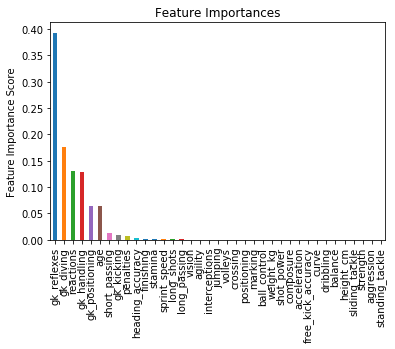

In [212]:
features = [i for i in dta.columns if i != "Value (M)"]
target = "Value (M)"
gbm0 = GradientBoostingRegressor(random_state=7)
modelfit(gbm0, dta, features)

# Feature Ranking

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=8,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=50, min_sa...       subsample=0.8, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'n_estimators': [700, 710, 720, 730, 740]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

(<bound method BaseSearchCV.score of GridSearchCV(cv=10, error_score='raise-deprecating',
        estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='ls', max_depth=8,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=50, min_sa...       subsample=0.8, tol=0.0001, validation_fraction=0.1, verbose=0,
              warm_start=False),
        fit_params=None, iid=False, n_jobs=4,
        param_grid={'n_estimators': [700, 710, 720, 730, 740]},
        pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
        scoring='neg_mean_squared_error', verbose=0)>,
 {'n_estimators': 740},
 -13.112525468412244)


Model Report
RMSE : 1.026
CV Score : Mean - 1.648 | Std - 3.224 | Min - 0.2202 | Max - 11.27


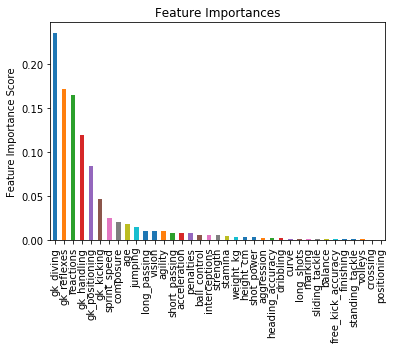

In [183]:
estimators = [x for x in range(700,750,10)]
param_test1 = {'n_estimators':estimators}
gsearch1 = GridSearchCV(estimator = GradientBoostingRegressor(learning_rate=0.1, min_samples_split=500,
                                  min_samples_leaf=50,max_depth=8,max_features='sqrt', subsample=0.8,random_state=10), 
                       param_grid = param_test1, scoring='neg_mean_squared_error',n_jobs=4,iid=False, cv=10)
gsearch1.fit(dta[features],dta["Value (M)"])

gsearch1.score, gsearch1.best_params_, gsearch1.best_score_
modelfit(gsearch1.best_estimator_, dta, features)

# Gradient Boosting Regression and Feature Importance for Reduced Model


Model Report
RMSE : 0.3608
CV Score : Mean - 1.42 | Std - 3.253 | Min - 0.06488 | Max - 11.13


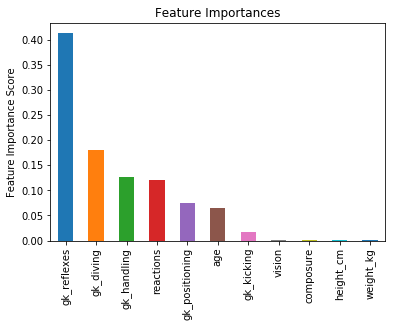

In [186]:
features1 = [i for i in dta2.columns if i != "Value (M)"]
target = "Value (M)"
gbm1 = GradientBoostingRegressor(random_state=7)
modelfit(gbm1, dta2, features1)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=8,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=50, min_sa...       subsample=0.8, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'n_estimators': [700, 710, 720, 730, 740]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

(<bound method BaseSearchCV.score of GridSearchCV(cv=10, error_score='raise-deprecating',
        estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='ls', max_depth=8,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=50, min_sa...       subsample=0.8, tol=0.0001, validation_fraction=0.1, verbose=0,
              warm_start=False),
        fit_params=None, iid=False, n_jobs=4,
        param_grid={'n_estimators': [700, 710, 720, 730, 740]},
        pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
        scoring='neg_mean_squared_error', verbose=0)>,
 {'n_estimators': 730},
 -12.52598819477318)


Model Report
RMSE : 1.388
CV Score : Mean - 1.465 | Std - 3.222 | Min - 0.1063 | Max - 11.06


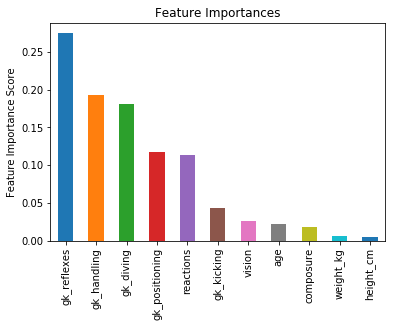

In [187]:
estimators1 = [x for x in range(700,750,10)]
param_test2 = {'n_estimators':estimators1}
gsearch2 = GridSearchCV(estimator = GradientBoostingRegressor(learning_rate=0.1, min_samples_split=500,
                                  min_samples_leaf=50,max_depth=8,max_features='sqrt', subsample=0.8,random_state=10), 
                       param_grid = param_test2, scoring='neg_mean_squared_error',n_jobs=4,iid=False, cv=10)
gsearch2.fit(dta2[features1],dta2["Value (M)"])

gsearch2.score, gsearch2.best_params_, gsearch2.best_score_
modelfit(gsearch2.best_estimator_, dta2, features1)

# New Goal Keeper Value Model

/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


                            OLS Regression Results                            
Dep. Variable:              Value (M)   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     55.22
Date:                Mon, 26 Nov 2018   Prob (F-statistic):           7.35e-54
Time:                        21:00:31   Log-Likelihood:                -4841.2
No. Observations:                1997   AIC:                             9694.
Df Residuals:                    1991   BIC:                             9728.
Df Model:                           5                                         
Covariance Type:                  HC0                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.5912      0.061     26.021      

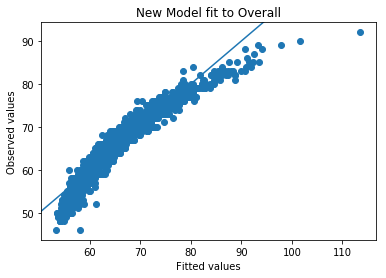

In [567]:
#Create our New Model with Interaction Terms
data=gk_dta
x=data[attribute_profile]
X=sm.add_constant(x)
y1=data[overall_target]
y2=data[value_target]
y3=data[ln_value]
data=gk_dta
def gk_skills (row):
    return row['gk_reflexes'] * row['gk_handling'] * row['gk_diving'] *row['gk_positioning'] *row['gk_kicking']
def gk_ath_ment (row):
    return row['acceleration'] *row['jumping'] *row['reactions'] * row['strength'] *row['aggression'] * row['composure'] * row['vision']

def gk_attack (row):
    return row['long_passing'] * row['ball_control'] *row['short_passing']
def gk_phy (row):
    return row['height_cm'] * row['weight_kg']


data['gk_skills'] = data.apply(gk_skills, axis=1)
data['gk_ath_ment']= data.apply(gk_ath_ment, axis=1)
data['gk_attack']= data.apply(gk_attack, axis=1)
data['gk_phy']= data.apply(gk_phy, axis=1)
features=['age', 'gk_skills', 'gk_ath_ment' , 'gk_attack', 'gk_phy']
x=data[features]
#We must now scale the features
x =pd.DataFrame(scaler.fit_transform(x))
x.columns= ['age', 'gk_skills', 'gk_ath_ment' , 'gk_attack', 'gk_phy']
#We have now addressed the issue of endogenity by including interaction terms
X=sm.add_constant(x)
y1=data[overall_target]
y2=data[value_target]
y3=data[ln_value]
mod=sm.OLS(y1,X)
res=mod.fit(cov_type='HC0')
yhat = res.fittedvalues
OLS_model = sm.OLS(y2,X)
OLS_results=OLS_model.fit(cov_type='HC0')
print(OLS_results.summary())
print(res.aic)
#Plot of y-hat for y-true on the reduced model for overall rating
from statsmodels.graphics.api import abline_plot
fig, ax = plt.subplots()
ax.scatter(yhat, y1)
line_fit = sm.OLS(y1, sm.add_constant(yhat, prepend=True)).fit()
abline_plot(model_results=line_fit, ax=ax)


ax.set_title('New Model fit to Overall')
ax.set_ylabel('Observed values')
ax.set_xlabel('Fitted values');

In [439]:
#Elasticity of the selected features on Value
data=gk_dta
y3=data[ln_value]
OLS_model = sm.OLS(y3,X)
OLS_results=OLS_model.fit(cov_type='HC0')
print(OLS_results.summary())

                            OLS Regression Results                            
Dep. Variable:               ln_value   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     147.7
Date:                Mon, 26 Nov 2018   Prob (F-statistic):          1.45e-133
Time:                        18:00:03   Log-Likelihood:                -1558.4
No. Observations:                1997   AIC:                             3129.
Df Residuals:                    1991   BIC:                             3162.
Df Model:                           5                                         
Covariance Type:                  HC0                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.5794      0.012     49.033   

In this case our R-squared has gone down, however, we have addressed the issue of endogenity as well as heteroskedacity, and can thus trust our model.

<p style="font-family: Arial; font-size:2.750em;color:DarkRed; font-style:bold">
<br>
Position Analysis: Center Backs
</p><br>

In [30]:
data=CB
lnVal=pd.DataFrame((data["Value (M)"]+1).apply(np.log))
lnVal.columns = ['ln_value']
cb_dta = pd.concat([lnVal, data], axis=1)
cb_dta.head()
data=cb_dta
x=data[attribute_profile]
X=sm.add_constant(x)
y1=data[overall_target]
y2=data[value_target]
y3=data[ln_value]

ln_value      ID          Name  Overall  Potential  Value (M)  \
0  3.970292  155862  Sergio Ramos       90         90       52.0   
1  3.663562  138956  G. Chiellini       89         89       38.0   
2  3.555348  164240  Thiago Silva       88         88       34.0   
3  3.891820  178603    M. Hummels       88         88       48.0   
4  3.891820  183907    J. Boateng       88         88       48.0   

                  club  age  height_cm  weight_kg         ...          \
0       Real Madrid CF   31        183         75         ...           
1             Juventus   32        187         85         ...           
2  Paris Saint-Germain   32        183         79         ...           
3     FC Bayern Munich   28        191         92         ...           
4     FC Bayern Munich   28        192         90         ...           

   gk_reflexes  foot_Left  foot_Right  international_reputation  \
0           11          0           1                         4   
1            3          1           0                         4   
2           10          0           1                         4   
3            6          0           1                         4   
4            5          0           1                         4   

   att_rate_High  att_rate_Low  att_rate_Medium  defend_rate_High  \
0              1             0                0                 0   
1              0             1                0                 1   
2              1             0                0                 1   
3              1             0                0                 0   
4              0             0                1                 0   

   defend_rate_Low  defend_rate_Medium  
0                0                   1  
1                0                   0  
2                0                   0  
3                0                   1  
4                0                   1  

[5 rows x 54 columns]

In [436]:
#OLS for Overall
OLS_model = sm.OLS(y1,X)
OLS_results=OLS_model.fit(cov_type='HC0')
print("The R-squared for the attributes with overall is:" ,OLS_results.rsquared_adj)
OLS_model2 = sm.OLS(y2,X)
OLS_results2=OLS_model2.fit(cov_type='HC0')
print("\n\nThe adjusted R-squared for the original CB value model is:" ,OLS_results2.rsquared_adj)
print("\nThe model AIC is: " ,OLS_results2.aic)

The R-squared for the attributes with overall is: 0.9767396881639706


The adjusted R-squared for the original CB value model is: 0.5190537115283163

The model AIC is:  18373.33296177382


In [336]:
#Lasso Regression
X_train,X_test,y_train,y_test=train_test_split(x,y1,test_size=0.3,random_state=0)
lr = LinearRegression()
lr.fit(X_train, y_train)

#Lasso Fit (Overall)
#lasso = Lasso(alpha=1.0, max_iter=1000000).fit(X_train, y_train)

from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
X_std = scaler.fit_transform(x)
regr_cv = LassoCV(alphas=np.arange(1,9999.999))
# Fit the linear regression
model_cv = regr_cv.fit(X_std, y1)
print("The alpha we should use for lasso regression is:" ,model_cv.alpha_)

#Lasso Coefficients 
y_prediction = lasso.predict(X_test)
lasso_coef=lasso.coef_
cols=np.array(x.columns)
cols=cols.reshape(37,1)
lasso_coef=lasso_coef.reshape(37,1)
coefs=np.concatenate((cols, lasso_coef), axis=1)
coefs=pd.DataFrame(coefs)
intercept=lasso.intercept_
print("the intercept is:" ,intercept)
print(coefs)
coefs.columns

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warni

The alpha we should use for lasso regression is: 1.0
the intercept is: [4.50938631]
                     0            1
0                  age            0
1            height_cm            0
2            weight_kg            0
3             crossing            0
4            finishing            0
5     heading_accuracy    0.0845769
6        short_passing    0.0378575
7              volleys            0
8            dribbling            0
9                curve  0.000671074
10  free_kick_accuracy            0
11        long_passing    0.0130469
12        ball_control    0.0369107
13        acceleration            0
14        sprint_speed    0.0159315
15             agility            0
16           reactions    0.0749947
17             balance           -0
18          shot_power   0.00167228
19             jumping    0.0169125
20             stamina  0.000243625
21            strength    0.0769415
22          long_shots            0
23          aggression     0.059625
24       interce

RangeIndex(start=0, stop=2, step=1)

# Pearson Correlation of CB Features

<Figure size 720x720 with 0 Axes>

Text(0.5, 1.05, 'Pearson correlation of used Features with Targets')

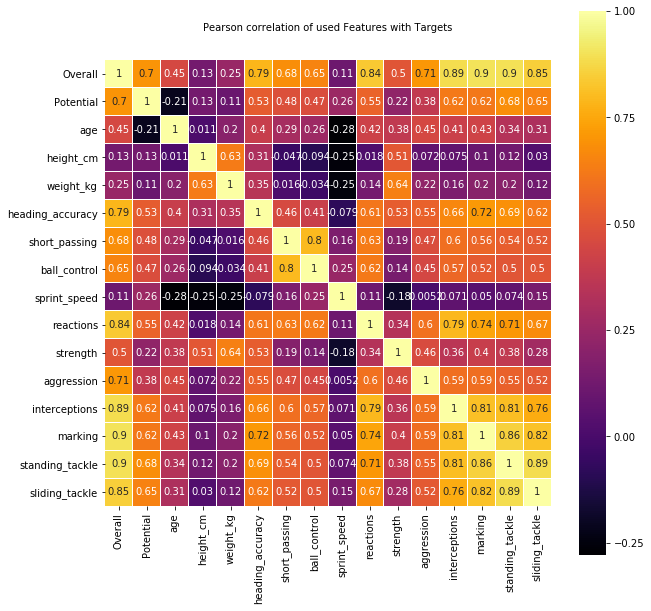

In [31]:
used_variables = ['Overall','Potential','age','height_cm', 'weight_kg','heading_accuracy', 'short_passing' ,'ball_control', 
               'sprint_speed', 'reactions','strength', 'aggression',
                 'interceptions', 'marking', 'standing_tackle', 'sliding_tackle']
corr_variables = data[used_variables]
colormap = plt.cm.inferno
plt.figure(figsize=(10,10))
plt.title('Pearson correlation of used Features with Targets', 
          y=1.05, size=10)
sns.heatmap(corr_variables.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)


In [375]:
#Preparing a ridge model
features=lasso.coef_
indices=np.nonzero(features)
np.take(features, indices)
cb_features_used=['age','height_cm', 'weight_kg','heading_accuracy', 'short_passing' ,'ball_control', 
               'sprint_speed', 'reactions','strength', 'aggression',
                 'interceptions', 'marking', 'standing_tackle', 'sliding_tackle']

data=cb_dta
x=data[cb_features_used]
X=sm.add_constant(x)
y1=data[overall_target]
y2=data[value_target]
y3=data[ln_value]
x.shape

#Finding the best alpha for ridge regression for value
x=data[cb_features_used]
y2=data[value_target]

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
scaler = StandardScaler()
X_std = scaler.fit_transform(x)
regr_cv = RidgeCV(alphas=np.arange(0.001,9999.999))
# Fit the linear regression
model_cv = regr_cv.fit(X_std, y2)
model_cv.alpha_
print("The alpha we should use for ridge regression is:" ,model_cv.alpha_)

array([[0.11160108, 0.00040904, 0.00131157, 0.19854295, 0.2068868 ,
        0.04369794, 0.2136255 , 0.20766875]])

(3589, 14)

/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


52.00099999999999

The alpha we should use for ridge regression is: 52.00099999999999


In [376]:
#What to set alpha to for ridge regression for elasticity
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
scaler = StandardScaler()
X_std = scaler.fit_transform(x)
regr_cv = RidgeCV(alphas=np.arange(0.001,9999.999))
# Fit the linear regression
model_cv = regr_cv.fit(X_std, y3)
model_cv.alpha_
print("The alpha we should use for ridge regression for elasticity is:" ,model_cv.alpha_)

/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


27.000999999999998

The alpha we should use for ridge regression for elasticity is: 27.000999999999998


In [383]:
#Fitting ridge regression to the reduced model
#Note we use the suggested alpha of 52.01
X_train,X_test,y_train,y_test=train_test_split(x,y2,test_size=0.3,random_state=0)
lr = LinearRegression()
lr.fit(X_train, y_train)
#Ridge fit: Finding out what alpha to use for ridge
ridge = Ridge(alpha=52.01)
ridge.fit(X_train, y_train)
y_prediction = ridge.predict(X_test)
ridge_coef=ridge.coef_
cols=np.array(x.columns)
ridge_coef=ridge.coef_
cols=np.array(x.columns)
cols=cols.reshape(14,1)
ridge_coef=ridge_coef.reshape(14,1)
ridge_coefs=np.concatenate((cols, ridge_coef), axis=1)
ridge_coefs=pd.DataFrame(ridge_coefs)
ridge_intercept=ridge.intercept_
print(ridge_intercept)
print(ridge_coefs)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Ridge(alpha=52.01, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

[-30.75542114]
                   0           1
0                age   -0.232848
1          height_cm   0.0225915
2          weight_kg   0.0279878
3   heading_accuracy    0.050792
4      short_passing -0.00277465
5       ball_control   0.0193687
6       sprint_speed   0.0180922
7          reactions     0.10354
8           strength  0.00691043
9         aggression   0.0016774
10     interceptions   0.0663203
11           marking -0.00227414
12   standing_tackle    0.099245
13    sliding_tackle    0.142504


In [384]:
#Fitting ridge regression to the reduced model for elasticy
#Note we use the suggested alpha of 27.01
X_train,X_test,y_train,y_test=train_test_split(x,y3,test_size=0.3,random_state=0)
lr = LinearRegression()
lr.fit(X_train, y_train)
#Ridge fit: Finding out what alpha to use for ridge
ridge2 = Ridge(alpha=27.01)
ridge2.fit(X_train, y_train)
y_prediction2 = ridge2.predict(X_test)
ridge_coef=ridge.coef_
cols=np.array(x.columns)
ridge_coef=ridge.coef_
cols=np.array(x.columns)
cols=cols.reshape(14,1)
ridge_coef=ridge_coef.reshape(14,1)
ridge_coefs=np.concatenate((cols, ridge_coef), axis=1)
ridge_coefs=pd.DataFrame(ridge_coefs)
ridge_intercept=ridge.intercept_
print(ridge_intercept)
print(ridge_coefs)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Ridge(alpha=27.01, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

[-30.75542114]
                   0           1
0                age   -0.232848
1          height_cm   0.0225915
2          weight_kg   0.0279878
3   heading_accuracy    0.050792
4      short_passing -0.00277465
5       ball_control   0.0193687
6       sprint_speed   0.0180922
7          reactions     0.10354
8           strength  0.00691043
9         aggression   0.0016774
10     interceptions   0.0663203
11           marking -0.00227414
12   standing_tackle    0.099245
13    sliding_tackle    0.142504


In [381]:
#Model Evaluation for Value
X_train,X_test,y_train,y_test=train_test_split(x,y2,test_size=0.3,random_state=0)
Ridge_train_score = ridge.score(X_train,y_train)
Ridge_test_score = ridge.score(X_test, y_test)
y_prediction = ridge.predict(X_test)
print("The training and test scores respectively are: " ,Ridge_train_score, "and" ,Ridge_test_score)
from math import sqrt
from sklearn.metrics import mean_squared_error
RMSE_test=sqrt(mean_squared_error(y_true=y_test,y_pred=y_prediction))
print("\n Root Mean Square Error of test set is:" ,RMSE_test)
from sklearn import metrics
from sklearn.model_selection import cross_val_score
scores=cross_val_score(ridge,X,y2,cv=5)
print("\n K-folds cross validation scores:" ,scores)

The training and test scores respectively are:  0.5197743919571431 and 0.4878608519156339

 Root Mean Square Error of test set is: 3.3666157519126685

 K-folds cross validation scores: [-5.16280150e-01 -6.92970105e+00 -4.90712461e+01 -8.46420700e+01
 -2.73686554e+03]


In [385]:
#Model Evaluation for Value
X_train,X_test,y_train,y_test=train_test_split(x,y3,test_size=0.3,random_state=0)
Ridge_train_score = ridge.score(X_train,y_train)
Ridge_test_score = ridge2.score(X_test, y_test)
y_prediction = ridge.predict(X_test)
print("The training and test scores respectively are: " ,Ridge_train_score, "and" ,Ridge_test_score)
from math import sqrt
from sklearn.metrics import mean_squared_error
RMSE_test=sqrt(mean_squared_error(y_true=y_test,y_pred=y_prediction2))
print("\n Root Mean Square Error of test set is:" ,RMSE_test)
from sklearn import metrics
from sklearn.model_selection import cross_val_score
scores=cross_val_score(ridge,X,y3,cv=5)
print("\n K-folds cross validation scores:" ,scores)

The training and test scores respectively are:  -14.829655345644829 and 0.8104508498440268

 Root Mean Square Error of test set is: 0.31993510801791536

 K-folds cross validation scores: [ -0.86930634   0.30738145  -2.30874397  -3.41778393 -66.4308459 ]


In [390]:
#Gradient Boosting Regression
gb_model=['Value (M)', 'age', 'height_cm', 'weight_kg', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'composure', 'marking', 'standing_tackle',
       'sliding_tackle', 'gk_diving', 'gk_handling', 'gk_kicking',
       'gk_positioning', 'gk_reflexes']

cb_reduced=['Value (M)','age','height_cm', 'weight_kg','heading_accuracy', 'short_passing' ,'ball_control', 
               'sprint_speed', 'reactions','strength', 'aggression',
                 'interceptions', 'marking', 'standing_tackle', 'sliding_tackle']

def modelfit(alg, dtrain, features, performCV=True, printFeatureImportance=True, cv_folds=10):
    #Fit the algorithm on the data
    
    alg.fit(dtrain[features],dtrain["Value (M)"] )
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[features])

    #Perform cross-validation:
    cv_score =  cross_val_score(alg, dtrain[features], dtrain["Value (M)"], cv=cv_folds,
                                                scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print ("\nModel Report")
    print ("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(dtrain["Value (M)"], dtrain_predictions)))
    print ("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),
                                                                             np.std(cv_score),np.min(cv_score),
                                                                              np.max(cv_score)))
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, features).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')
        

dta=CB[gb_model]
dta.head()
dta2=CB[cb_reduced]
dta2.head()

Value (M)  age  height_cm  weight_kg  crossing  finishing  \
0       52.0   31        183         75        66         60   
1       38.0   32        187         85        58         33   
2       34.0   32        183         79        60         38   
3       48.0   28        191         92        64         55   
4       48.0   28        192         90        69         34   

   heading_accuracy  short_passing  volleys  dribbling     ...       \
0                91             78       66         61     ...        
1                84             59       45         58     ...        
2                82             79       63         68     ...        
3                89             80       60         68     ...        
4                85             75       53         67     ...        

   penalties  composure  marking  standing_tackle  sliding_tackle  gk_diving  \
0         68         80       86               89              91         11   
1         50         82       92               92              90          3   
2         71         83       90               89              88          9   
3         68         91       85               92              90         15   
4         46         86       88               91              90          7   

   gk_handling  gk_kicking  gk_positioning  gk_reflexes  
0            8           9               7           11  
1            3           2               4            3  
2           12           5               9           10  
3            6          10               5            6  
4           12          15               6            5  

[5 rows x 38 columns]

Value (M)  age  height_cm  weight_kg  heading_accuracy  short_passing  \
0       52.0   31        183         75                91             78   
1       38.0   32        187         85                84             59   
2       34.0   32        183         79                82             79   
3       48.0   28        191         92                89             80   
4       48.0   28        192         90                85             75   

   ball_control  sprint_speed  reactions  strength  aggression  interceptions  \
0            84            77         85        81          84             88   
1            57            78         82        91          92             88   
2            80            74         84        81          77             89   
3            77            65         85        85          66             89   
4            71            78         82        91          82             83   

   marking  standing_tackle  sliding_tackle  
0       86               89              91  
1       92               92              90  
2       90               89              88  
3       85               92              90  
4       88               91              90


Model Report
RMSE : 0.6212
CV Score : Mean - 1.523 | Std - 2.903 | Min - 0.1467 | Max - 10.14


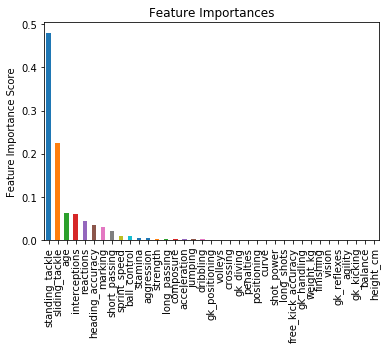

In [387]:
features = [i for i in dta.columns if i != "Value (M)"]
target = "Value (M)"
gbm0 = GradientBoostingRegressor(random_state=7)
modelfit(gbm0, dta, features)

# Feature Ranking

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=8,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=50, min_sa...       subsample=0.8, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'n_estimators': [700, 710, 720, 730, 740]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

(<bound method BaseSearchCV.score of GridSearchCV(cv=10, error_score='raise-deprecating',
        estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='ls', max_depth=8,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=50, min_sa...       subsample=0.8, tol=0.0001, validation_fraction=0.1, verbose=0,
              warm_start=False),
        fit_params=None, iid=False, n_jobs=4,
        param_grid={'n_estimators': [700, 710, 720, 730, 740]},
        pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
        scoring='neg_mean_squared_error', verbose=0)>,
 {'n_estimators': 740},
 -11.102239689802543)


Model Report
RMSE : 0.5869
CV Score : Mean - 1.532 | Std - 2.959 | Min - 0.1953 | Max - 10.33


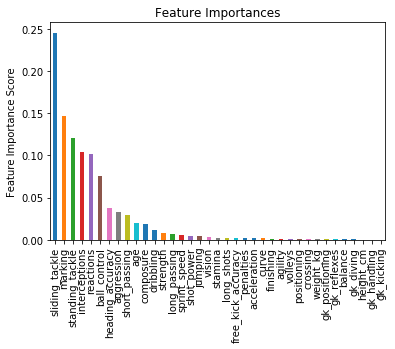

In [388]:
estimators = [x for x in range(700,750,10)]
param_test1 = {'n_estimators':estimators}
gsearch1 = GridSearchCV(estimator = GradientBoostingRegressor(learning_rate=0.1, min_samples_split=500,
                                  min_samples_leaf=50,max_depth=8,max_features='sqrt', subsample=0.8,random_state=10), 
                       param_grid = param_test1, scoring='neg_mean_squared_error',n_jobs=4,iid=False, cv=10)
gsearch1.fit(dta[features],dta["Value (M)"])

gsearch1.score, gsearch1.best_params_, gsearch1.best_score_
modelfit(gsearch1.best_estimator_, dta, features)


Model Report
RMSE : 0.649
CV Score : Mean - 1.516 | Std - 2.867 | Min - 0.1413 | Max - 10.02


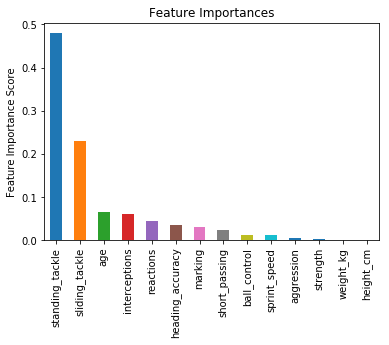

In [391]:
features1 = [i for i in dta2.columns if i != "Value (M)"]
target = "Value (M)"
gbm1 = GradientBoostingRegressor(random_state=7)
modelfit(gbm1, dta2, features1)

# New CB Model

/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:1532: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 6, but rank is 5
  'rank is %d' % (J, J_), ValueWarning)


                            OLS Regression Results                            
Dep. Variable:              Value (M)   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     149.5
Date:                Mon, 26 Nov 2018   Prob (F-statistic):          1.53e-144
Time:                        21:00:06   Log-Likelihood:                -8550.3
No. Observations:                3589   AIC:                         1.711e+04
Df Residuals:                    3583   BIC:                         1.715e+04
Df Model:                           5                                         
Covariance Type:                  HC0                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.1994      0.044     50.277   

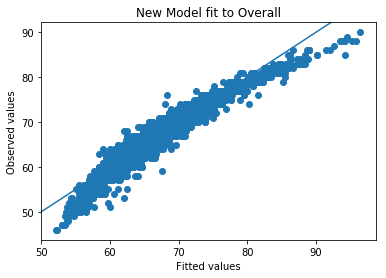

In [566]:
#Create our New Model with Interaction Terms
data=cb_dta
def cb_skills (row):
    return row['interceptions'] * row['marking'] * row['standing_tackle'] *row['sliding_tackle']
def cb_ath (row):
    return row['sprint_speed'] *row['jumping'] *row['reactions'] * row['strength']

def cb_mentality (row):
    return row['aggression'] * row['composure'] * row['reactions']
def cb_attack (row):
    return row['short_passing'] * row['ball_control'] *row['heading_accuracy']
def cb_phy (row):
    return row['height_cm'] * row['weight_kg']


data['cb_skills'] = data.apply(cb_skills, axis=1)
data['cb_ath']= data.apply(cb_ath, axis=1)
data['cb_mentality']= data.apply(cb_ath, axis=1)
data['cb_attack']= data.apply(cb_attack, axis=1)
data['cb_phy']= data.apply(cb_phy, axis=1)
features=['age', 'cb_skills', 'cb_ath', 'cb_mentality', 'cb_attack', 'cb_phy']
x=data[features]
#We must now scale the features
x =pd.DataFrame(scaler.fit_transform(x))
x.columns= ['age', 'cb_skills', 'cb_ath' ,'cb_mentality', 'cb_attack', 'cb_phy']
#We have now addressed the issue of endogenity by including interaction terms
X=sm.add_constant(x)
y1=data[overall_target]
y2=data[value_target]
y3=data[ln_value]
mod=sm.OLS(y1,X)
res=mod.fit(cov_type='HC0')
yhat = res.fittedvalues
OLS_model = sm.OLS(y2,X)
OLS_results=OLS_model.fit(cov_type='HC0')
print(OLS_results.summary())
print(res.aic)
#Plot of y-hat for y-true on the reduced model for overall rating
from statsmodels.graphics.api import abline_plot
fig, ax = plt.subplots()
ax.scatter(yhat, y1)
line_fit = sm.OLS(y1, sm.add_constant(yhat, prepend=True)).fit()
abline_plot(model_results=line_fit, ax=ax)


ax.set_title('New Model fit to Overall')
ax.set_ylabel('Observed values')
ax.set_xlabel('Fitted values');

# New Center Back Value Model

In [452]:
#Let us now examine elasticity with the new model
X=sm.add_constant(x)
y2=data[value_target]
OLS_model = sm.OLS(y3,X)
OLS_results=OLS_model.fit(cov_type='HC0')
print(OLS_results.summary())

                            OLS Regression Results                            
Dep. Variable:               ln_value   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     3817.
Date:                Mon, 26 Nov 2018   Prob (F-statistic):               0.00
Time:                        18:13:51   Log-Likelihood:                -4.7605
No. Observations:                3589   AIC:                             21.52
Df Residuals:                    3583   BIC:                             58.63
Df Model:                           5                                         
Covariance Type:                  HC0                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.7848      0.004    194.056   

In this case not only has endogenity and heteroscedasticity been addressed, but we have improved the R-squared of the model.

<p style="font-family: Arial; font-size:2.750em;color:DarkRed; font-style:bold">
<br>
Position Analysis: Full Backs
</p><br>

In [28]:
data=FB
lnVal=pd.DataFrame((data["Value (M)"]+1).apply(np.log))
lnVal.columns = ['ln_value']
fb_dta = pd.concat([lnVal, data], axis=1)
fb_dta.head()
data=fb_dta
x=data[attribute_profile]
X=sm.add_constant(x)
y1=data[overall_target]
y2=data[value_target]
y3=data[ln_value]
#OLS for Overall
OLS_model = sm.OLS(y1,X)
OLS_results=OLS_model.fit(cov_type='HC0')
print("The R-squared for the attributes with overall is:" ,OLS_results.rsquared_adj)
OLS_model2 = sm.OLS(y2,X)
OLS_results2=OLS_model2.fit(cov_type='HC0')
print("\n\nThe adjusted R-squared for the original CB value model is:" ,OLS_results2.rsquared_adj)
print("\nThe model AIC is: " ,OLS_results2.aic)

ln_value      ID         Name  Overall  Potential  Value (M)  \
0  3.663562  176676      Marcelo       87         87       38.0   
1  3.817712  197445     D. Alaba       86         88       44.5   
2  3.806662  191043  Alex Sandro       86         88       44.0   
3  3.650658  184432  Azpilicueta       85         87       37.5   
4  3.449988  189332   Jordi Alba       85         85       30.5   

               club  age  height_cm  weight_kg         ...          \
0    Real Madrid CF   29        174         75         ...           
1  FC Bayern Munich   25        180         76         ...           
2          Juventus   26        181         81         ...           
3           Chelsea   27        178         78         ...           
4      FC Barcelona   28        170         68         ...           

   gk_reflexes  foot_Left  foot_Right  international_reputation  \
0            9          1           0                         4   
1            9          1           0                         4   
2            5          1           0                         3   
3            5          0           1                         3   
4           13          1           0                         3   

   att_rate_High  att_rate_Low  att_rate_Medium  defend_rate_High  \
0              1             0                0                 0   
1              1             0                0                 0   
2              1             0                0                 1   
3              0             0                1                 0   
4              1             0                0                 0   

   defend_rate_Low  defend_rate_Medium  
0                0                   1  
1                0                   1  
2                0                   0  
3                0                   1  
4                0                   1  

[5 rows x 54 columns]

The R-squared for the attributes with overall is: 0.9211686117206395


The adjusted R-squared for the original CB value model is: 0.49884282137975655

The model AIC is:  19821.193103331858


In [469]:
#Lasso Regression
X_train,X_test,y_train,y_test=train_test_split(x,y1,test_size=0.3,random_state=0)
lr = LinearRegression()
lr.fit(X_train, y_train)

#Lasso Fit (Overall)
lasso = Lasso(alpha=1.0, max_iter=1000000).fit(X_train, y_train)

from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
X_std = scaler.fit_transform(x)
regr_cv = LassoCV(alphas=np.arange(1,9999.999))
# Fit the linear regression
model_cv = regr_cv.fit(X_std, y1)
print("The alpha we should use for lasso regression is:" ,model_cv.alpha_)
lasso = Lasso(alpha=1.0, max_iter=1000000).fit(X_train, y_train)
#Lasso Coefficients 
y_prediction = lasso.predict(X_test)
lasso_coef=lasso.coef_
cols=np.array(x.columns)
cols=cols.reshape(37,1)
lasso_coef=lasso_coef.reshape(37,1)
coefs=np.concatenate((cols, lasso_coef), axis=1)
coefs=pd.DataFrame(coefs)
intercept=lasso.intercept_
print("the intercept is:" ,intercept)
print(coefs)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warni

The alpha we should use for lasso regression is: 1.0
the intercept is: [9.83169515]
                     0            1
0                  age            0
1            height_cm            0
2            weight_kg            0
3             crossing    0.0296561
4            finishing   0.00264624
5     heading_accuracy    0.0724916
6        short_passing    0.0911999
7              volleys            0
8            dribbling            0
9                curve            0
10  free_kick_accuracy            0
11        long_passing  0.000705052
12        ball_control    0.0838473
13        acceleration   0.00947536
14        sprint_speed    0.0627873
15             agility            0
16           reactions      0.14768
17             balance           -0
18          shot_power   0.00867427
19             jumping  5.82115e-05
20             stamina    0.0440155
21            strength    0.0189905
22          long_shots            0
23          aggression    0.0030194
24       interce

In [472]:
#Preparing a ridge model
features=lasso.coef_
indices=np.nonzero(features)
np.take(features, indices)
fb_features_used=['age', 'height_cm', 'weight_kg', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 
        'ball_control', 'acceleration', 'sprint_speed',
       'reactions',  'shot_power', 'stamina',
       'strength',  'aggression', 'interceptions', 
        'penalties', 'composure', 'marking', 'standing_tackle',
       'sliding_tackle']

data=fb_dta
x=data[fb_features_used]
X=sm.add_constant(x)
y1=data[overall_target]
y2=data[value_target]
y3=data[ln_value]
x.shape
#What alpha should we use
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
scaler = StandardScaler()
X_std = scaler.fit_transform(x)
regr_cv = RidgeCV(alphas=np.arange(0.001,9999.999))
# Fit the linear regression
model_cv = regr_cv.fit(X_std, y2)
model_cv.alpha_
print("The alpha we should use for ridge regression is:" ,model_cv.alpha_)

array([[2.96560690e-02, 2.64623865e-03, 7.24915843e-02, 9.11999457e-02,
        7.05052413e-04, 8.38472739e-02, 9.47535938e-03, 6.27873387e-02,
        1.47680244e-01, 8.67427415e-03, 5.82115337e-05, 4.40155481e-02,
        1.89904876e-02, 3.01940311e-03, 8.34099959e-02, 4.82689489e-03,
        4.55749094e-02, 4.05975224e-02, 6.96804861e-02, 7.45425449e-02]])

(4443, 21)

/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


47.00099999999999

The alpha we should use for ridge regression is: 47.00099999999999


In [473]:
#Fitting ridge regression to the reduced model
#Note we use the suggested alpha of 47.01
X_train,X_test,y_train,y_test=train_test_split(x,y2,test_size=0.3,random_state=0)
lr = LinearRegression()
lr.fit(X_train, y_train)
#Ridge fit: Finding out what alpha to use for ridge
ridge = Ridge(alpha=47.01)
ridge.fit(X_train, y_train)
y_prediction = ridge.predict(X_test)
ridge_coef=ridge.coef_
cols=np.array(x.columns)
ridge_coef=ridge.coef_
cols=np.array(x.columns)
cols=cols.reshape(21,1)
ridge_coef=ridge_coef.reshape(21,1)
ridge_coefs=np.concatenate((cols, ridge_coef), axis=1)
ridge_coefs=pd.DataFrame(ridge_coefs)
ridge_intercept=ridge.intercept_
print(ridge_intercept)
print(ridge_coefs)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Ridge(alpha=47.01, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

[-12.58034089]
                   0           1
0                age   -0.232369
1          height_cm  -0.0245367
2          weight_kg  0.00689697
3           crossing   0.0159733
4          finishing   0.0234055
5   heading_accuracy   0.0274091
6      short_passing  0.00803264
7       ball_control   0.0119604
8       acceleration -0.00351722
9       sprint_speed   0.0125693
10         reactions    0.103654
11        shot_power  -0.0019431
12           stamina   0.0220401
13          strength   0.0164439
14        aggression  -0.0104205
15     interceptions   0.0453487
16         penalties   0.0097418
17         composure   0.0261696
18           marking  -0.0276853
19   standing_tackle   0.0610693
20    sliding_tackle   0.0507346


# Pearson Correlation of Full Back Features

<Figure size 1080x1080 with 0 Axes>

Text(0.5, 1.05, 'Pearson correlation of used Features with Targets')

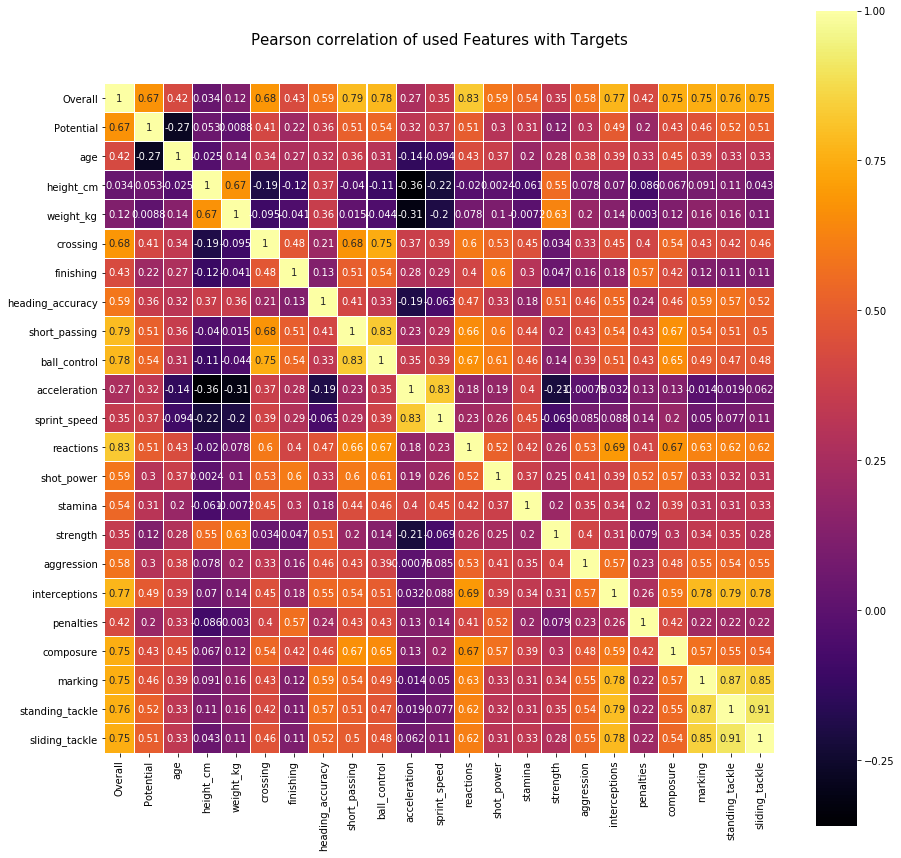

In [29]:
used_variables = ['Overall','Potential',  'age', 'height_cm', 'weight_kg', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'ball_control', 'acceleration', 'sprint_speed','reactions',  'shot_power', 'stamina',
       'strength',  'aggression', 'interceptions', 'penalties', 'composure', 'marking', 'standing_tackle','sliding_tackle']
corr_variables = data[used_variables]
colormap = plt.cm.inferno
plt.figure(figsize=(15,15))
plt.title('Pearson correlation of used Features with Targets', 
          y=1.05, size=15)
sns.heatmap(corr_variables.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)


In [474]:
#Model Evaluation for Value
X_train,X_test,y_train,y_test=train_test_split(x,y2,test_size=0.3,random_state=0)
Ridge_train_score = ridge.score(X_train,y_train)
Ridge_test_score = ridge.score(X_test, y_test)
y_prediction = ridge.predict(X_test)
print("The training and test scores respectively are: " ,Ridge_train_score, "and" ,Ridge_test_score)
from math import sqrt
from sklearn.metrics import mean_squared_error
RMSE_test=sqrt(mean_squared_error(y_true=y_test,y_pred=y_prediction))
print("\n Root Mean Square Error of test set is:" ,RMSE_test)
from sklearn import metrics
from sklearn.model_selection import cross_val_score
scores=cross_val_score(ridge,X,y2,cv=5)
print("\n K-folds cross validation scores:" ,scores)

The training and test scores respectively are:  0.5115982923524287 and 0.4666374868435317

 Root Mean Square Error of test set is: 2.397975080927799

 K-folds cross validation scores: [  0.40175035 -30.27929944   0.47428942 -23.25740157   0.16927888]


In [487]:
#Gradient Boosting Regression
FB=FB

fb_reduced=['Value (M)',  'age', 'height_cm', 'weight_kg', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 
        'ball_control', 'acceleration', 'sprint_speed',
       'reactions',  'shot_power', 'stamina',
       'strength',  'aggression', 'interceptions', 
        'penalties', 'composure', 'marking', 'standing_tackle',
       'sliding_tackle']

def modelfit(alg, dtrain, features, performCV=True, printFeatureImportance=True, cv_folds=10):
    #Fit the algorithm on the data
    
    alg.fit(dtrain[features],dtrain["Value (M)"] )
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[features])

    #Perform cross-validation:
    cv_score =  cross_val_score(alg, dtrain[features], dtrain["Value (M)"], cv=cv_folds,
                                                scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print ("\nModel Report")
    print ("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(dtrain["Value (M)"], dtrain_predictions)))
    print ("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),
                                                                             np.std(cv_score),np.min(cv_score),
                                                                              np.max(cv_score)))
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, features).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')
        


In [488]:
dta=FB[fb_reduced]
dta.head()

Value (M)  age  height_cm  weight_kg  crossing  finishing  \
0       38.0   29        174         75        90         67   
1       44.5   25        180         76        82         63   
2       44.0   26        181         81        86         55   
3       37.5   27        178         78        78         46   
4       30.5   28        170         68        82         73   

   heading_accuracy  short_passing  ball_control  acceleration  \
0                71             82            88            77   
1                75             83            83            86   
2                76             81            81            84   
3                76             80            79            78   
4                63             79            83            93   

        ...        shot_power  stamina  strength  aggression  interceptions  \
0       ...                83       81        77          84             86   
1       ...                83       87        69          69             85   
2       ...                80       93        80          82             82   
3       ...                68       88        73          80             85   
4       ...                64       90        60          75             83   

   penalties  composure  marking  standing_tackle  sliding_tackle  
0         59         85       80               85              87  
1         80         79       81               83              83  
2         60         82       78               84              84  
3         66         78       87               88              87  
4         59         75       81               84              83  

[5 rows x 22 columns]


Model Report
RMSE : 0.5426
CV Score : Mean - 0.7949 | Std - 0.6018 | Min - 0.169 | Max - 2.077


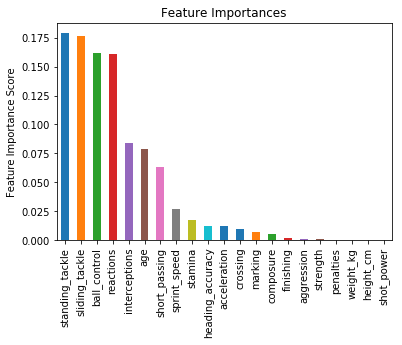

In [489]:
features = [i for i in dta2.columns if i != "Value (M)"]
target = "Value (M)"
gbm0 = GradientBoostingRegressor(random_state=7)
modelfit(gbm0, dta, features)

# Feature Ranking

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=8,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=50, min_sa...       subsample=0.8, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'n_estimators': [700, 710, 720, 730, 740]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

(<bound method BaseSearchCV.score of GridSearchCV(cv=10, error_score='raise-deprecating',
        estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='ls', max_depth=8,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=50, min_sa...       subsample=0.8, tol=0.0001, validation_fraction=0.1, verbose=0,
              warm_start=False),
        fit_params=None, iid=False, n_jobs=4,
        param_grid={'n_estimators': [700, 710, 720, 730, 740]},
        pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
        scoring='neg_mean_squared_error', verbose=0)>,
 {'n_estimators': 740},
 -1.088927946286219)


Model Report
RMSE : 0.5156
CV Score : Mean - 0.7734 | Std - 0.7005 | Min - 0.1454 | Max - 2.315


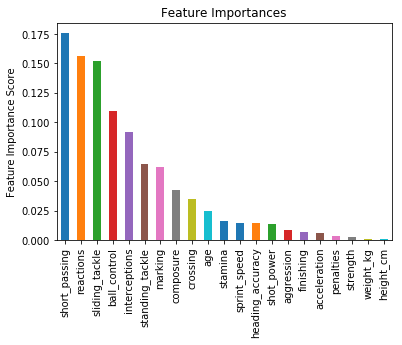

In [490]:
estimators = [x for x in range(700,750,10)]
param_test1 = {'n_estimators':estimators}
gsearch1 = GridSearchCV(estimator = GradientBoostingRegressor(learning_rate=0.1, min_samples_split=500,
                                  min_samples_leaf=50,max_depth=8,max_features='sqrt', subsample=0.8,random_state=10), 
                       param_grid = param_test1, scoring='neg_mean_squared_error',n_jobs=4,iid=False, cv=10)
gsearch1.fit(dta[features],dta["Value (M)"])

gsearch1.score, gsearch1.best_params_, gsearch1.best_score_
modelfit(gsearch1.best_estimator_, dta, features)

# New Full Back Value Model

/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


                            OLS Regression Results                            
Dep. Variable:              Value (M)   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     215.7
Date:                Mon, 26 Nov 2018   Prob (F-statistic):          1.65e-206
Time:                        20:58:54   Log-Likelihood:                -9297.1
No. Observations:                4443   AIC:                         1.861e+04
Df Residuals:                    4437   BIC:                         1.864e+04
Df Model:                           5                                         
Covariance Type:                  HC0                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.7616      0.029     59.870

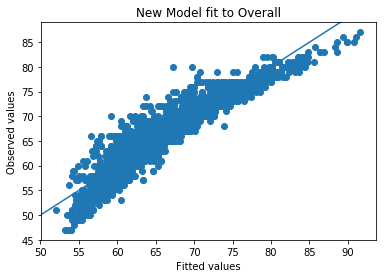

In [564]:
#MODEL CREATION
data=FB
lnVal=pd.DataFrame((data["Value (M)"]+1).apply(np.log))
lnVal.columns = ['ln_value']
fb_dta = pd.concat([lnVal, data], axis=1)
fb_dta.head()
data=fb_dta
#Create our New Model with Interaction Terms
data=fb_dta
def fb_skills_off (row):
    return row['short_passing'] * row['ball_control'] * row['crossing'] 
def fb_skills_def (row):
    return row['sliding_tackle']*row['standing_tackle']*row['marking']
def fb_ath_ment (row):
    return row['sprint_speed'] *row['stamina'] *row['composure'] *row['reactions']*row['interceptions']


def fb_phy (row):
    return row['height_cm'] * row['weight_kg']

data=fb_dta
data['fb_skills_off'] = data.apply(fb_skills_off, axis=1)
data['fb_skills_def'] = data.apply(fb_skills_def, axis=1)
data['fb_ath_ment']= data.apply(fb_ath_ment, axis=1)
data['fb_phy']= data.apply(fb_phy, axis=1)
features=['age', 'fb_skills_off', 'fb_skills_def', 'fb_ath_ment', 'fb_phy']
x=data[features]
#We must now scale the features
x =pd.DataFrame(scaler.fit_transform(x))
x.columns= ['age', 'fb_skills_off', 'fb_skills_def', 'fb_ath_ment','fb_phy']
#We have now addressed the issue of endogenity by including interaction terms
X=sm.add_constant(x)
y1=data[overall_target]
y2=data[value_target]
y3=data[ln_value]
mod=sm.OLS(y1,X)
res=mod.fit(cov_type='HC0')
yhat = res.fittedvalues
OLS_model = sm.OLS(y2,X)
OLS_results=OLS_model.fit(cov_type='HC0')
#results of new model on value
print(OLS_results.summary())
print(res.aic)
OLS_model2 = sm.OLS(y3,X)
OLS_results2=OLS_model2.fit(cov_type='HC0')
#results for new model on value elasticity
print(OLS_results2.summary())
#Plot of y-hat for y-true on the reduced model for overall rating
from statsmodels.graphics.api import abline_plot
fig, ax = plt.subplots()
ax.scatter(yhat, y1)
line_fit = sm.OLS(y1, sm.add_constant(yhat, prepend=True)).fit()
abline_plot(model_results=line_fit, ax=ax)


ax.set_title('New Model fit to Overall')
ax.set_ylabel('Observed values')
ax.set_xlabel('Fitted values');


<p style="font-family: Arial; font-size:2.750em;color:DarkRed; font-style:bold">
<br>
Position Analysis: Center Mids
</p><br>

In [508]:
data=CM
lnVal=pd.DataFrame((data["Value (M)"]+1).apply(np.log))
lnVal.columns = ['ln_value']
cm_dta = pd.concat([lnVal, data], axis=1)
cm_dta.head()
data=cm_dta
x=data[attribute_profile]
X=sm.add_constant(x)
y1=data[overall_target]
y2=data[value_target]
y3=data[ln_value]
#OLS for Overall
OLS_model = sm.OLS(y1,X)
OLS_results=OLS_model.fit(cov_type='HC0')
print("The R-squared for the attributes with overall is:" ,OLS_results.rsquared_adj)
OLS_model2 = sm.OLS(y2,X)
OLS_results2=OLS_model2.fit(cov_type='HC0')
print("\n\nThe adjusted R-squared for the original CB value model is:" ,OLS_results2.rsquared_adj)
print("\nThe model AIC is: " ,OLS_results2.aic)

ln_value      ID          Name  Overall  Potential  Value (M)  \
0  4.382027  182521      T. Kroos       90         90       79.0   
1  4.060443  177003     L. Modrić       89         89       57.0   
2  4.430817  192985  K. De Bruyne       89         92       83.0   
3  4.269697  189509        Thiago       88         90       70.5   
4  3.901973  168651    I. Rakitić       87         87       48.5   

               club  age  height_cm  weight_kg         ...          \
0    Real Madrid CF   27        182         78         ...           
1    Real Madrid CF   31        174         65         ...           
2   Manchester City   26        181         68         ...           
3  FC Bayern Munich   26        174         70         ...           
4      FC Barcelona   29        184         78         ...           

   gk_reflexes  foot_Left  foot_Right  international_reputation  \
0           10          0           1                         4   
1            9          0           1                         4   
2           13          0           1                         4   
3           13          0           1                         3   
4            9          0           1                         4   

   att_rate_High  att_rate_Low  att_rate_Medium  defend_rate_High  \
0              0             0                1                 0   
1              1             0                0                 0   
2              1             0                0                 1   
3              0             0                1                 0   
4              0             0                1                 0   

   defend_rate_Low  defend_rate_Medium  
0                0                   1  
1                0                   1  
2                0                   0  
3                0                   1  
4                0                   1  

[5 rows x 54 columns]

The R-squared for the attributes with overall is: 0.8953641207295303


The adjusted R-squared for the original CB value model is: 0.46045033958288306

The model AIC is:  48960.15443371765


In [509]:
#Lasso Regression
X_train,X_test,y_train,y_test=train_test_split(x,y1,test_size=0.3,random_state=0)
lr = LinearRegression()
lr.fit(X_train, y_train)

#Lasso Fit (Overall)
lasso = Lasso(alpha=1.0, max_iter=1000000).fit(X_train, y_train)

from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
X_std = scaler.fit_transform(x)
regr_cv = LassoCV(alphas=np.arange(1,9999.999))
# Fit the linear regression
model_cv = regr_cv.fit(X_std, y1)
print("The alpha we should use for lasso regression is:" ,model_cv.alpha_)
lasso = Lasso(alpha=1.0, max_iter=1000000).fit(X_train, y_train)
#Lasso Coefficients 
y_prediction = lasso.predict(X_test)
lasso_coef=lasso.coef_
cols=np.array(x.columns)
cols=cols.reshape(37,1)
lasso_coef=lasso_coef.reshape(37,1)
coefs=np.concatenate((cols, lasso_coef), axis=1)
coefs=pd.DataFrame(coefs)
intercept=lasso.intercept_
print("the intercept is:" ,intercept)
print(coefs)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warni

The alpha we should use for lasso regression is: 1.0
the intercept is: [6.91522968]
                     0           1
0                  age           0
1            height_cm          -0
2            weight_kg           0
3             crossing   0.0204125
4            finishing  0.00998851
5     heading_accuracy   0.0431929
6        short_passing    0.194018
7              volleys          -0
8            dribbling  0.00547681
9                curve           0
10  free_kick_accuracy           0
11        long_passing           0
12        ball_control    0.203133
13        acceleration   0.0261684
14        sprint_speed   0.0111252
15             agility           0
16           reactions    0.200533
17             balance          -0
18          shot_power           0
19             jumping           0
20             stamina   0.0376082
21            strength   0.0314665
22          long_shots   0.0207321
23          aggression  0.00614993
24       interceptions   0.0108572
25    

# Pearson Correlation of CM Features

<Figure size 936x936 with 0 Axes>

Text(0.5, 1.05, 'Pearson correlation of used Features with Targets')

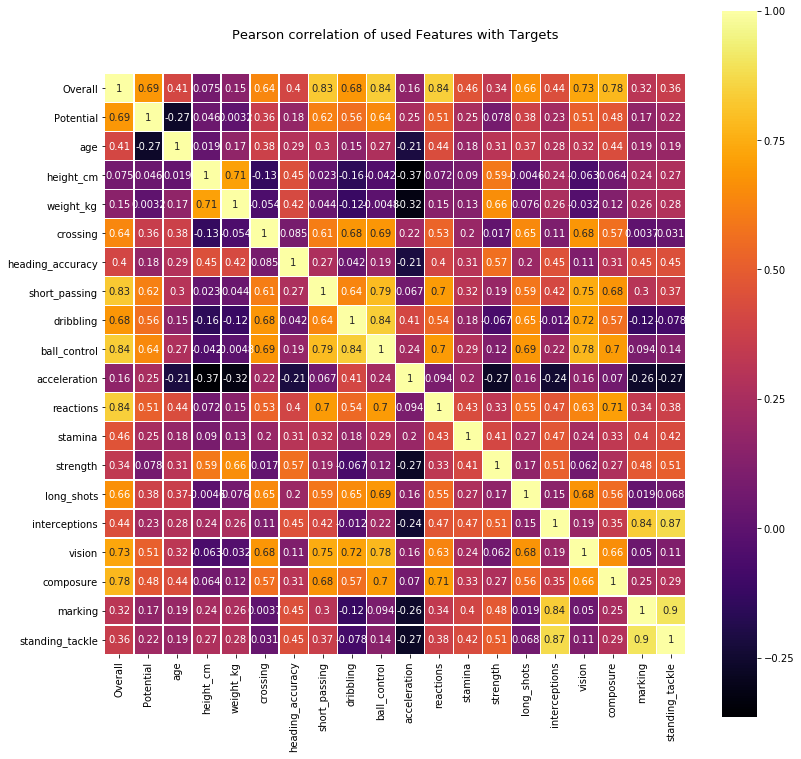

In [510]:
used_variables =['Overall','Potential','age', 'height_cm', 'weight_kg', 'crossing', 'heading_accuracy',
       'short_passing', 'dribbling', 
        'ball_control', 'acceleration',
        'reactions',  'stamina',
       'strength', 'long_shots',  'interceptions',
       'vision',  'composure', 'marking', 'standing_tackle']
corr_variables = data[used_variables]
colormap = plt.cm.inferno
plt.figure(figsize=(13,13))
plt.title('Pearson correlation of used Features with Targets', 
          y=1.05, size=13)
sns.heatmap(corr_variables.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [512]:
features=lasso.coef_
indices=np.nonzero(features)
np.take(features, indices)
cm_features_used=['age', 'height_cm', 'weight_kg', 'crossing', 'heading_accuracy',
       'short_passing', 'dribbling', 
        'ball_control', 'acceleration',
        'reactions',  'stamina',
       'strength', 'long_shots',  'interceptions',
       'vision',  'composure', 'marking', 'standing_tackle']
#Finding the best alpha for ridge regression for value
x=data[cm_features_used]
y2=data[value_target]

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
scaler = StandardScaler()
X_std = scaler.fit_transform(x)
regr_cv = RidgeCV(alphas=np.arange(0.001,9999.999))
# Fit the linear regression
model_cv = regr_cv.fit(X_std, y2)
model_cv.alpha_
print("The alpha we should use for ridge regression is:" ,model_cv.alpha_)
x.shape

array([[0.02041246, 0.00998851, 0.04319294, 0.19401826, 0.00547681,
        0.20313274, 0.0261684 , 0.01112518, 0.20053299, 0.03760819,
        0.03146648, 0.0207321 , 0.00614993, 0.01085724, 0.00419401,
        0.00809233, 0.09153333, 0.00131498, 0.00335376]])

/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


55.00099999999999

The alpha we should use for ridge regression is: 55.00099999999999


(8471, 18)

In [513]:
#Fitting ridge regression to the reduced model
#Note we use the suggested alpha of 55.01
X_train,X_test,y_train,y_test=train_test_split(x,y2,test_size=0.3,random_state=0)
lr = LinearRegression()
lr.fit(X_train, y_train)
#Ridge fit: Finding out what alpha to use for ridge
ridge = Ridge(alpha=55.01)
ridge.fit(X_train, y_train)
y_prediction = ridge.predict(X_test)
ridge_coef=ridge.coef_
cols=np.array(x.columns)
ridge_coef=ridge.coef_
cols=np.array(x.columns)
cols=cols.reshape(18,1)
ridge_coef=ridge_coef.reshape(18,1)
ridge_coefs=np.concatenate((cols, ridge_coef), axis=1)
ridge_coefs=pd.DataFrame(ridge_coefs)
ridge_intercept=ridge.intercept_
print(ridge_intercept)
print(ridge_coefs)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Ridge(alpha=55.01, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

[-29.44659204]
                   0           1
0                age   -0.315486
1          height_cm  -0.0191657
2          weight_kg   0.0294251
3           crossing  0.00663918
4   heading_accuracy   0.0253147
5      short_passing    0.210048
6          dribbling   0.0276017
7       ball_control   0.0747416
8       acceleration   0.0244876
9          reactions    0.188915
10           stamina    0.013117
11          strength   0.0143285
12        long_shots  -0.0167068
13     interceptions  0.00766452
14            vision  0.00727878
15         composure   0.0688174
16           marking  -0.0525116
17   standing_tackle    0.025667


In [514]:
#Model Evaluation for Value
X_train,X_test,y_train,y_test=train_test_split(x,y2,test_size=0.3,random_state=0)
Ridge_train_score = ridge.score(X_train,y_train)
Ridge_test_score = ridge.score(X_test, y_test)
y_prediction = ridge.predict(X_test)
print("The training and test scores respectively are: " ,Ridge_train_score, "and" ,Ridge_test_score)
from math import sqrt
from sklearn.metrics import mean_squared_error
RMSE_test=sqrt(mean_squared_error(y_true=y_test,y_pred=y_prediction))
print("\n Root Mean Square Error of test set is:" ,RMSE_test)
from sklearn import metrics
from sklearn.model_selection import cross_val_score
scores=cross_val_score(ridge,X,y2,cv=5)
print("\n K-folds cross validation scores:" ,scores)

The training and test scores respectively are:  0.45178550541072693 and 0.4611055075784981

 Root Mean Square Error of test set is: 4.372830190504617

 K-folds cross validation scores: [  0.42382554 -81.09512036   0.44096329   0.45005531  -8.69297798]


In [514]:
#GBT
#Gradient Boosting Regression


cm_reduced=['Value (M)','age', 'height_cm', 'weight_kg', 'crossing', 'heading_accuracy',
       'short_passing', 'dribbling', 
        'ball_control', 'acceleration',
        'reactions',  'stamina',
       'strength', 'long_shots',  'interceptions',
       'vision',  'composure', 'marking', 'standing_tackle']

def modelfit(alg, dtrain, features, performCV=True, printFeatureImportance=True, cv_folds=10):
    #Fit the algorithm on the data
    
    alg.fit(dtrain[features],dtrain["Value (M)"] )
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[features])

    #Perform cross-validation:
    cv_score =  cross_val_score(alg, dtrain[features], dtrain["Value (M)"], cv=cv_folds,
                                                scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print ("\nModel Report")
    print ("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(dtrain["Value (M)"], dtrain_predictions)))
    print ("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),
                                                                             np.std(cv_score),np.min(cv_score),
                                                                              np.max(cv_score)))
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, features).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')
        

dta=data[cm_reduced]
dta.head()


Value (M)  age  height_cm  weight_kg  crossing  heading_accuracy  \
0       79.0   27        182         78        85                54   
1       57.0   31        174         65        78                55   
2       83.0   26        181         68        90                53   
3       70.5   26        174         70        72                58   
4       48.5   29        184         78        81                58   

   short_passing  dribbling  ball_control  acceleration  reactions  stamina  \
0             90         79            89            60         86       77   
1             92         86            92            75         88       82   
2             90         85            87            76         88       87   
3             91         90            92            77         84       75   
4             87         84            87            67         79       76   

   strength  long_shots  interceptions  vision  composure  marking  \
0        74          90             85      88         85       63   
1        58          82             76      90         84       66   
2        73          86             56      90         84       30   
3        59          82             78      86         83       49   
4        63          88             69      87         81       52   

   standing_tackle  
0               82  
1               80  
2               51  
3               64  
4               65


Model Report
RMSE : 1.03
CV Score : Mean - 1.111 | Std - 0.8587 | Min - 0.2661 | Max - 2.905


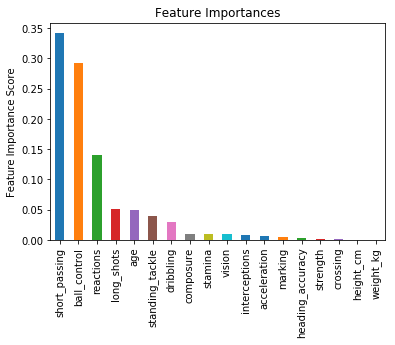

In [515]:
features = [i for i in dta.columns if i != "Value (M)"]
target = "Value (M)"
gbm0 = GradientBoostingRegressor(random_state=7)
modelfit(gbm0, dta, features)

# CM Feature Ranking

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=8,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=50, min_sa...       subsample=0.8, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'n_estimators': [700, 710, 720, 730, 740]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

(<bound method BaseSearchCV.score of GridSearchCV(cv=10, error_score='raise-deprecating',
        estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='ls', max_depth=8,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=50, min_sa...       subsample=0.8, tol=0.0001, validation_fraction=0.1, verbose=0,
              warm_start=False),
        fit_params=None, iid=False, n_jobs=4,
        param_grid={'n_estimators': [700, 710, 720, 730, 740]},
        pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
        scoring='neg_mean_squared_error', verbose=0)>,
 {'n_estimators': 740},
 -2.372786498292478)


Model Report
RMSE : 0.889
CV Score : Mean - 1.118 | Std - 1.06 | Min - 0.1824 | Max - 3.193


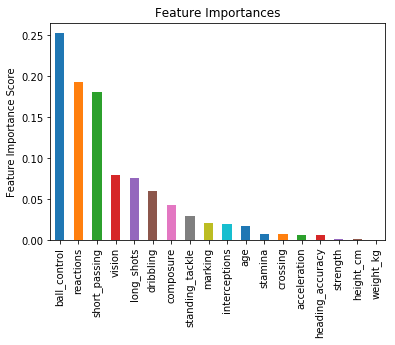

In [516]:
estimators = [x for x in range(700,750,10)]
param_test1 = {'n_estimators':estimators}
gsearch1 = GridSearchCV(estimator = GradientBoostingRegressor(learning_rate=0.1, min_samples_split=500,
                                  min_samples_leaf=50,max_depth=8,max_features='sqrt', subsample=0.8,random_state=10), 
                       param_grid = param_test1, scoring='neg_mean_squared_error',n_jobs=4,iid=False, cv=10)
gsearch1.fit(dta[features],dta["Value (M)"])

gsearch1.score, gsearch1.best_params_, gsearch1.best_score_
modelfit(gsearch1.best_estimator_, dta, features)


# New Center Mid Value Model

/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


                            OLS Regression Results                            
Dep. Variable:              Value (M)   R-squared:                       0.578
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     337.8
Date:                Mon, 26 Nov 2018   Prob (F-statistic):               0.00
Time:                        20:58:28   Log-Likelihood:                -23419.
No. Observations:                8471   AIC:                         4.685e+04
Df Residuals:                    8465   BIC:                         4.689e+04
Df Model:                           5                                         
Covariance Type:                  HC0                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.9211      0.042     70.004

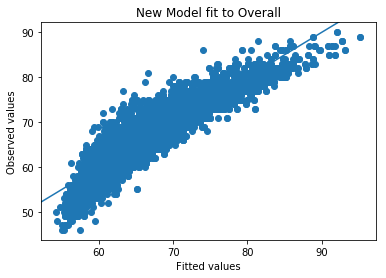

In [563]:
#MODEL CREATION

#Create our New Model with Interaction Terms
data=CM
lnVal=pd.DataFrame((data["Value (M)"]+1).apply(np.log))
lnVal.columns = ['ln_value']
cm_dta = pd.concat([lnVal, data], axis=1)
cm_dta.head()
data=cm_dta
def cm_skills_off (row):
    return row['short_passing'] * row['ball_control'] * row['long_shots'] *row['dribbling'] 
def cm_skills_def (row):
    return row['standing_tackle']*row['marking']
def cm_ath_ment (row):
    return row['stamina'] * row['acceleration'] *row['composure'] *row['reactions'] * row['interceptions'] *row['vision']



def cm_phy (row):
    return row['height_cm'] * row['weight_kg']


data['cm_skills_off'] = data.apply(cm_skills_off, axis=1)
data['cm_skills_def'] = data.apply(cm_skills_def, axis=1)
data['cm_ath_ment']= data.apply(cm_ath_ment, axis=1)
data['cm_phy']= data.apply(cm_phy, axis=1)

features=['age', 'cm_skills_off', 'cm_skills_def', 'cm_ath_ment', 'cm_phy']
x=data[features]
#We must now scale the features
x =pd.DataFrame(scaler.fit_transform(x))
x.columns= ['age', 'cm_skills_off', 'cm_skills_def', 'cm_ath_ment', 'cm_phy']
#We have now addressed the issue of endogenity by including interaction terms
X=sm.add_constant(x)
y1=data[overall_target]
y2=data[value_target]
y3=data[ln_value]
mod=sm.OLS(y1,X)
res=mod.fit(cov_type='HC0')
yhat = res.fittedvalues
OLS_model = sm.OLS(y2,X)
OLS_results=OLS_model.fit(cov_type='HC0')
#results of new model on value
print(OLS_results.summary())
OLS_model2 = sm.OLS(y3,X)
OLS_results2=OLS_model2.fit(cov_type='HC0')
#results for new model on value elasticity
print(OLS_results2.summary())
print(res.aic)
#Plot of y-hat for y-true on the reduced model for overall rating
from statsmodels.graphics.api import abline_plot
fig, ax = plt.subplots()
ax.scatter(yhat, y1)
line_fit = sm.OLS(y1, sm.add_constant(yhat, prepend=True)).fit()
abline_plot(model_results=line_fit, ax=ax)


ax.set_title('New Model fit to Overall')
ax.set_ylabel('Observed values')
ax.set_xlabel('Fitted values');

<p style="font-family: Arial; font-size:2.750em;color:DarkRed; font-style:bold">
<br>
Position Analysis: Wingers
</p><br>

In [515]:
data=W
lnVal=pd.DataFrame((data["Value (M)"]+1).apply(np.log))
lnVal.columns = ['ln_value']
W_dta = pd.concat([lnVal, data], axis=1)
W_dta.head()
data=W_dta
x=data[attribute_profile]
X=sm.add_constant(x)
y1=data[overall_target]
y2=data[value_target]
y3=data[ln_value]
#OLS for Overall
OLS_model = sm.OLS(y1,X)
OLS_results=OLS_model.fit(cov_type='HC0')
print("The R-squared for the attributes with overall is:" ,OLS_results.rsquared_adj)
OLS_model2 = sm.OLS(y2,X)
OLS_results2=OLS_model2.fit(cov_type='HC0')
print("\n\nThe adjusted R-squared for the original CB value model is:" ,OLS_results2.rsquared_adj)
print("\nThe model AIC is: " ,OLS_results2.aic)

ln_value      ID          Name  Overall  Potential  Value (M)  \
0  4.663439  158023      L. Messi       93         93      105.0   
1  4.255613  173731       G. Bale       89         89       69.5   
2  3.610918    9014     A. Robben       88         88       36.0   
3  4.330733  194765  A. Griezmann       88         91       75.0   
4  4.110874  176635       M. Özil       88         88       60.0   

               club  age  height_cm  weight_kg         ...          \
0      FC Barcelona   30        170         72         ...           
1    Real Madrid CF   27        183         74         ...           
2  FC Bayern Munich   33        180         80         ...           
3   Atlético Madrid   26        174         72         ...           
4           Arsenal   28        180         76         ...           

   gk_reflexes  foot_Left  foot_Right  international_reputation  \
0            8          1           0                         5   
1            6          1           0                         4   
2           15          1           0                         4   
3           14          1           0                         4   
4           14          1           0                         4   

   att_rate_High  att_rate_Low  att_rate_Medium  defend_rate_High  \
0              0             0                1                 0   
1              1             0                0                 0   
2              1             0                0                 0   
3              1             0                0                 0   
4              0             0                1                 0   

   defend_rate_Low  defend_rate_Medium  
0                0                   1  
1                0                   1  
2                1                   0  
3                0                   1  
4                1                   0  

[5 rows x 54 columns]

The R-squared for the attributes with overall is: 0.9482678210525392


The adjusted R-squared for the original CB value model is: 0.4663801039643096

The model AIC is:  39714.73444436689


In [516]:
#Lasso Regression
X_train,X_test,y_train,y_test=train_test_split(x,y1,test_size=0.3,random_state=0)
lr = LinearRegression()
lr.fit(X_train, y_train)

#Lasso Fit (Overall)
lasso = Lasso(alpha=1.0, max_iter=1000000).fit(X_train, y_train)

from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
X_std = scaler.fit_transform(x)
regr_cv = LassoCV(alphas=np.arange(1,9999.999))
# Fit the linear regression
model_cv = regr_cv.fit(X_std, y1)
print("The alpha we should use for lasso regression is:" ,model_cv.alpha_)
lasso = Lasso(alpha=1.0, max_iter=1000000).fit(X_train, y_train)
#Lasso Coefficients 
y_prediction = lasso.predict(X_test)
lasso_coef=lasso.coef_
cols=np.array(x.columns)
cols=cols.reshape(37,1)
lasso_coef=lasso_coef.reshape(37,1)
coefs=np.concatenate((cols, lasso_coef), axis=1)
coefs=pd.DataFrame(coefs)
intercept=lasso.intercept_
print("the intercept is:" ,intercept)
print(coefs)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warni

The alpha we should use for lasso regression is: 1.0
the intercept is: [5.93441979]
                     0            1
0                  age            0
1            height_cm            0
2            weight_kg            0
3             crossing    0.0800667
4            finishing    0.0207548
5     heading_accuracy    0.0299778
6        short_passing     0.127622
7              volleys            0
8            dribbling     0.113739
9                curve            0
10  free_kick_accuracy            0
11        long_passing   0.00250001
12        ball_control     0.175502
13        acceleration    0.0511156
14        sprint_speed    0.0377649
15             agility            0
16           reactions     0.125395
17             balance            0
18          shot_power            0
19             jumping   0.00194869
20             stamina    0.0354372
21            strength   0.00806433
22          long_shots    0.0121247
23          aggression   0.00117876
24       interce

# Pearson Correlation of Winger Features

<Figure size 936x936 with 0 Axes>

Text(0.5, 1.05, 'Pearson correlation of used Features with Targets')

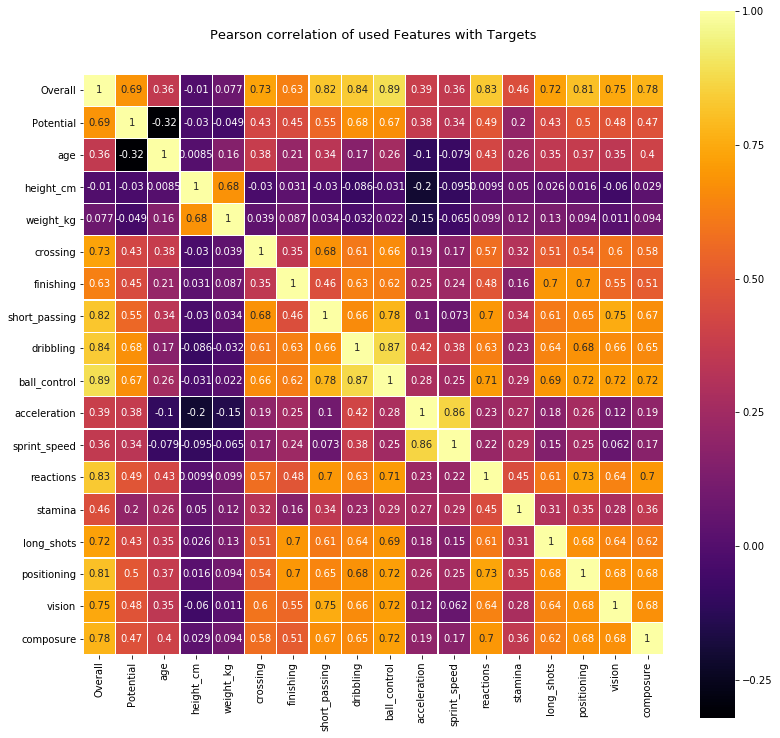

In [517]:
used_variables = ['Overall','Potential','age', 'height_cm', 'weight_kg', 'crossing', 'finishing',
       'short_passing', 'dribbling', 'ball_control', 'acceleration', 'sprint_speed',
       'reactions',  'stamina',
       'long_shots', 'positioning',
       'vision',  'composure']
corr_variables = data[used_variables]
colormap = plt.cm.inferno
plt.figure(figsize=(13,13))
plt.title('Pearson correlation of used Features with Targets', 
          y=1.05, size=13)
sns.heatmap(corr_variables.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)


In [518]:
features=lasso.coef_
indices=np.nonzero(features)
np.take(features, indices)
w_features_used=['age', 'height_cm', 'weight_kg', 'crossing', 'finishing',
       'short_passing', 'dribbling', 'ball_control', 'acceleration', 'sprint_speed',
       'reactions',  'stamina',
       'long_shots', 'positioning',
       'vision',  'composure']
#Finding the best alpha for ridge regression for value
x=data[w_features_used]
y2=data[value_target]

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
scaler = StandardScaler()
X_std = scaler.fit_transform(x)
regr_cv = RidgeCV(alphas=np.arange(0.001,9999.999))
# Fit the linear regression
model_cv = regr_cv.fit(X_std, y2)
model_cv.alpha_
print("The alpha we should use for ridge regression is:" ,model_cv.alpha_)
x.shape

array([[8.00666953e-02, 2.07547591e-02, 2.99778029e-02, 1.27622375e-01,
        1.13738671e-01, 2.50001130e-03, 1.75502420e-01, 5.11155599e-02,
        3.77649071e-02, 1.25394551e-01, 1.94868733e-03, 3.54371854e-02,
        8.06433388e-03, 1.21246975e-02, 1.17875974e-03, 2.55774399e-03,
        5.83953203e-02, 1.51737182e-02, 6.29393383e-03, 3.16954496e-02,
        8.01610996e-05, 7.33574595e-04]])

/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


79.00099999999999

The alpha we should use for ridge regression is: 79.00099999999999


(6685, 16)

In [519]:
#Fitting ridge regression to the reduced model
#Note we use the suggested alpha of 79.01
X_train,X_test,y_train,y_test=train_test_split(x,y2,test_size=0.3,random_state=0)
lr = LinearRegression()
lr.fit(X_train, y_train)
#Ridge fit: Finding out what alpha to use for ridge
ridge = Ridge(alpha=79.01)
ridge.fit(X_train, y_train)
y_prediction = ridge.predict(X_test)
ridge_coef=ridge.coef_
cols=np.array(x.columns)
ridge_coef=ridge.coef_
cols=np.array(x.columns)
cols=cols.reshape(16,1)
ridge_coef=ridge_coef.reshape(16,1)
ridge_coefs=np.concatenate((cols, ridge_coef), axis=1)
ridge_coefs=pd.DataFrame(ridge_coefs)
ridge_intercept=ridge.intercept_
print(ridge_intercept)
print(ridge_coefs)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Ridge(alpha=79.01, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

[-37.96628836]
                0          1
0             age  -0.338955
1       height_cm  0.0354684
2       weight_kg -0.0150212
3        crossing  0.0405286
4       finishing  0.0567221
5   short_passing  0.0972522
6       dribbling  0.0548051
7    ball_control    0.12961
8    acceleration  0.0501735
9    sprint_speed -0.0163293
10      reactions   0.141411
11        stamina  0.0124369
12     long_shots -0.0305993
13    positioning  0.0484458
14         vision  0.0315826
15      composure   0.065729


In [520]:
#Model Evaluation for Value
X_train,X_test,y_train,y_test=train_test_split(x,y2,test_size=0.3,random_state=0)
Ridge_train_score = ridge.score(X_train,y_train)
Ridge_test_score = ridge.score(X_test, y_test)
y_prediction = ridge.predict(X_test)
print("The training and test scores respectively are: " ,Ridge_train_score, "and" ,Ridge_test_score)
from math import sqrt
from sklearn.metrics import mean_squared_error
RMSE_test=sqrt(mean_squared_error(y_true=y_test,y_pred=y_prediction))
print("\n Root Mean Square Error of test set is:" ,RMSE_test)
from sklearn import metrics
from sklearn.model_selection import cross_val_score
scores=cross_val_score(ridge,X,y2,cv=5)
print("\n K-folds cross validation scores:" ,scores)

The training and test scores respectively are:  0.44352486274701625 and 0.5149970405114312

 Root Mean Square Error of test set is: 4.00026697162954

 K-folds cross validation scores: [  0.43742721  -8.6296417    0.50575815 -11.95888424   0.35889686]


In [531]:
#GBT
#Gradient Boosting Regression


w_reduced=['Value (M)', 'age', 'height_cm', 'weight_kg', 'crossing', 'finishing',
       'short_passing', 'dribbling', 'ball_control', 'acceleration', 'sprint_speed',
       'reactions',  'stamina',
       'long_shots', 'positioning',
       'vision',  'composure']

def modelfit(alg, dtrain, features, performCV=True, printFeatureImportance=True, cv_folds=10):
    #Fit the algorithm on the data
    
    alg.fit(dtrain[features],dtrain["Value (M)"] )
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[features])

    #Perform cross-validation:
    cv_score =  cross_val_score(alg, dtrain[features], dtrain["Value (M)"], cv=cv_folds,
                                                scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print ("\nModel Report")
    print ("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(dtrain["Value (M)"], dtrain_predictions)))
    print ("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),
                                                                             np.std(cv_score),np.min(cv_score),
                                                                              np.max(cv_score)))
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, features).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')
        

dta=data[w_reduced]
dta.head()

Value (M)  age  height_cm  weight_kg  crossing  finishing  short_passing  \
0      105.0   30        170         72        77         95             88   
1       69.5   27        183         74        87         87             85   
2       36.0   33        180         80        80         85             84   
3       75.0   26        174         72        82         88             79   
4       60.0   28        180         76        82         74             89   

   dribbling  ball_control  acceleration  sprint_speed  reactions  stamina  \
0         97            95            92            87         95       73   
1         87            86            93            95         87       76   
2         92            89            87            86         87       68   
3         87            86            87            86         90       76   
4         86            90            75            68         87       69   

   long_shots  positioning  vision  composure  
0          88           93      90         96  
1          90           86      79         85  
2          88           85      83         86  
3          82           91      76         86  
4          76           83      92         78


Model Report
RMSE : 0.9378
CV Score : Mean - 1.408 | Std - 0.8006 | Min - 0.3983 | Max - 2.681


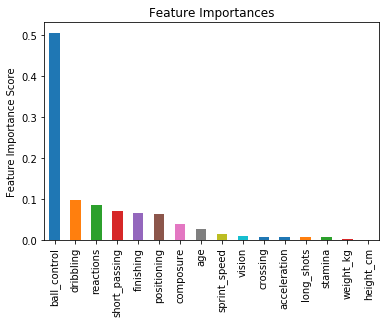

In [532]:
features = [i for i in dta.columns if i != "Value (M)"]
target = "Value (M)"
gbm0 = GradientBoostingRegressor(random_state=7)
modelfit(gbm0, dta, features)

# Ranked Features for Wingers

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=8,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=50, min_sa...       subsample=0.8, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'n_estimators': [700, 710, 720, 730, 740]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

(<bound method BaseSearchCV.score of GridSearchCV(cv=10, error_score='raise-deprecating',
        estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='ls', max_depth=8,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=50, min_sa...       subsample=0.8, tol=0.0001, validation_fraction=0.1, verbose=0,
              warm_start=False),
        fit_params=None, iid=False, n_jobs=4,
        param_grid={'n_estimators': [700, 710, 720, 730, 740]},
        pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
        scoring='neg_mean_squared_error', verbose=0)>,
 {'n_estimators': 740},
 -3.4767927712485758)


Model Report
RMSE : 1.151
CV Score : Mean - 1.456 | Std - 1.165 | Min - 0.2721 | Max - 3.746


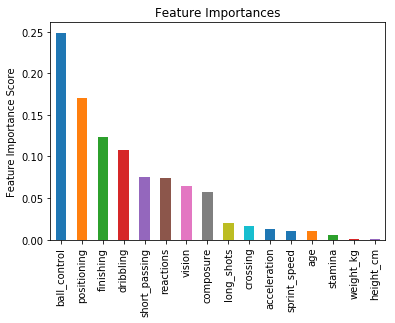

In [533]:
estimators = [x for x in range(700,750,10)]
param_test1 = {'n_estimators':estimators}
gsearch1 = GridSearchCV(estimator = GradientBoostingRegressor(learning_rate=0.1, min_samples_split=500,
                                  min_samples_leaf=50,max_depth=8,max_features='sqrt', subsample=0.8,random_state=10), 
                       param_grid = param_test1, scoring='neg_mean_squared_error',n_jobs=4,iid=False, cv=10)
gsearch1.fit(dta[features],dta["Value (M)"])

gsearch1.score, gsearch1.best_params_, gsearch1.best_score_
modelfit(gsearch1.best_estimator_, dta, features)

# New Winger Value Model

/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


                            OLS Regression Results                            
Dep. Variable:              Value (M)   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     240.9
Date:                Mon, 26 Nov 2018   Prob (F-statistic):          3.06e-237
Time:                        20:58:00   Log-Likelihood:                -18863.
No. Observations:                6685   AIC:                         3.774e+04
Df Residuals:                    6679   BIC:                         3.778e+04
Df Model:                           5                                         
Covariance Type:                  HC0                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            3.1022      0.050     62.372   

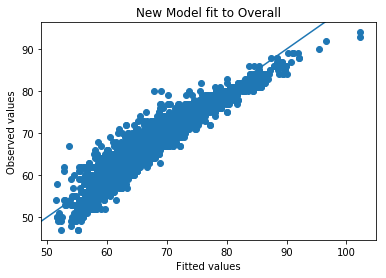

In [562]:
#MODEL CREATION

#Create our New Model with Interaction Terms

def w_skills (row):
    return row['short_passing'] * row['ball_control']  *row['dribbling'] 
def w_skills_off (row):
    return row['positioning']*row['finishing']
def w_ath_ment (row):
    return row['stamina'] * row['acceleration'] *row['sprint_speed']*row['composure'] *row['reactions'] * row['vision']

#def w_mentality (row):
    #return row['composure'] *row['reactions'] * row['vision']

def w_phy (row):
    return row['height_cm'] * row['weight_kg']


data['w_skills'] = data.apply(w_skills, axis=1)
data['w_skills_off'] = data.apply(w_skills_off, axis=1)
data['w_ath_ment']= data.apply(w_ath_ment, axis=1)
#data['w_mentality']= data.apply(w_ath, axis=1)
data['w_phy']= data.apply(w_phy, axis=1)
features=['age', 'w_skills', 'w_skills_off', 'w_ath_ment',  'w_phy']
x=data[features]
#We must now scale the features
x =pd.DataFrame(scaler.fit_transform(x))
x.columns=['age', 'w_skills', 'w_skills_off', 'w_ath_ment', 'w_phy']
#We have now addressed the issue of endogenity by including interaction terms
X=sm.add_constant(x)
y1=data[overall_target]
y2=data[value_target]
y3=data[ln_value]
mod=sm.OLS(y1,X)
res=mod.fit(cov_type='HC0')
yhat = res.fittedvalues
OLS_model = sm.OLS(y2,X)
OLS_results=OLS_model.fit(cov_type='HC0')
#results of new model on value
print(OLS_results.summary())
OLS_model2 = sm.OLS(y3,X)
OLS_results2=OLS_model2.fit(cov_type='HC0')
#results for new model on value elasticity
print(OLS_results2.summary())
print(res.aic)
#Plot of y-hat for y-true on the reduced model for overall rating
from statsmodels.graphics.api import abline_plot
fig, ax = plt.subplots()
ax.scatter(yhat, y1)
line_fit = sm.OLS(y1, sm.add_constant(yhat, prepend=True)).fit()
abline_plot(model_results=line_fit, ax=ax)


ax.set_title('New Model fit to Overall')
ax.set_ylabel('Observed values')
ax.set_xlabel('Fitted values');

<p style="font-family: Arial; font-size:2.750em;color:DarkRed; font-style:bold">
<br>
Position Analysis: Forwards
</p><br>

In [521]:
data=F
lnVal=pd.DataFrame((data["Value (M)"]+1).apply(np.log))
lnVal.columns = ['ln_value']
f_dta = pd.concat([lnVal, data], axis=1)
f_dta.head()
data=f_dta
x=data[attribute_profile]
X=sm.add_constant(x)
y1=data[overall_target]
y2=data[value_target]
y3=data[ln_value]
#OLS for Overall
OLS_model = sm.OLS(y1,X)
OLS_results=OLS_model.fit(cov_type='HC0')
print("The R-squared for the attributes with overall is:" ,OLS_results.rsquared_adj)
OLS_model2 = sm.OLS(y2,X)
OLS_results2=OLS_model2.fit(cov_type='HC0')
print("\n\nThe adjusted R-squared for the original CB value model is:" ,OLS_results2.rsquared_adj)
print("\nThe model AIC is: " ,OLS_results2.aic)

ln_value      ID               Name  Overall  Potential  Value (M)  \
0  4.569543   20801  Cristiano Ronaldo       94         94       95.5   
1  4.663439  158023           L. Messi       93         93      105.0   
2  4.584967  176580          L. Suárez       92         92       97.0   
3  4.532599  188545     R. Lewandowski       91         91       92.0   
4  4.356709  167664         G. Higuaín       90         90       77.0   

               club  age  height_cm  weight_kg         ...          \
0    Real Madrid CF   32        185         80         ...           
1      FC Barcelona   30        170         72         ...           
2      FC Barcelona   30        182         86         ...           
3  FC Bayern Munich   28        185         79         ...           
4          Juventus   29        184         87         ...           

   gk_reflexes  foot_Left  foot_Right  international_reputation  \
0           11          0           1                         5   
1            8          1           0                         5   
2           37          0           1                         5   
3           10          0           1                         4   
4           10          0           1                         4   

   att_rate_High  att_rate_Low  att_rate_Medium  defend_rate_High  \
0              1             0                0                 0   
1              0             0                1                 0   
2              1             0                0                 0   
3              1             0                0                 0   
4              1             0                0                 0   

   defend_rate_Low  defend_rate_Medium  
0                1                   0  
1                0                   1  
2                0                   1  
3                0                   1  
4                0                   1  

[5 rows x 54 columns]

The R-squared for the attributes with overall is: 0.9688747358983668


The adjusted R-squared for the original CB value model is: 0.4357079026258578

The model AIC is:  21638.390672754944


In [522]:
#Lasso Regression
from sklearn.linear_model import LinearRegression
X_train,X_test,y_train,y_test=train_test_split(x,y1,test_size=0.3,random_state=0)
lr = LinearRegression()
lr.fit(X_train, y_train)

#Lasso Fit (Overall)
lasso = Lasso(alpha=1.0, max_iter=1000000).fit(X_train, y_train)


from sklearn.linear_model import LassoCV

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std=scaler.fit_transform(X)
regr_cv = LassoCV(alphas=np.arange(1,9999.999))
# Fit the linear regression
model_cv = regr_cv.fit(X_std, y1)
print("The alpha we should use for lasso regression is:" ,model_cv.alpha_)
lasso = Lasso(alpha=1.0, max_iter=1000000).fit(X_train, y_train)
#Lasso Coefficients 
y_prediction = lasso.predict(X_test)
lasso_coef=lasso.coef_
cols=np.array(x.columns)
cols=cols.reshape(37,1)
lasso_coef=lasso_coef.reshape(37,1)
coefs=np.concatenate((cols, lasso_coef), axis=1)
coefs=pd.DataFrame(coefs)
intercept=lasso.intercept_
print("the intercept is:" ,intercept)
print(coefs)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in ver

The alpha we should use for lasso regression is: 1.0
the intercept is: [5.85079122]
                     0            1
0                  age            0
1            height_cm            0
2            weight_kg            0
3             crossing   0.00477795
4            finishing     0.113041
5     heading_accuracy    0.0426845
6        short_passing    0.0806355
7              volleys   0.00835998
8            dribbling     0.058005
9                curve   0.00328322
10  free_kick_accuracy   0.00273747
11        long_passing  0.000808266
12        ball_control     0.154566
13        acceleration    0.0246743
14        sprint_speed    0.0358264
15             agility            0
16           reactions    0.0884776
17             balance           -0
18          shot_power    0.0846525
19             jumping            0
20             stamina   0.00624438
21            strength    0.0321246
22          long_shots    0.0197307
23          aggression   0.00271808
24       interce

# Pearson Correlation of Forward Features

<Figure size 1008x1008 with 0 Axes>

Text(0.5, 1.05, 'Pearson correlation of used Features with Targets')

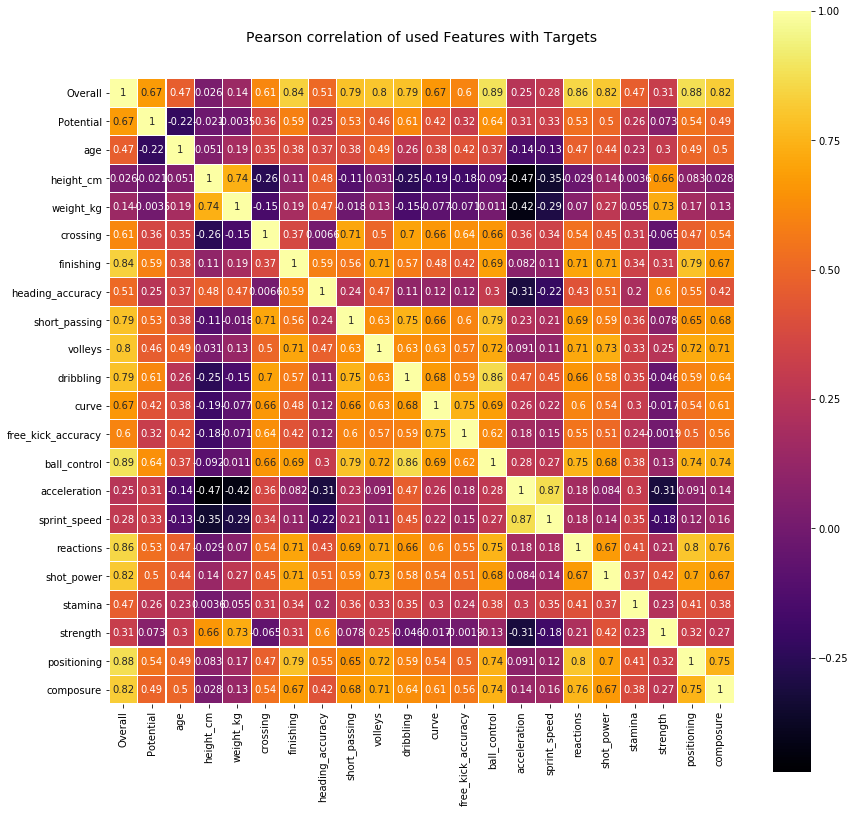

In [41]:
used_variables = ['Overall','Potential','age', 'height_cm', 'weight_kg', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
        'ball_control', 'acceleration', 'sprint_speed','reactions',  'shot_power',  'stamina',
       'strength',  'positioning','composure']
corr_variables = data[used_variables]
colormap = plt.cm.inferno
plt.figure(figsize=(14,14))
plt.title('Pearson correlation of used Features with Targets', 
          y=1.05, size=14)
sns.heatmap(corr_variables.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [523]:
features=lasso.coef_
indices=np.nonzero(features)
np.take(features, indices)
f_features_used=['age', 'height_cm', 'weight_kg', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
        'ball_control', 'acceleration', 'sprint_speed','reactions',  'shot_power',  'stamina',
       'strength',  'positioning','composure']
#Finding the best alpha for ridge regression for value
x=data[f_features_used]
y2=data[value_target]

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
scaler = StandardScaler()
X_std = scaler.fit_transform(x)
regr_cv = RidgeCV(alphas=np.arange(0.001,9999.999))
# Fit the linear regression
model_cv = regr_cv.fit(X_std, y2)
model_cv.alpha_
print("The alpha we should use for ridge regression is:" ,model_cv.alpha_)
x.shape

array([[0.00477795, 0.11304053, 0.0426845 , 0.0806355 , 0.00835998,
        0.05800503, 0.00328322, 0.00273747, 0.00080827, 0.15456563,
        0.02467427, 0.03582643, 0.08847755, 0.08465247, 0.00624438,
        0.03212463, 0.01973069, 0.00271808, 0.13209683, 0.04374019]])

/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


70.00099999999999

The alpha we should use for ridge regression is: 70.00099999999999


(3518, 20)

In [524]:
#Fitting ridge regression to the reduced model
#Note we use the suggested alpha of 70.01
X_train,X_test,y_train,y_test=train_test_split(x,y2,test_size=0.3,random_state=0)
lr = LinearRegression()
lr.fit(X_train, y_train)
#Ridge fit: Finding out what alpha to use for ridge
ridge = Ridge(alpha=70.01)
ridge.fit(X_train, y_train)
y_prediction = ridge.predict(X_test)
ridge_coef=ridge.coef_
cols=np.array(x.columns)
ridge_coef=ridge.coef_
cols=np.array(x.columns)
cols=cols.reshape(20,1)
ridge_coef=ridge_coef.reshape(20,1)
ridge_coefs=np.concatenate((cols, ridge_coef), axis=1)
ridge_coefs=pd.DataFrame(ridge_coefs)
ridge_intercept=ridge.intercept_
print(ridge_intercept)
print(ridge_coefs)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Ridge(alpha=70.01, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

[-31.65342991]
                     0            1
0                  age    -0.385521
1            height_cm  -0.00154746
2            weight_kg    0.0106391
3             crossing  -0.00520718
4            finishing     0.224509
5     heading_accuracy  -0.00814832
6        short_passing    0.0660498
7              volleys   0.00332663
8            dribbling  0.000975116
9                curve    0.0178649
10  free_kick_accuracy    0.0191103
11        ball_control    0.0787713
12        acceleration    0.0109136
13        sprint_speed    0.0159083
14           reactions     0.152425
15          shot_power    -0.043562
16             stamina    0.0180914
17            strength    0.0180124
18         positioning    0.0455791
19           composure    0.0708274


In [525]:
#Model Evaluation for Value
X_train,X_test,y_train,y_test=train_test_split(x,y2,test_size=0.3,random_state=0)
Ridge_train_score = ridge.score(X_train,y_train)
Ridge_test_score = ridge.score(X_test, y_test)
y_prediction = ridge.predict(X_test)
print("The training and test scores respectively are: " ,Ridge_train_score, "and" ,Ridge_test_score)
from math import sqrt
from sklearn.metrics import mean_squared_error
RMSE_test=sqrt(mean_squared_error(y_true=y_test,y_pred=y_prediction))
print("\n Root Mean Square Error of test set is:" ,RMSE_test)
from sklearn import metrics
from sklearn.model_selection import cross_val_score
scores=cross_val_score(ridge,X,y2,cv=5)
print("\n K-folds cross validation scores:" ,scores)

The training and test scores respectively are:  0.44459314787396115 and 0.4051721153012315

 Root Mean Square Error of test set is: 5.640307227386972

 K-folds cross validation scores: [-3.26845515e-02 -1.81054077e+01 -9.75911635e+01 -3.14055837e+02
 -1.22471176e-01]


In [548]:
#GBT
#Gradient Boosting Regression


f_reduced=['Value (M)','age', 'height_cm', 'weight_kg', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
        'ball_control', 'acceleration', 'sprint_speed','reactions',  'shot_power',  'stamina',
       'strength',  'positioning','composure']

def modelfit(alg, dtrain, features, performCV=True, printFeatureImportance=True, cv_folds=10):
    #Fit the algorithm on the data
    
    alg.fit(dtrain[features],dtrain["Value (M)"] )
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[features])

    #Perform cross-validation:
    cv_score =  cross_val_score(alg, dtrain[features], dtrain["Value (M)"], cv=cv_folds,
                                                scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print ("\nModel Report")
    print ("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(dtrain["Value (M)"], dtrain_predictions)))
    print ("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),
                                                                             np.std(cv_score),np.min(cv_score),
                                                                              np.max(cv_score)))
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, features).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')
        

dta=data[f_reduced]
dta.head()


Value (M)  age  height_cm  weight_kg  crossing  finishing  \
0       95.5   32        185         80        85         94   
1      105.0   30        170         72        77         95   
2       97.0   30        182         86        77         94   
3       92.0   28        185         79        62         91   
4       77.0   29        184         87        68         91   

   heading_accuracy  short_passing  volleys  dribbling    ...      \
0                88             83       88         91    ...       
1                71             88       85         97    ...       
2                77             83       88         86    ...       
3                85             83       87         85    ...       
4                86             75       88         84    ...       

   free_kick_accuracy  ball_control  acceleration  sprint_speed  reactions  \
0                  76            93            89            91         96   
1                  90            95            92            87         95   
2                  84            91            88            77         93   
3                  84            89            79            83         91   
4                  62            85            78            80         88   

   shot_power  stamina  strength  positioning  composure  
0          94       92        80           95         95  
1          85       73        59           93         96  
2          87       89        80           92         83  
3          88       79        84           91         87  
4          88       72        85           92         86  

[5 rows x 21 columns]


Model Report
RMSE : 0.8192
CV Score : Mean - 1.575 | Std - 2.469 | Min - 0.1849 | Max - 8.807


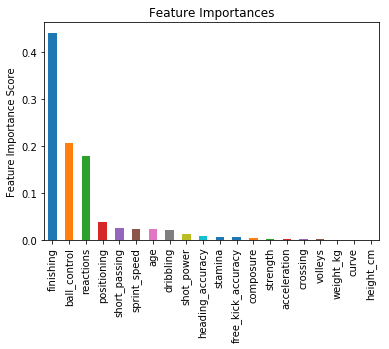

In [549]:
features = [i for i in dta.columns if i != "Value (M)"]
target = "Value (M)"
gbm0 = GradientBoostingRegressor(random_state=7)
modelfit(gbm0, dta, features)


# Feature Ranking

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=8,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=50, min_sa...       subsample=0.8, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'n_estimators': [700, 710, 720, 730, 740]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

(<bound method BaseSearchCV.score of GridSearchCV(cv=10, error_score='raise-deprecating',
        estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='ls', max_depth=8,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=50, min_sa...       subsample=0.8, tol=0.0001, validation_fraction=0.1, verbose=0,
              warm_start=False),
        fit_params=None, iid=False, n_jobs=4,
        param_grid={'n_estimators': [700, 710, 720, 730, 740]},
        pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
        scoring='neg_mean_squared_error', verbose=0)>,
 {'n_estimators': 730},
 -12.245103361932717)


Model Report
RMSE : 1.312
CV Score : Mean - 1.81 | Std - 2.995 | Min - 0.1426 | Max - 10.45


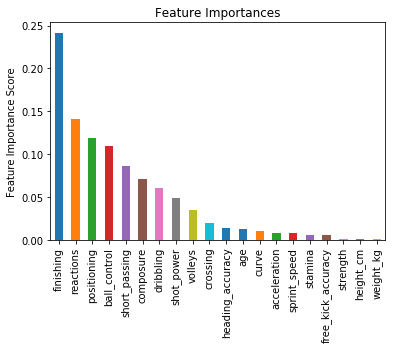

In [550]:
estimators = [x for x in range(700,750,10)]
param_test1 = {'n_estimators':estimators}
gsearch1 = GridSearchCV(estimator = GradientBoostingRegressor(learning_rate=0.1, min_samples_split=500,
                                  min_samples_leaf=50,max_depth=8,max_features='sqrt', subsample=0.8,random_state=10), 
                       param_grid = param_test1, scoring='neg_mean_squared_error',n_jobs=4,iid=False, cv=10)
gsearch1.fit(dta[features],dta["Value (M)"])

gsearch1.score, gsearch1.best_params_, gsearch1.best_score_
modelfit(gsearch1.best_estimator_, dta, features)

# New Forward Value Model

/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


                            OLS Regression Results                            
Dep. Variable:              Value (M)   R-squared:                       0.578
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     125.3
Date:                Mon, 26 Nov 2018   Prob (F-statistic):          2.21e-122
Time:                        20:56:58   Log-Likelihood:                -10290.
No. Observations:                3518   AIC:                         2.059e+04
Df Residuals:                    3512   BIC:                         2.063e+04
Df Model:                           5                                         
Covariance Type:                  HC0                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.9884      0.076     39.309   

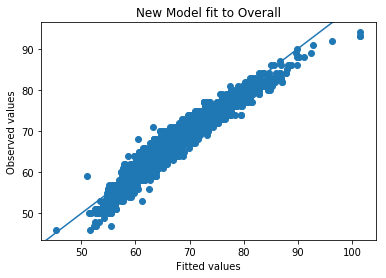

In [560]:
#MODEL CREATION

#Create our New Model with Interaction Terms

def f_skills (row):
    return row['short_passing'] * row['crossing'] *row['dribbling'] *row['ball_control']*row['free_kick_accuracy']
def f_skills_off (row):
    return row['positioning']*row['finishing']*row['volleys']*row['heading_accuracy']*row['curve']*row['shot_power']
def f_ath_ment (row):
    return row['acceleration'] *row['sprint_speed']*row['strength'] *row['composure'] *row['reactions'] * row['stamina']

def f_phy (row):
    return row['height_cm'] * row['weight_kg']


data['f_skills'] = data.apply(w_skills, axis=1)
data['f_skills_off'] = data.apply(w_skills_off, axis=1)
data['f_ath_ment']= data.apply(w_ath_ment, axis=1)
data['f_phy']= data.apply(w_phy, axis=1)
features=['age', 'f_skills', 'f_skills_off', 'f_ath_ment',  'f_phy']
x=data[features]
#We must now scale the features
x =pd.DataFrame(scaler.fit_transform(x))
x.columns=['age', 'f_skills', 'f_skills_off', 'f_ath_ment', 'f_phy']
#We have now addressed the issue of endogenity by including interaction terms
X=sm.add_constant(x)
y1=data[overall_target]
y2=data[value_target]
y3=data[ln_value]

mod=sm.OLS(y1,X)
res=mod.fit(cov_type='HC0')
yhat = res.fittedvalues
OLS_model = sm.OLS(y2,X)
OLS_results=OLS_model.fit(cov_type='HC0')
#results of new model on value
print(OLS_results.summary())
OLS_model2 = sm.OLS(y3,X)
OLS_results2=OLS_model2.fit(cov_type='HC0')
#results for new model on value elasticity
print(OLS_results2.summary())
print(res.aic)
#Plot of y-hat for y-true on the reduced model for overall rating
from statsmodels.graphics.api import abline_plot
fig, ax = plt.subplots()
ax.scatter(yhat, y1)
line_fit = sm.OLS(y1, sm.add_constant(yhat, prepend=True)).fit()
abline_plot(model_results=line_fit, ax=ax)


ax.set_title('New Model fit to Overall')
ax.set_ylabel('Observed values')
ax.set_xlabel('Fitted values');

<p style="font-family: Arial; font-size:3.50em;color:DarkRed; font-style:bold">
<br>
Classification Methods
</p><br>

# Exploring Different Classifiers

In [537]:
#Features Lists
descriptive=['club','age', 'league', 'height_cm', 'weight_kg']

overall_target = ['Overall']
potential_target=['Potential']
value_target=['Value (M)']
ln_value=['ln_value']
eur_value=['eur_value']
club=['club_id']
basic_attr=['Overall', 'Potential','age', 'pac', 'sho', 'pas','dri', 'defend', 'phy' , 'reactions',
             'international_reputation', 'skill_moves',
       'weak_foot', 'att_rate_High','att_rate_Low', 'att_rate_High',
            'defend_rate_High','defend_rate_Low']
attribute_profile=['Potential','league_id','age', 'height_cm', 'weight_kg', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'composure', 'marking', 'standing_tackle',
       'sliding_tackle', 'gk_diving', 'gk_handling', 'gk_kicking',
       'gk_positioning', 'gk_reflexes']
all_attr=['Overall','Potential', 'Value (M)', 
         'league_id','age', 'height_cm', 'weight_kg', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'composure', 'marking', 'standing_tackle',
       'sliding_tackle', 'gk_diving', 'gk_handling', 'gk_kicking',
       'gk_positioning', 'gk_reflexes']
targets=['Overall','Potential', 'Value (M)', 'ln_value', 'eur_value']
data=pd.read_csv("Full_DF.csv")

In [370]:
data.head()

Player_ID  ln_value               Name  Value (M) Position  Overall  \
0      20801  6.862758  Cristiano Ronaldo       95.5       ST       94   
1     158023  6.957497           L. Messi      105.0       RW       93   
2     190871  7.115582             Neymar      123.0       LW       92   
3     176580  6.878326          L. Suárez       97.0       ST       92   
4     167495  6.415097           M. Neuer       61.0       GK       92   

   Potential                     full_name                 club  club_id  \
0         94  C. Ronaldo dos Santos Aveiro       Real Madrid CF      467   
1         93                  Lionel Messi         FC Barcelona      220   
2         94    Neymar da Silva Santos Jr.  Paris Saint-Germain      433   
3         92                   Luis Suárez         FC Barcelona      220   
4         92                  Manuel Neuer     FC Bayern Munich      223   

          ...          prefers_lcb  prefers_gk foot_Left  foot_Right  \
0         ...                False           0         0           1   
1         ...                False           0         1           0   
2         ...                False           0         0           1   
3         ...                False           0         0           1   
4         ...                False           1         0           1   

  att_rate_High  att_rate_Low  att_rate_Medium defend_rate_High  \
0             1             0                0                0   
1             0             0                1                0   
2             1             0                0                0   
3             1             0                0                0   
4             0             0                1                0   

   defend_rate_Low  defend_rate_Medium  
0                1                   0  
1                0                   1  
2                0                   1  
3                0                   1  
4                0                   1  

[5 rows x 190 columns]

# K-NN Classification to Predict Player Position Based on Attributes

In [383]:
#Model Creation
y=data[['Position']].copy()
X=data[attribute_profile].copy()
X.head()
y.head()

league_id  age  height_cm  weight_kg  crossing  finishing  \
0         35   32        185         80        85         94   
1         35   30        170         72        77         95   
2         15   25        175         68        75         89   
3         35   30        182         86        77         94   
4         19   31        193         92        15         13   

   heading_accuracy  short_passing  volleys  dribbling     ...       \
0                88             83       88         91     ...        
1                71             88       85         97     ...        
2                62             81       83         96     ...        
3                77             83       88         86     ...        
4                25             55       11         30     ...        

   penalties  composure  marking  standing_tackle  sliding_tackle  gk_diving  \
0         85         95       22               31              23          7   
1         78         96       13               28              26          6   
2         81         92       21               24              33          9   
3         85         83       30               45              38         27   
4         47         70       10               10              11         91   

   gk_handling  gk_kicking  gk_positioning  gk_reflexes  
0           11          15              14           11  
1           11          15              14            8  
2            9          15              15           11  
3           25          31              33           37  
4           90          95              91           89  

[5 rows x 38 columns]

Position
0       ST
1       RW
2       LW
3       ST
4       GK

In [384]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


In [385]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 15, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=15, p=2,
           weights='uniform')

In [386]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
#algorithm score
print(classifier.score(X_test, y_test))

0.5024426907177753


# Random Forrest Classification to Predict Overall Rating

In [527]:
#Model Creation
y=data[['Overall']].copy()
X=data[attribute_profile].copy()
X.head()
y.head()

Potential  league_id  age  height_cm  weight_kg  crossing  finishing  \
0         94         35   32        185         80        85         94   
1         93         35   30        170         72        77         95   
2         94         15   25        175         68        75         89   
3         92         35   30        182         86        77         94   
4         92         19   31        193         92        15         13   

   heading_accuracy  short_passing  volleys     ...       penalties  \
0                88             83       88     ...              85   
1                71             88       85     ...              78   
2                62             81       83     ...              81   
3                77             83       88     ...              85   
4                25             55       11     ...              47   

   composure  marking  standing_tackle  sliding_tackle  gk_diving  \
0         95       22               31              23          7   
1         96       13               28              26          6   
2         92       21               24              33          9   
3         83       30               45              38         27   
4         70       10               10              11         91   

   gk_handling  gk_kicking  gk_positioning  gk_reflexes  
0           11          15              14           11  
1           11          15              14            8  
2            9          15              15           11  
3           25          31              33           37  
4           90          95              91           89  

[5 rows x 39 columns]

Overall
0       94
1       93
2       92
3       92
4       92

In [528]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


In [418]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'gini')
classifier.fit(X_train, y_train)

/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [458]:
predictions = classifier.predict(X_test)

In [456]:
from sklearn.metrics import confusion_matrix
cm = pd.DataFrame(confusion_matrix(y_test, predictions))
cm.head()

0   1   2   3   4   5   6   7   8   9  ...  36  37  38  39  40  41  42  43  \
0   0   0   0   0   1   0   2   0   0   0 ...   0   0   0   0   0   0   0   0   
1   0   1   0   0   0   3   0   1   0   0 ...   0   0   0   0   0   0   0   0   
2   0   0   0   0   1   3   1   0   0   0 ...   0   0   0   0   0   0   0   0   
3   0   0   0   0   8   4   3   1   1   0 ...   0   0   0   0   0   0   0   0   
4   0   0   0   0   9   6   5   7   1   0 ...   0   0   0   0   0   0   0   0   

   44  45  
0   0   0  
1   0   0  
2   0   0  
3   0   0  
4   0   0  

[5 rows x 46 columns]

Accuracy: 0.4323562570462232
Root Mean Square Error of test set is: 1.4740649046443295


Text(0.5, 0, 'Predicted Overall')

Text(0, 0.5, 'True Overall')

Text(0.5, 1.0, 'Predicted vs True')

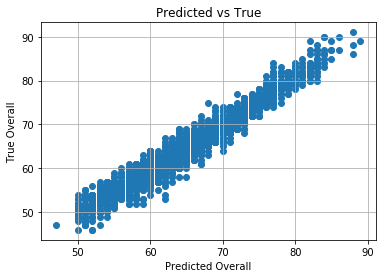

In [471]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
from sklearn.metrics import mean_squared_error
RMSE_test=sqrt(mean_squared_error(y_true=y_test,y_pred=predictions))
print("Root Mean Square Error of test set is:" ,RMSE_test)

fig,ax=plt.subplots()
predicted=predictions
true=y_test
ax.scatter(predicted,true)
plt.xlabel('Predicted Overall')
plt.ylabel('True Overall')
plt.title('Predicted vs True')
plt.grid(True)

# Bayesian Classificiation of Overall

In [483]:
#Model Creation
y=data[['Overall']].copy()
X=data[attribute_profile].copy()


In [484]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


In [490]:
from sklearn.naive_bayes import GaussianNB
classifier= GaussianNB()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = pd.DataFrame(confusion_matrix(y_test, predictions))


/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

Accuracy: 0.11724915445321307
Root Mean Square Error of test set is: 5.25817843325294


Text(0.5, 0, 'Predicted Overall')

Text(0, 0.5, 'True Overall')

Text(0.5, 1.0, 'Predicted vs True')

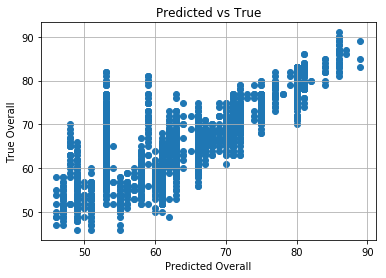

In [491]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
from sklearn.metrics import mean_squared_error
RMSE_test=sqrt(mean_squared_error(y_true=y_test,y_pred=y_pred))
print("Root Mean Square Error of test set is:" ,RMSE_test)

fig,ax=plt.subplots()
predicted=y_pred
true=y_test
ax.scatter(predicted,true)
plt.xlabel('Predicted Overall')
plt.ylabel('True Overall')
plt.title('Predicted vs True')
plt.grid(True)


# Support Vector Machine Classifier on Overall

In [492]:
#Model Creation
y=data[['Overall']].copy()
X=data[attribute_profile].copy()


# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  del sys.path[0]


In [493]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

In [494]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = pd.DataFrame(confusion_matrix(y_test, predictions))

Accuracy: 0.22904922961292748
Root Mean Square Error of test set is: 1.996709054915415


Text(0.5, 0, 'Predicted Overall')

Text(0, 0.5, 'True Overall')

Text(0.5, 1.0, 'Predicted vs True')

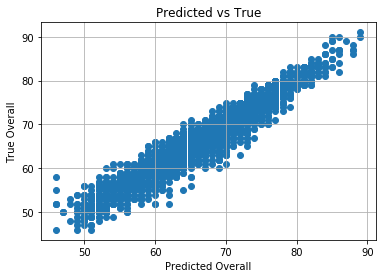

In [495]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
from sklearn.metrics import mean_squared_error
RMSE_test=sqrt(mean_squared_error(y_true=y_test,y_pred=y_pred))
print("Root Mean Square Error of test set is:" ,RMSE_test)

fig,ax=plt.subplots()
predicted=y_pred
true=y_test
ax.scatter(predicted,true)
plt.xlabel('Predicted Overall')
plt.ylabel('True Overall')
plt.title('Predicted vs True')
plt.grid(True)

# Kernel SVM Performance

In [496]:
#Model Creation
y=data[['Overall']].copy()
X=data[attribute_profile].copy()


# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  del sys.path[0]


In [497]:
# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

Accuracy: 0.2856069146937242
Root Mean Square Error of test set is: 1.715974857226964


Text(0.5, 0, 'Predicted Overall')

Text(0, 0.5, 'True Overall')

Text(0.5, 1.0, 'Predicted vs True')

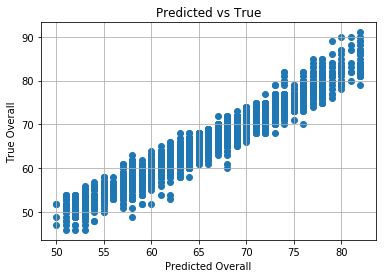

In [498]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = pd.DataFrame(confusion_matrix(y_test, predictions))


#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
from sklearn.metrics import mean_squared_error
RMSE_test=sqrt(mean_squared_error(y_true=y_test,y_pred=y_pred))
print("Root Mean Square Error of test set is:" ,RMSE_test)

fig,ax=plt.subplots()
predicted=y_pred
true=y_test
ax.scatter(predicted,true)
plt.xlabel('Predicted Overall')
plt.ylabel('True Overall')
plt.title('Predicted vs True')
plt.grid(True)

# Logistic Regression Performance

In [499]:
#Model Creation
y=data[['Overall']].copy()
X=data[attribute_profile].copy()


# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  del sys.path[0]


In [500]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Accuracy: 0.11649755730928223
Root Mean Square Error of test set is: 3.657550760389424


Text(0.5, 0, 'Predicted Overall')

Text(0, 0.5, 'True Overall')

Text(0.5, 1.0, 'Predicted vs True')

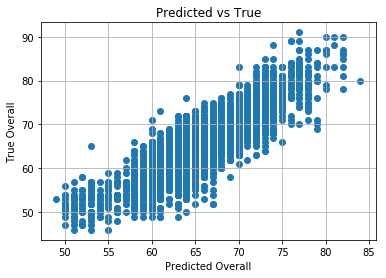

In [501]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = pd.DataFrame(confusion_matrix(y_test, predictions))


#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
from sklearn.metrics import mean_squared_error
RMSE_test=sqrt(mean_squared_error(y_true=y_test,y_pred=y_pred))
print("Root Mean Square Error of test set is:" ,RMSE_test)

fig,ax=plt.subplots()
predicted=y_pred
true=y_test
ax.scatter(predicted,true)
plt.xlabel('Predicted Overall')
plt.ylabel('True Overall')
plt.title('Predicted vs True')
plt.grid(True)


# Linear Discriminant Analysis Classifier Performance

In [502]:
#Model Creation
y=data[['Overall']].copy()
X=data[attribute_profile].copy()


# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  del sys.path[0]


In [504]:
# Fitting LDA Classification to the Training set
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
classifier = LinearDiscriminantAnalysis(solver='svd', tol=0.0001)
classifier.fit(X_train, y_train)


/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

Accuracy: 0.21984216459977451
Root Mean Square Error of test set is: 2.0376482822999695


Text(0.5, 0, 'Predicted Overall')

Text(0, 0.5, 'True Overall')

Text(0.5, 1.0, 'Predicted vs True')

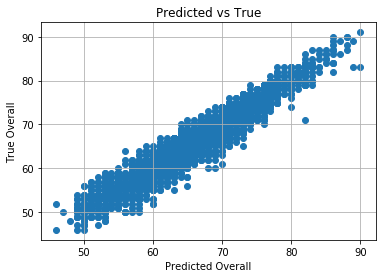

In [505]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = pd.DataFrame(confusion_matrix(y_test, predictions))


#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
from sklearn.metrics import mean_squared_error
RMSE_test=sqrt(mean_squared_error(y_true=y_test,y_pred=y_pred))
print("Root Mean Square Error of test set is:" ,RMSE_test)

fig,ax=plt.subplots()
predicted=y_pred
true=y_test
ax.scatter(predicted,true)
plt.xlabel('Predicted Overall')
plt.ylabel('True Overall')
plt.title('Predicted vs True')
plt.grid(True)

# Classification Conclusion

The two best performing models for classifying Oveall rating were Random Forrest Classification and Kernel SVM.

<p style="font-family: Arial; font-size:3.50em;color:DarkRed; font-style:bold">
<br>
Clustering Methods
</p><br>

# K-Means Clustering of Age, Overall and Potential Target

In [576]:
#Model Creation
#y=data[['Overall']].copy()
X=data[['Overall', 'Potential', 'age']].copy()


# Splitting the dataset into the Training set and Test set
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
# Feature Scaling
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

Overall  Potential  age
0       94         94   32
1       93         93   30
2       92         94   25
3       92         92   30
4       92         92   31

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

Text(0.5, 1.0, 'The Elbow Method')

Text(0.5, 0, 'Number of clusters')

Text(0, 0.5, 'WCSS')

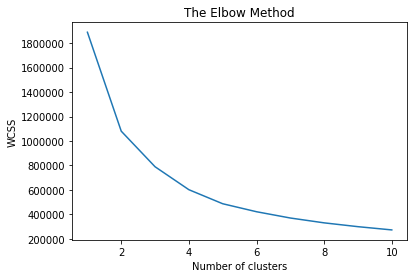

In [573]:
#The Elbow Method for Finding Ideal # of Clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [582]:
#The Elbow method above shows that about 3 Clusters is appropriate
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
kmeans.labels_
cluster_centers=kmeans.cluster_centers_
score=kmeans.score(X)
y_kmeans


array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [605]:
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import tkinter as tk
import statsmodels.api as sm

In [606]:
fifa_data_orig = pd.read_csv('full_fifa18_data.csv')


In [607]:
#Creating the KNN Dataset with Attributes
clustData = fifa_data_orig.copy()
clustDep = clustData['Overall']
knnFeatures = clustData[['pac', 'sho', 'dri', 'pas', 'defend', 'phy', 'reactions']]

In [608]:
print(knnFeatures[0:5])

   pac  sho  dri  pas  defend  phy  reactions
0   90   93   90   82      33   80         96
1   89   90   96   86      26   61         95
2   92   84   95   79      30   60         88
3   82   90   87   79      42   81         93
4   91   90   89   95      60   91         85


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

Text(0.5, 1.0, 'KNN Clustering for pac')

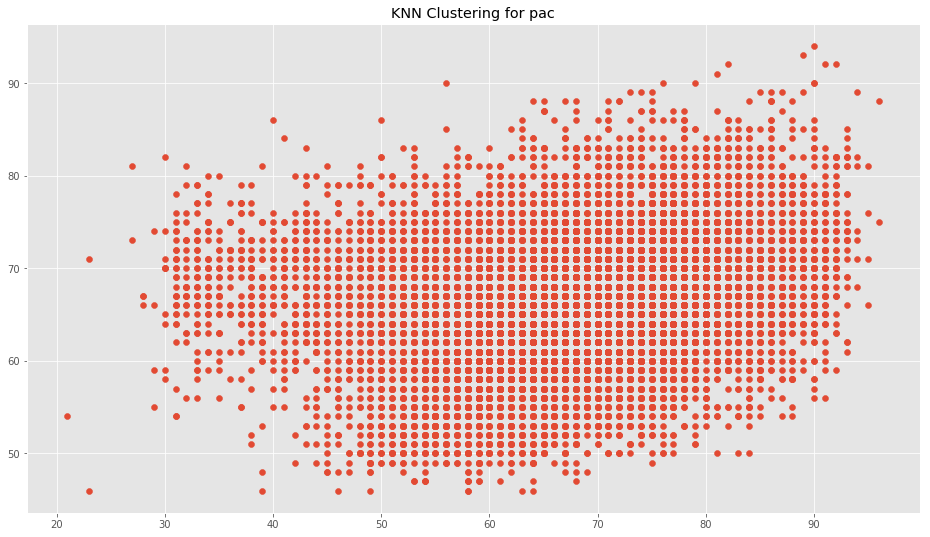

Text(0.5, 1.0, 'KNN Clustering for sho')

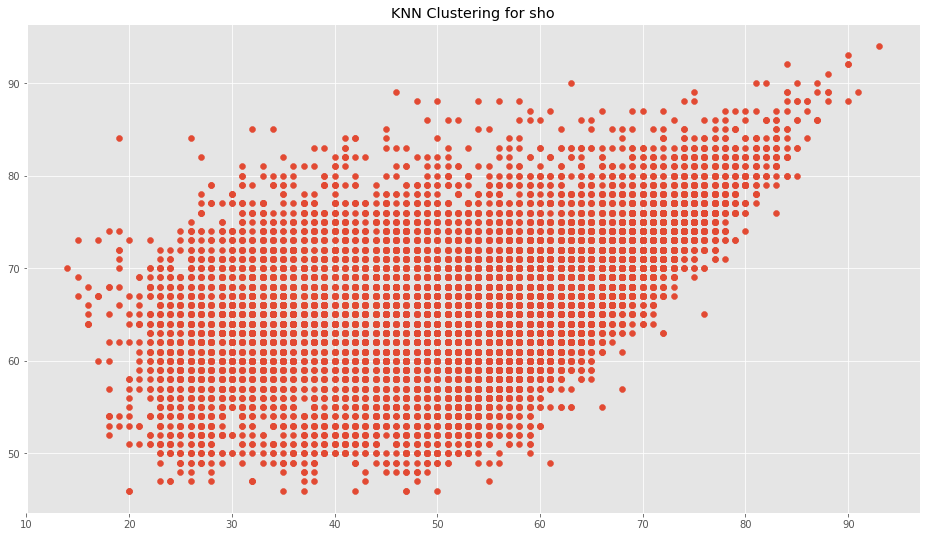

Text(0.5, 1.0, 'KNN Clustering for dri')

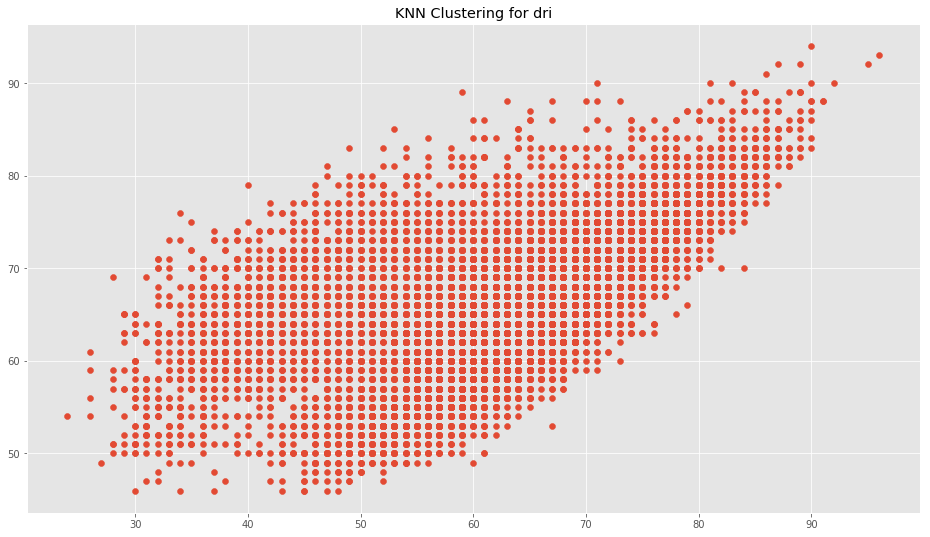

Text(0.5, 1.0, 'KNN Clustering for pas')

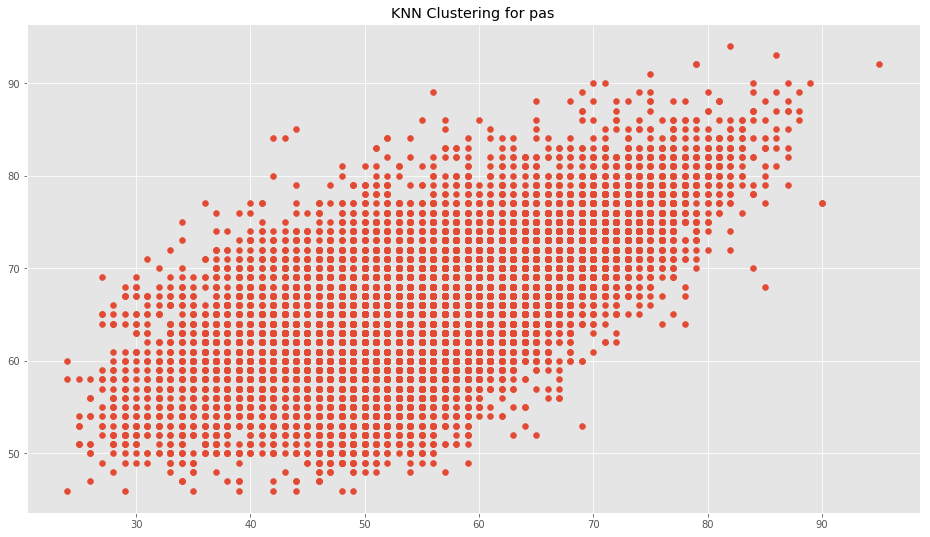

Text(0.5, 1.0, 'KNN Clustering for defend')

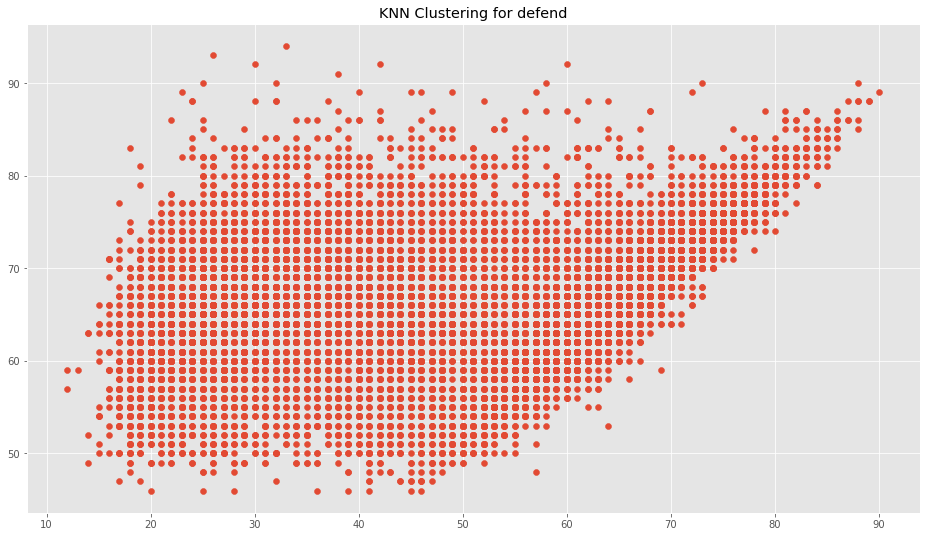

Text(0.5, 1.0, 'KNN Clustering for phy')

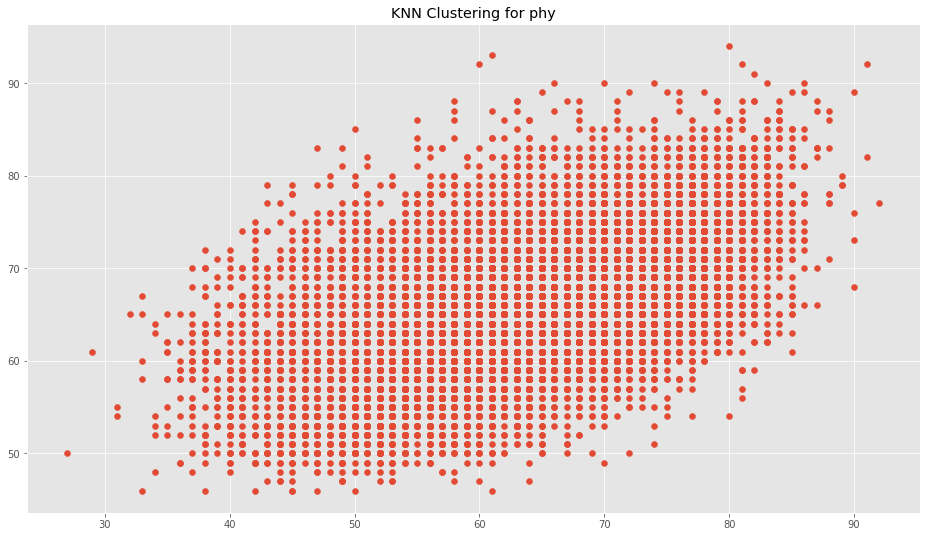

Text(0.5, 1.0, 'KNN Clustering for reactions')

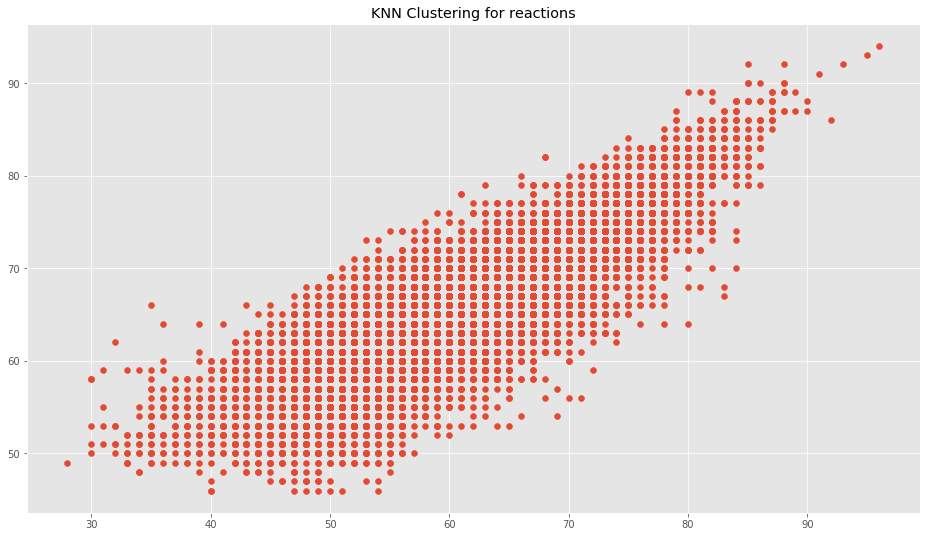

In [617]:

#K Nearest Neighbor
knnModel = KNeighborsClassifier(n_neighbors = 4)
#Running the model with testing data
knnModel.fit(knnFeatures, clustDep)
#Prediction using the testing data
y_pred = knnModel.predict(knnFeatures)
x_min, x_max = knnFeatures.min() - 1, knnFeatures.max() + 1
y_min, y_max = knnFeatures.min() - 1, knnFeatures.max() + 1
#xx, yy = np.meshgrid(np.arange(x_min, x_max), np.arange(y_min, y_max))
plt.scatter(knnFeatures['pac'], clustDep)
#plt.xlim(x_min(), x_max())
#plt.ylim(y_min(), y_max())

#Plotting KNN
plt.title("KNN Clustering for pac")
plt.show()

plt.scatter(knnFeatures['sho'], clustDep)
plt.title("KNN Clustering for sho")
plt.show()

plt.scatter(knnFeatures['dri'], clustDep)
plt.title("KNN Clustering for dri")
plt.show()

plt.scatter(knnFeatures['pas'], clustDep)
plt.title("KNN Clustering for pas")
plt.show()

plt.scatter(knnFeatures['defend'], clustDep)
plt.title("KNN Clustering for defend")
plt.show()

plt.scatter(knnFeatures['phy'], clustDep)
plt.title("KNN Clustering for phy")
plt.show()

plt.scatter(knnFeatures['reactions'], clustDep)
plt.title("KNN Clustering for reactions")
plt.show()

<p style="font-family: Arial; font-size:3.0em;color:DarkRed; font-style:bold">
<br>
Hyperparameter Tuning with GridSearch &
    <br>
    <br>Ensemble Gradient Boosting for Overall Rating
</p><br>

# Grid Search and Gradient Boosting for Overall Rating

In [584]:
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV 
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import recall_score
gb_model_overall=['Overall','age', 'height_cm', 'weight_kg', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'composure', 'marking', 'standing_tackle',
       'sliding_tackle', 'gk_diving', 'gk_handling', 'gk_kicking',
       'gk_positioning', 'gk_reflexes']
dta=data[gb_model_overall]
dta.head()

Overall  age  height_cm  weight_kg  crossing  finishing  heading_accuracy  \
0       94   32        185         80        85         94                88   
1       93   30        170         72        77         95                71   
2       92   25        175         68        75         89                62   
3       92   30        182         86        77         94                77   
4       92   31        193         92        15         13                25   

   short_passing  volleys  dribbling     ...       penalties  composure  \
0             83       88         91     ...              85         95   
1             88       85         97     ...              78         96   
2             81       83         96     ...              81         92   
3             83       88         86     ...              85         83   
4             55       11         30     ...              47         70   

   marking  standing_tackle  sliding_tackle  gk_diving  gk_handling  \
0       22               31              23          7           11   
1       13               28              26          6           11   
2       21               24              33          9            9   
3       30               45              38         27           25   
4       10               10              11         91           90   

   gk_kicking  gk_positioning  gk_reflexes  
0          15              14           11  
1          15              14            8  
2          15              15           11  
3          31              33           37  
4          95              91           89  

[5 rows x 38 columns]

In [588]:
#Algorithm Design 
def modelfit(alg, dtrain, features, performCV=True, printFeatureImportance=True, cv_folds=10):
    #Fit the algorithm on the data
    
    alg.fit(dtrain[features],dtrain["Overall"] )
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[features])

    #Perform cross-validation:
    cv_score =  cross_val_score(alg, dtrain[features], dtrain["Overall"], cv=cv_folds,
                                                scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print ("\nModel Report")
    print ("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(dtrain["Overall"], dtrain_predictions)))
    print ("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),
                                                                             np.std(cv_score),np.min(cv_score),
                                                                              np.max(cv_score)))
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, features).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')


Model Report
RMSE : 1.521
CV Score : Mean - 2.333 | Std - 1.408 | Min - 1.442 | Max - 5.53


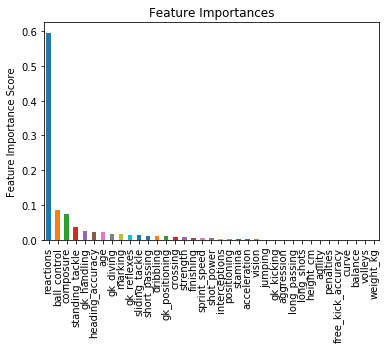

In [589]:
#Gradient Boosting Regressor Fit
features = [i for i in dta.columns if i != "Overall"]
target = "Overall"
gbm0 = GradientBoostingRegressor(random_state=7)
modelfit(gbm0, dta, features)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=8,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=50, min_sa...       subsample=0.8, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'n_estimators': [700, 710, 720, 730, 740]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

(<bound method BaseSearchCV.score of GridSearchCV(cv=10, error_score='raise-deprecating',
        estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='ls', max_depth=8,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=50, min_sa...       subsample=0.8, tol=0.0001, validation_fraction=0.1, verbose=0,
              warm_start=False),
        fit_params=None, iid=False, n_jobs=4,
        param_grid={'n_estimators': [700, 710, 720, 730, 740]},
        pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
        scoring='neg_mean_squared_error', verbose=0)>,
 {'n_estimators': 740},
 -3.4734194554188926)


Model Report
RMSE : 0.6862
CV Score : Mean - 1.591 | Std - 0.971 | Min - 0.9888 | Max - 3.673


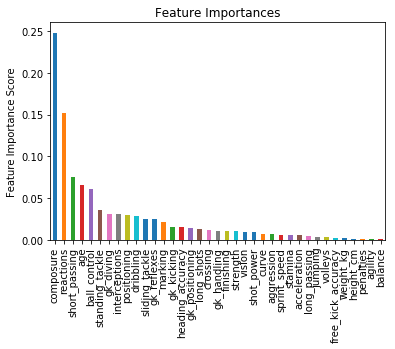

In [590]:
#Hyperparameter tuning of estimators with GridSearch
estimators = [x for x in range(700,750,10)]
param_test1 = {'n_estimators':estimators}
gsearch1 = GridSearchCV(estimator = GradientBoostingRegressor(learning_rate=0.1, min_samples_split=500,
                                  min_samples_leaf=50,max_depth=8,max_features='sqrt', subsample=0.8,random_state=10), 
                       param_grid = param_test1, scoring='neg_mean_squared_error',n_jobs=4,iid=False, cv=10)
gsearch1.fit(dta[features],dta["Overall"])

gsearch1.score, gsearch1.best_params_, gsearch1.best_score_
modelfit(gsearch1.best_estimator_, dta, features)

# Grid Search and Gradient Boosting for Potential Rating

In [591]:
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV 
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import recall_score
gb_model_potential=['Potential','age', 'height_cm', 'weight_kg', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'composure', 'marking', 'standing_tackle',
       'sliding_tackle', 'gk_diving', 'gk_handling', 'gk_kicking',
       'gk_positioning', 'gk_reflexes']

dta=data[gb_model_potential]
dta.head()

Potential  age  height_cm  weight_kg  crossing  finishing  \
0         94   32        185         80        85         94   
1         93   30        170         72        77         95   
2         94   25        175         68        75         89   
3         92   30        182         86        77         94   
4         92   31        193         92        15         13   

   heading_accuracy  short_passing  volleys  dribbling     ...       \
0                88             83       88         91     ...        
1                71             88       85         97     ...        
2                62             81       83         96     ...        
3                77             83       88         86     ...        
4                25             55       11         30     ...        

   penalties  composure  marking  standing_tackle  sliding_tackle  gk_diving  \
0         85         95       22               31              23          7   
1         78         96       13               28              26          6   
2         81         92       21               24              33          9   
3         85         83       30               45              38         27   
4         47         70       10               10              11         91   

   gk_handling  gk_kicking  gk_positioning  gk_reflexes  
0           11          15              14           11  
1           11          15              14            8  
2            9          15              15           11  
3           25          31              33           37  
4           90          95              91           89  

[5 rows x 38 columns]

In [592]:
#Algorithm Design 
def modelfit(alg, dtrain, features, performCV=True, printFeatureImportance=True, cv_folds=10):
    #Fit the algorithm on the data
    
    alg.fit(dtrain[features],dtrain["Potential"] )
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[features])

    #Perform cross-validation:
    cv_score =  cross_val_score(alg, dtrain[features], dtrain["Potential"], cv=cv_folds,
                                                scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print ("\nModel Report")
    print ("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(dtrain["Potential"], dtrain_predictions)))
    print ("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),
                                                                             np.std(cv_score),np.min(cv_score),
                                                                              np.max(cv_score)))
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, features).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')


Model Report
RMSE : 2.241
CV Score : Mean - 2.903 | Std - 1.351 | Min - 1.908 | Max - 5.954


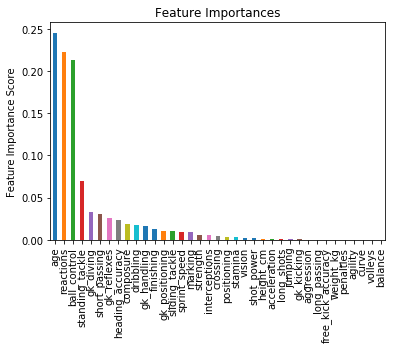

In [593]:
#Gradient Boosting Regressor Fit
features = [i for i in dta.columns if i != "Potential"]
target = "Potential"
gbm0 = GradientBoostingRegressor(random_state=7)
modelfit(gbm0, dta, features)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=8,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=50, min_sa...       subsample=0.8, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'n_estimators': [700, 710, 720, 730, 740]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

(<bound method BaseSearchCV.score of GridSearchCV(cv=10, error_score='raise-deprecating',
        estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='ls', max_depth=8,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=50, min_sa...       subsample=0.8, tol=0.0001, validation_fraction=0.1, verbose=0,
              warm_start=False),
        fit_params=None, iid=False, n_jobs=4,
        param_grid={'n_estimators': [700, 710, 720, 730, 740]},
        pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
        scoring='neg_mean_squared_error', verbose=0)>,
 {'n_estimators': 740},
 -6.040395972594995)


Model Report
RMSE : 1.244
CV Score : Mean - 2.289 | Std - 0.8957 | Min - 1.55 | Max - 4.226


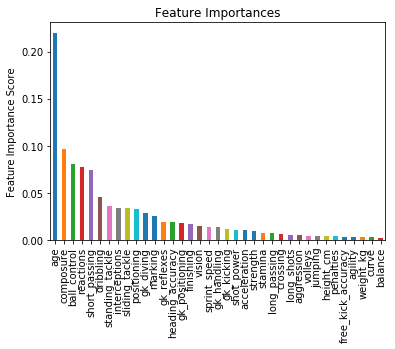

In [594]:
#Hyperparameter tuning of estimators with GridSearch
estimators = [x for x in range(700,750,10)]
param_test1 = {'n_estimators':estimators}
gsearch1 = GridSearchCV(estimator = GradientBoostingRegressor(learning_rate=0.1, min_samples_split=500,
                                  min_samples_leaf=50,max_depth=8,max_features='sqrt', subsample=0.8,random_state=10), 
                       param_grid = param_test1, scoring='neg_mean_squared_error',n_jobs=4,iid=False, cv=10)
gsearch1.fit(dta[features],dta["Potential"])

gsearch1.score, gsearch1.best_params_, gsearch1.best_score_
modelfit(gsearch1.best_estimator_, dta, features)

# Commentary

Here we use Gradient boosting regression to come up with a preliminary feature ranking for both overall and potential. We then use GridSearch Hyperparameter tuning to ehnance our model and thus re-rank the features.